In [2]:
# Hardware configuration 
# Using tf-cpu-310 Conda Env
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18195830455781852999
 xla_global_id: -1]

In [11]:
# Importing Important libraries
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing modules from Source Code 
from src.pipeline.data_ingestion import data_accumilator
from src.utils import plot_stock_analysis

In [2]:
# Get current working directory
cwd = os.getcwd()
cwd

'/home/studio-lab-user/sagemaker-studiolab-notebooks/Forecasting-NIFTY50'

### Exploratory Data Analysis (EDA)

In [3]:
# Loading info of stocks of NIFTY50 in FY22 
# https://archives.nseindia.com/content/indices/ind_nifty50list.csv
nifty50 = pd.read_csv(f'{cwd}/resources/nifty50.csv')
nifty50.head()

Company Name            Industry      Symbol   
0                      Adani Enterprises Ltd.     Metals & Mining    ADANIENT  \
1  Adani Ports and Special Economic Zone Ltd.            Services  ADANIPORTS   
2            Apollo Hospitals Enterprise Ltd.          Healthcare  APOLLOHOSP   
3                           Asian Paints Ltd.   Consumer Durables  ASIANPAINT   
4                              Axis Bank Ltd.  Financial Services    AXISBANK   

  Series     ISIN Code  
0     EQ  INE423A01024  
1     EQ  INE742F01042  
2     EQ  INE437A01024  
3     EQ  INE021A01026  
4     EQ  INE238A01034

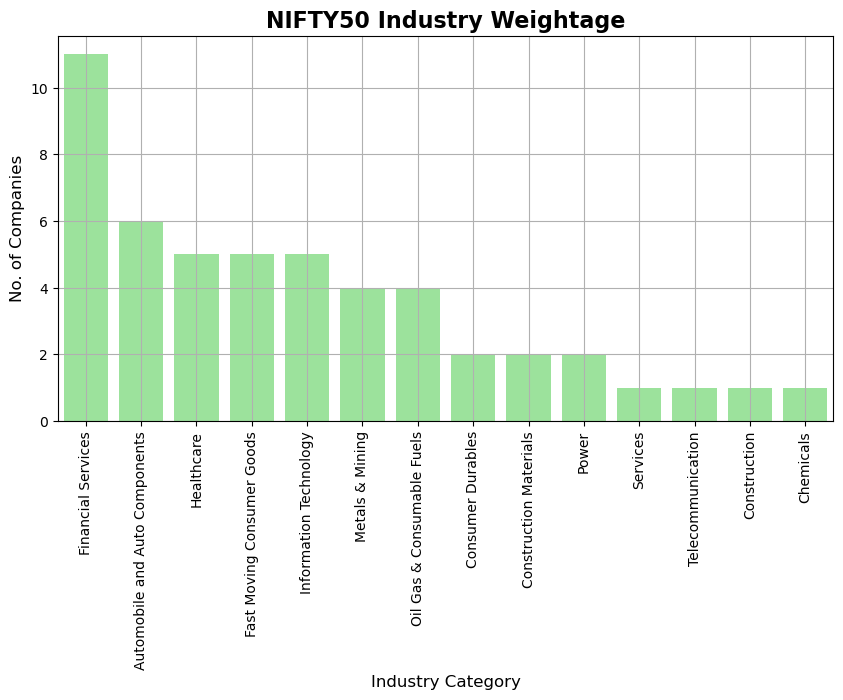

In [5]:
# Ploting the weightage of company across each distinct sector
# Creating dict of industry weightage from nifty50 dataframe
ind_div = dict(nifty50['Industry'].value_counts())

# Ploting the Industry Weightage
plt.figure(figsize=(10, 5))
sns.barplot(x=list(ind_div.keys()), y=list(ind_div.values()), color='#90EE90', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Industry Category', fontsize=12)
plt.ylabel('No. of Companies', fontsize=12)
title = plt.title('NIFTY50 Industry Weightage', fontsize=16, fontweight='bold')
plt.grid(True)
plt.show()

We can celarly see that most no. of companies that are in the Nifty 50 index are from Financial Services Industry then followed by Automobile, Healthcare sector etc.

### Data Ingestion Pipeline
Now we will initiate the Data Ingestion pipeline responsible for -
* Downloading the OHLCV data of the stocks of NIFTY50 index using Yahoo Finance API.
* Creating 2 more additional features using current data - Money Flow Index (MFI) & Log Returns.
* Normalizing all data and saving it in a seperate CSV file with desired format.
* Saving the Scaler objects as Pickle file (.pkl) for denormalizing the values generated from predictive DL models.
* Generating the JSON file which contains the mapping (path) of each elements generated (orignal data, normalized data with new features and scaler object) for each stock from the data ingestion pipeline.

In [ ]:
# Data Ingestion Pipeline
data_accumilator(cwd, nifty50['Symbol'])

### Quantitative Analysis
Now we have sucesfully downloaded the required data and using the data map generated, we will perform the simple quantatative analysis with visualizatioin to have better idea about our stocks data. The analysis will based on - 
* Volatility - Using daily return standard deviation we will measure the variation or fluctuations in an investment's daily returns around its average return. The higher the standard deviation, the higher the risk associated with the investment. 
* Trend - Using a 30-day rolling mean we will identify and analyze the direction and momentum of an investment's price movement over a specific period of time. A rolling mean is calculated by taking the average price of an investment over a certain period of time, which is then shifted forward one day to create a new average for the next period.

In [6]:
# Creating the dictionary of the data_map.json file
with open('/home/studio-lab-user/sagemaker-studiolab-notebooks/Forecasting-NIFTY50/artifacts/data_map.json', 'r') as file:
    data_map = json.load(file)



# Company Name -> Adani Enterprises Ltd.	# Industry -> Metals & Mining	# Ticker -> ADANIENT

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:ADANIENT


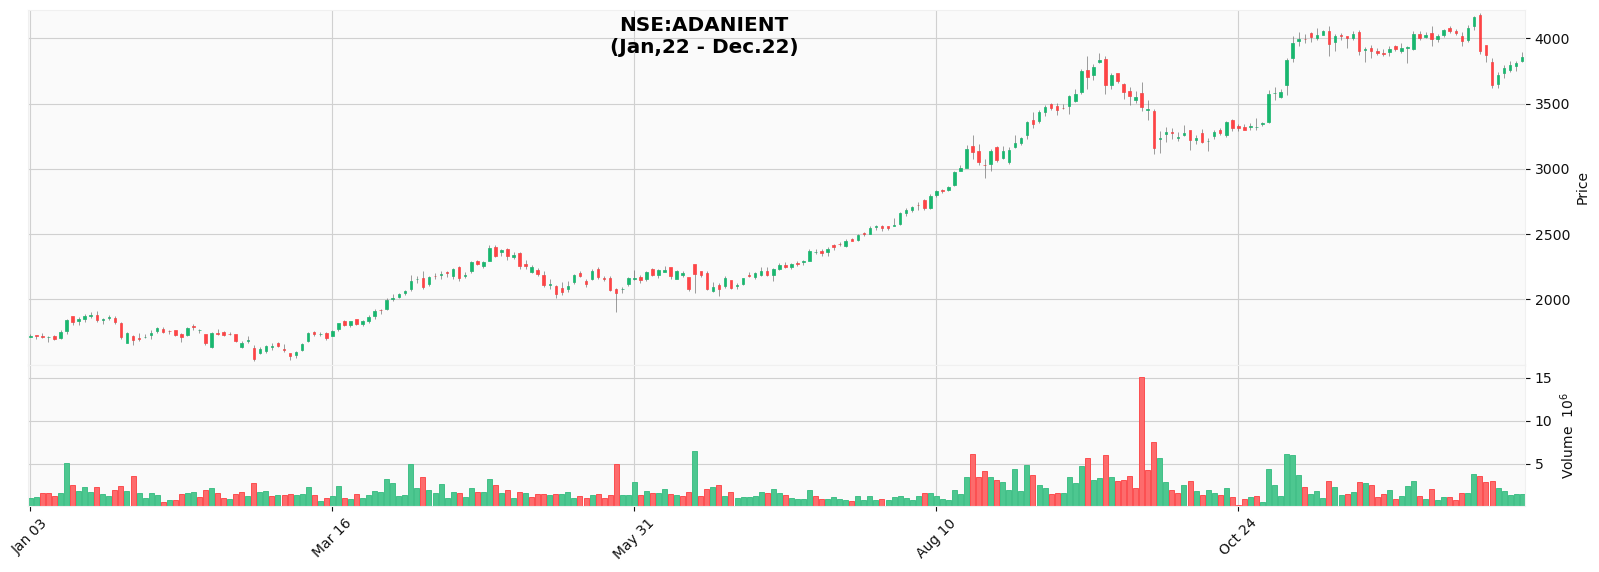

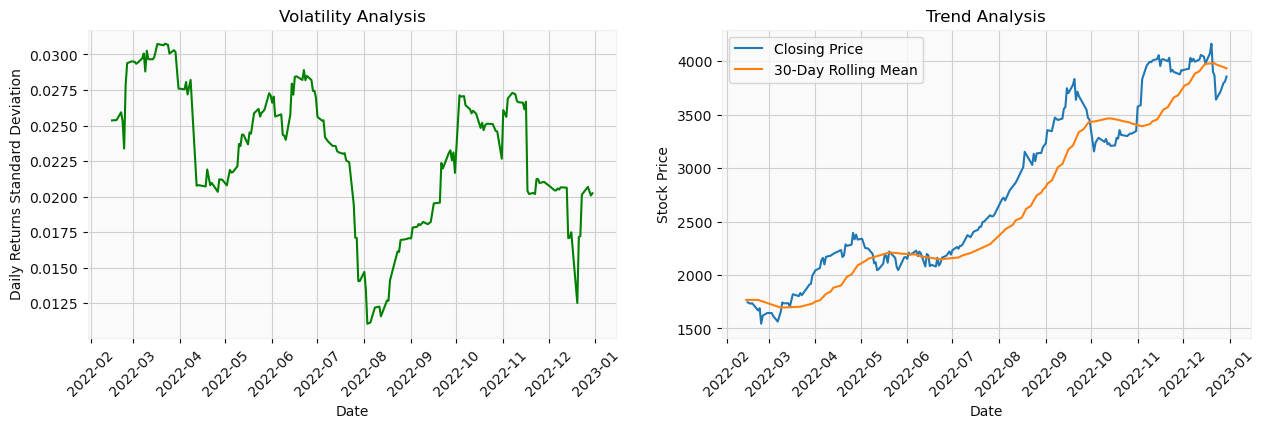



# Company Name -> Adani Ports and Special Economic Zone Ltd.	# Industry -> Services	# Ticker -> ADANIPORTS

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:ADANIPORTS


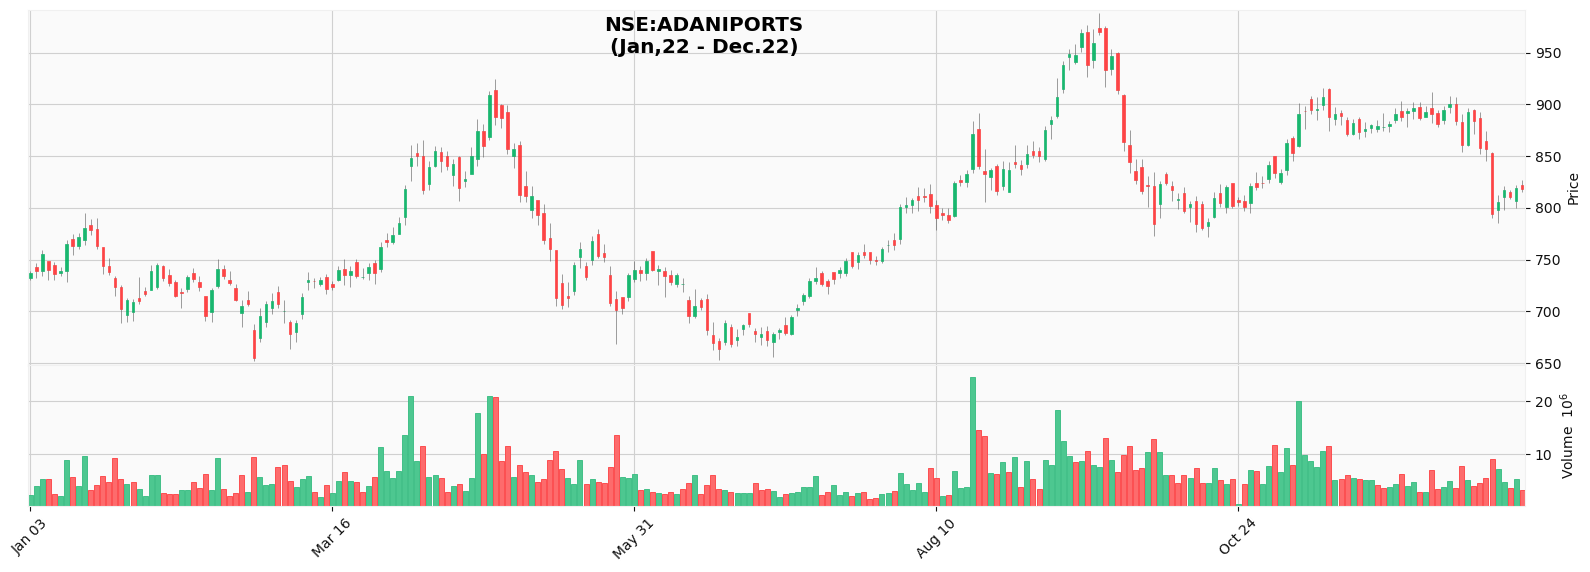

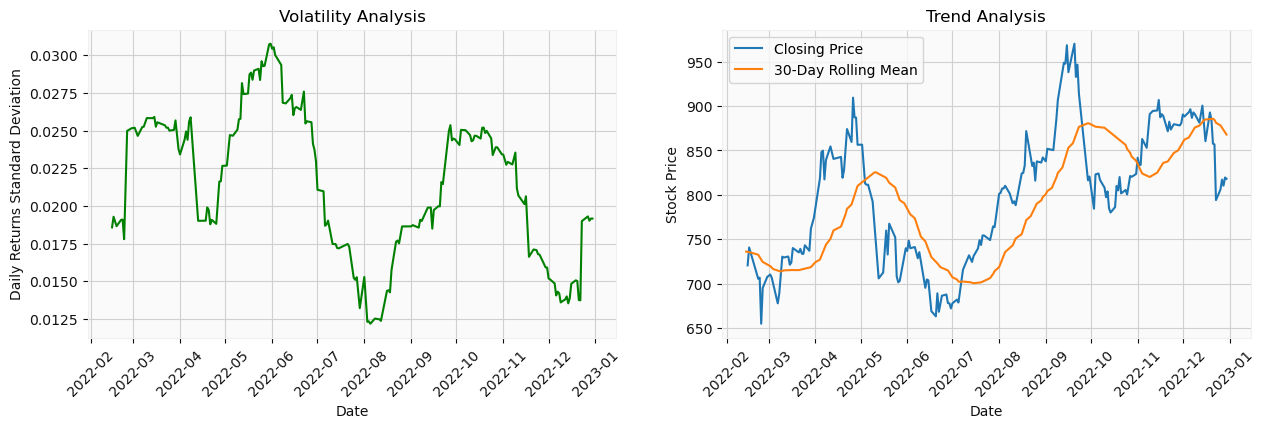



# Company Name -> Apollo Hospitals Enterprise Ltd.	# Industry -> Healthcare	# Ticker -> APOLLOHOSP

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:APOLLOHOSP


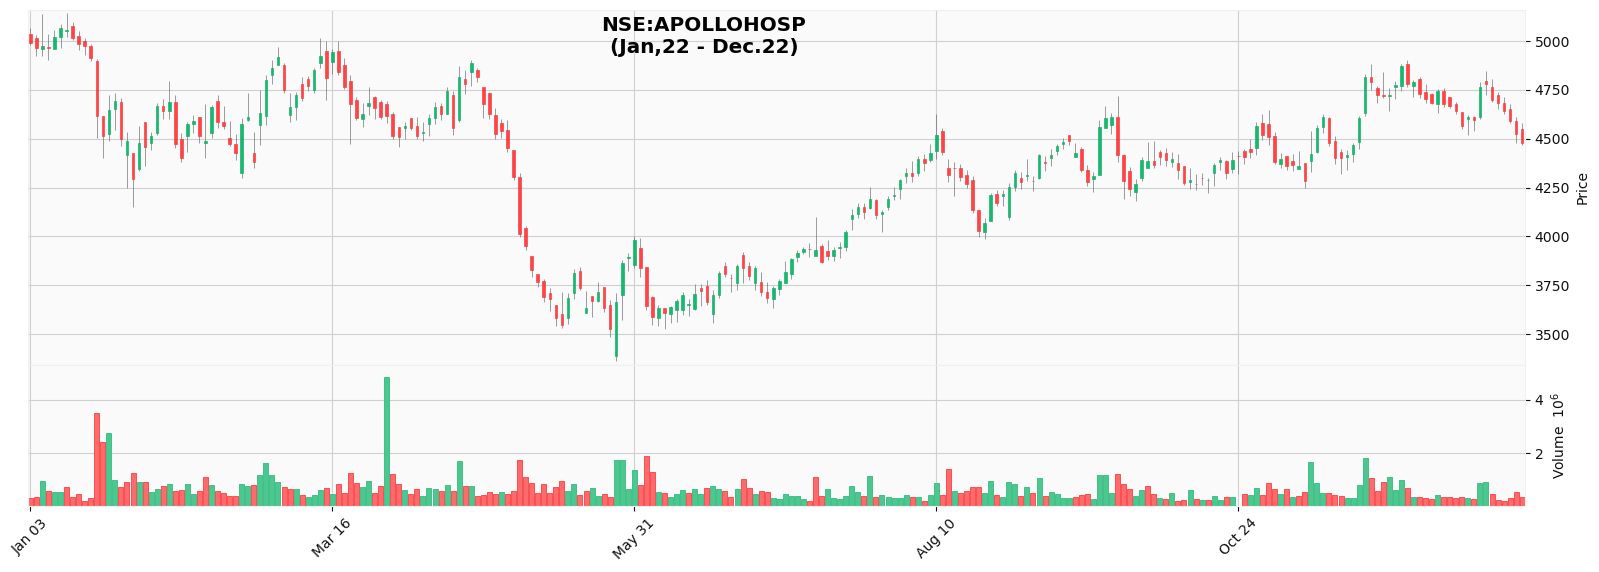

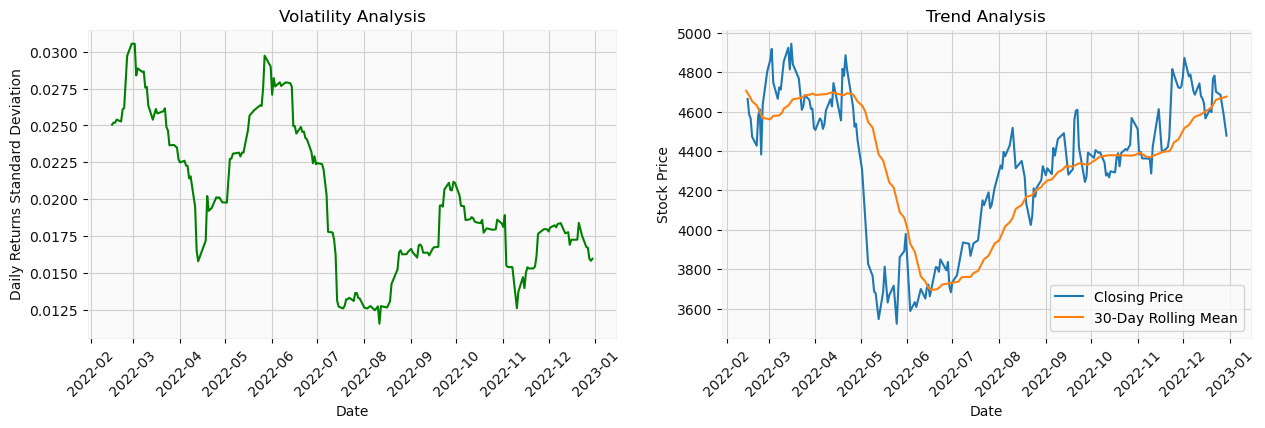



# Company Name -> Asian Paints Ltd.	# Industry -> Consumer Durables	# Ticker -> ASIANPAINT

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:ASIANPAINT


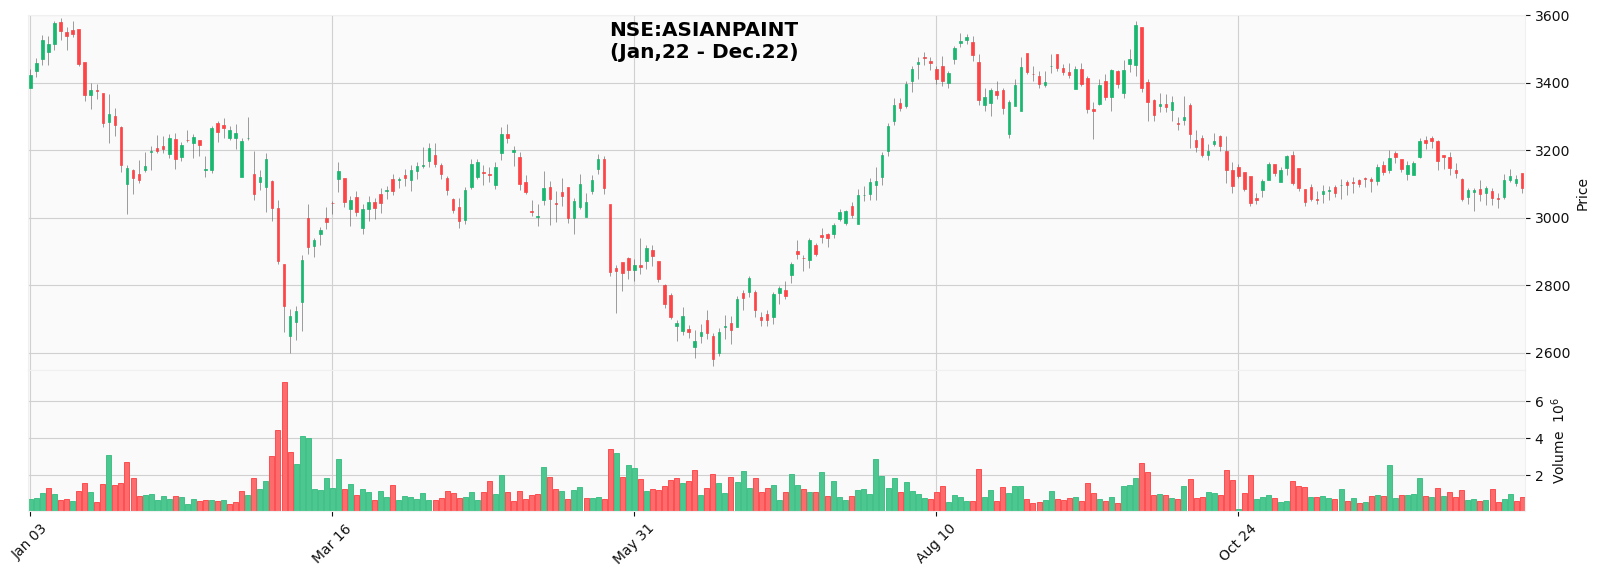

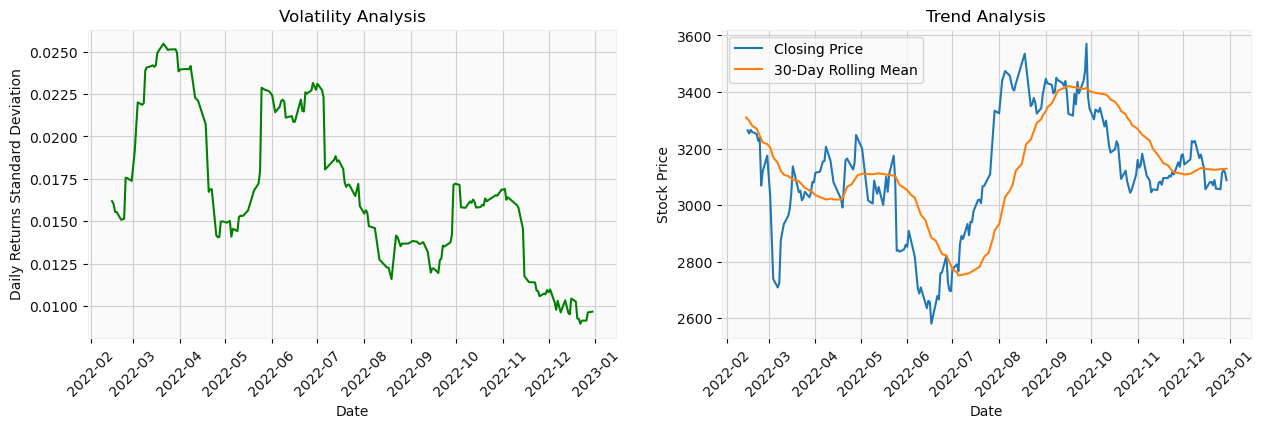



# Company Name -> Axis Bank Ltd.	# Industry -> Financial Services	# Ticker -> AXISBANK

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:AXISBANK


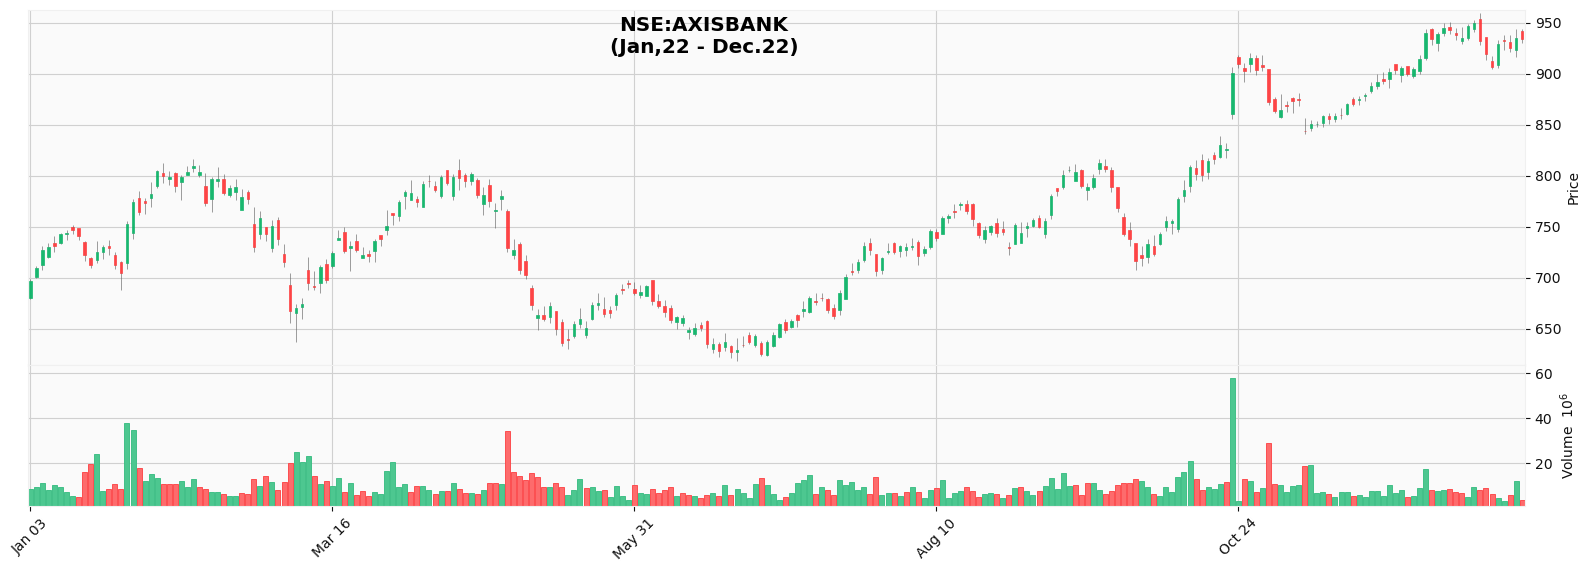

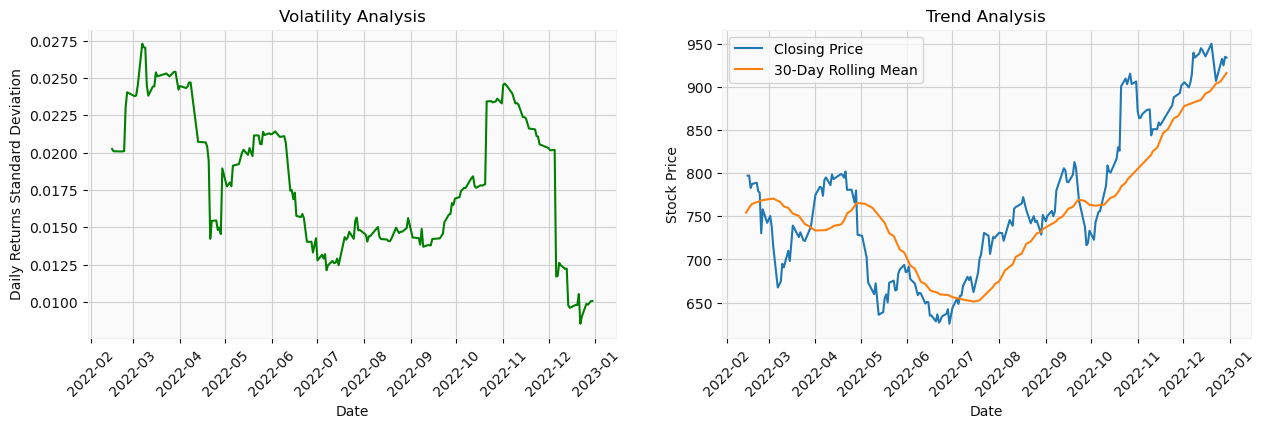



# Company Name -> Bajaj Auto Ltd.	# Industry -> Automobile and Auto Components	# Ticker -> BAJAJ-AUTO

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:BAJAJ-AUTO


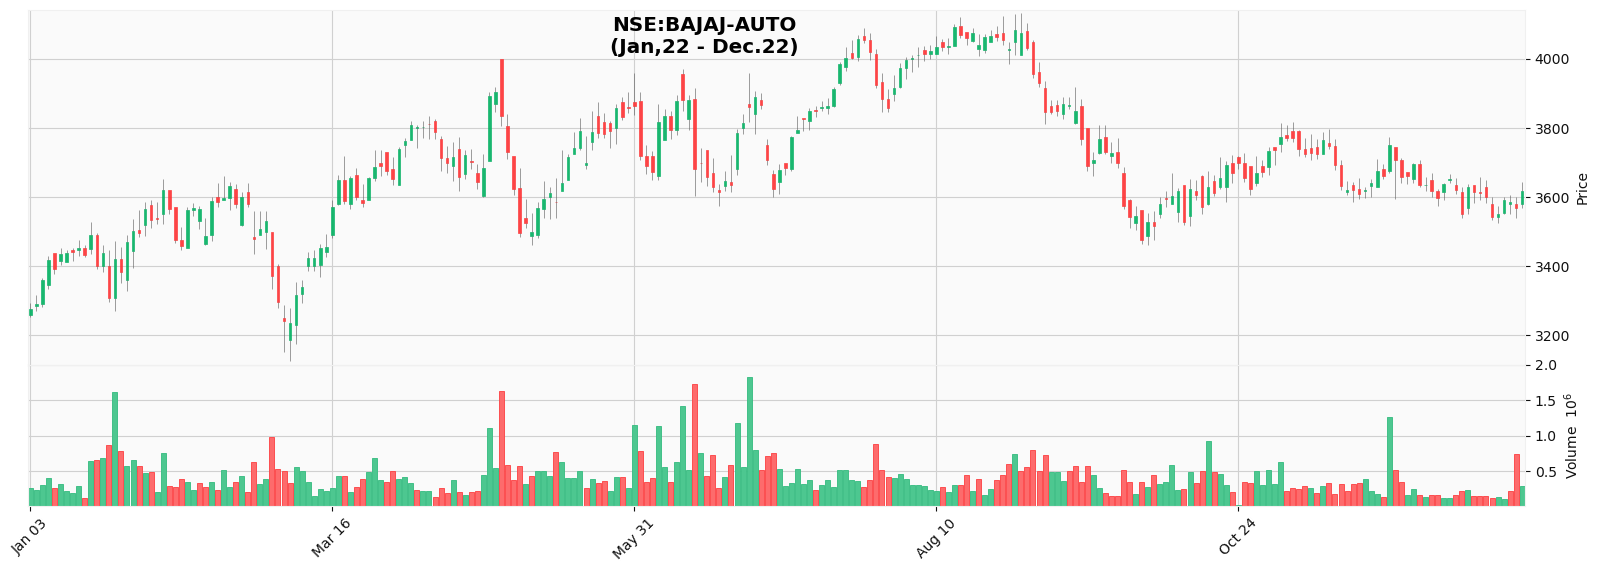

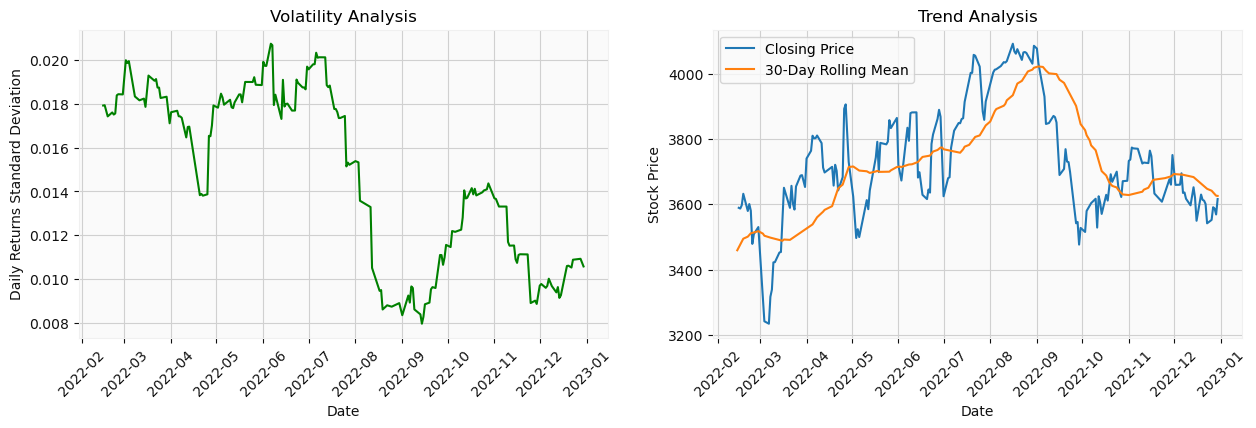



# Company Name -> Bajaj Finance Ltd.	# Industry -> Financial Services	# Ticker -> BAJFINANCE

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:BAJFINANCE


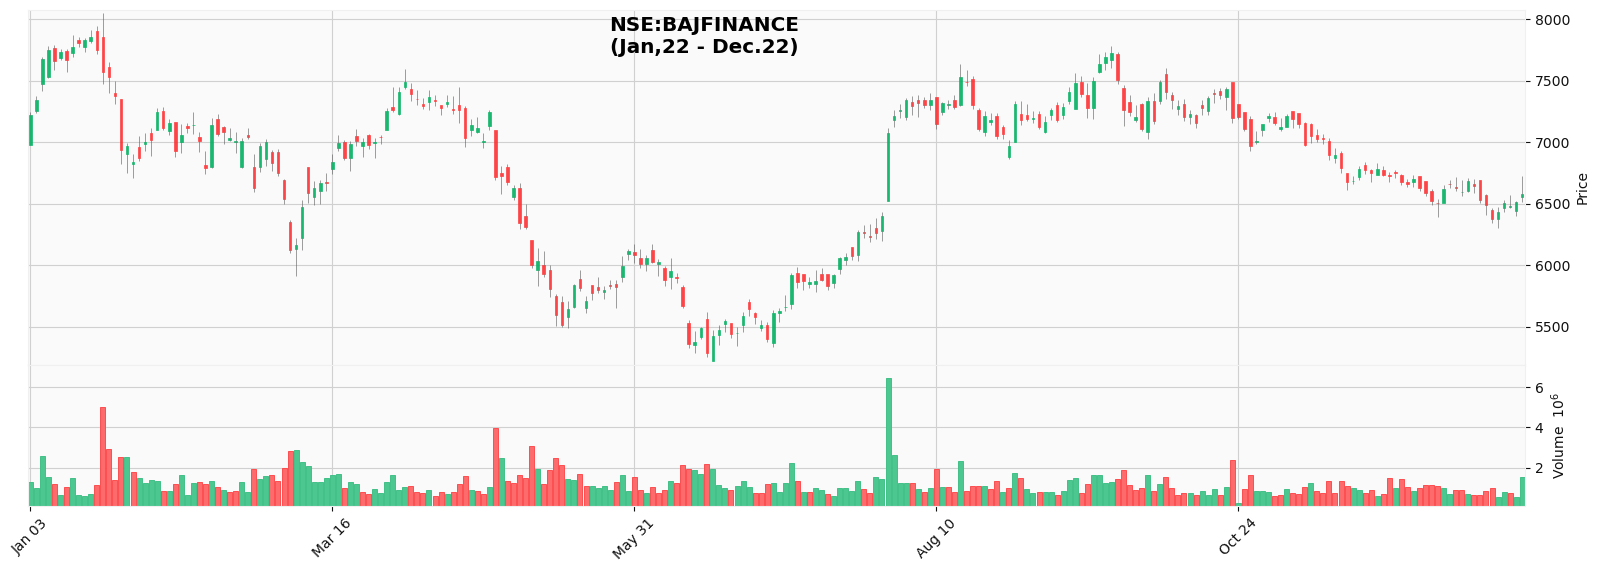

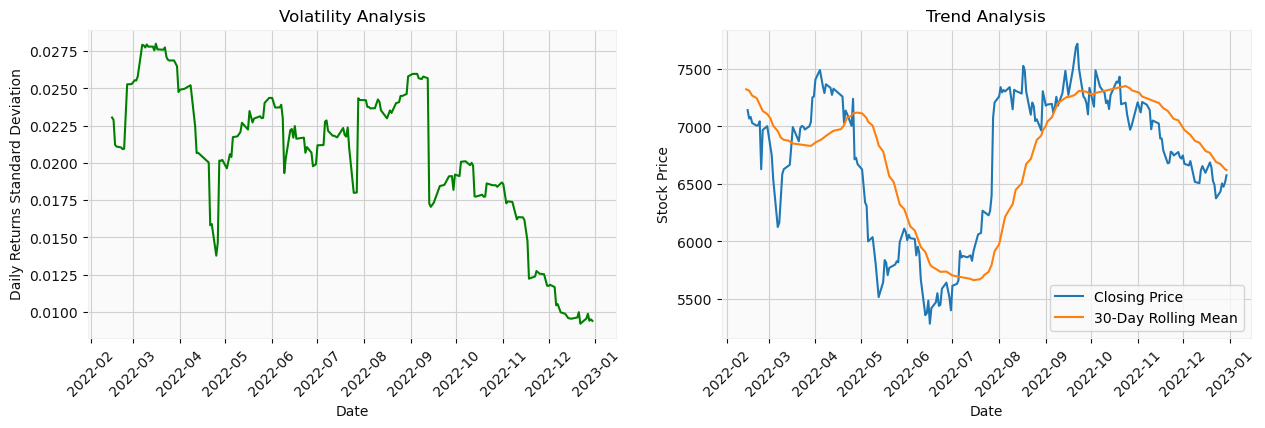



# Company Name -> Bajaj Finserv Ltd.	# Industry -> Financial Services	# Ticker -> BAJAJFINSV

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:BAJAJFINSV


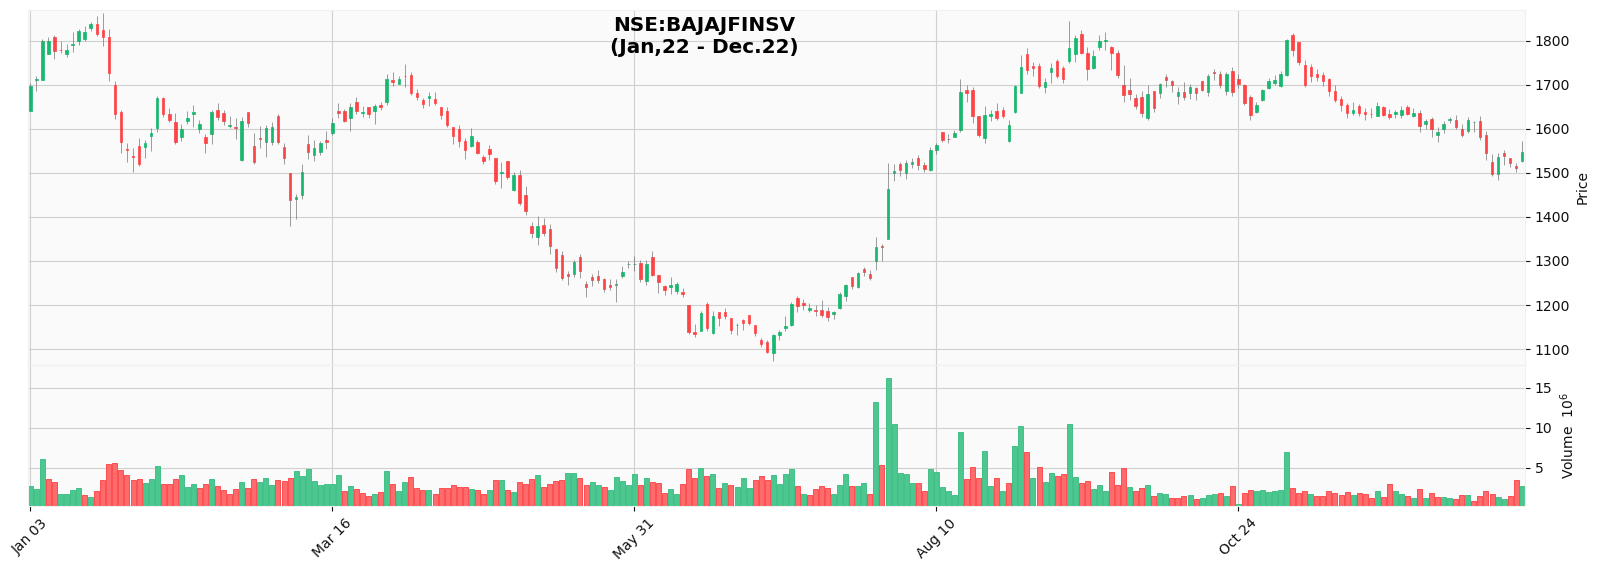

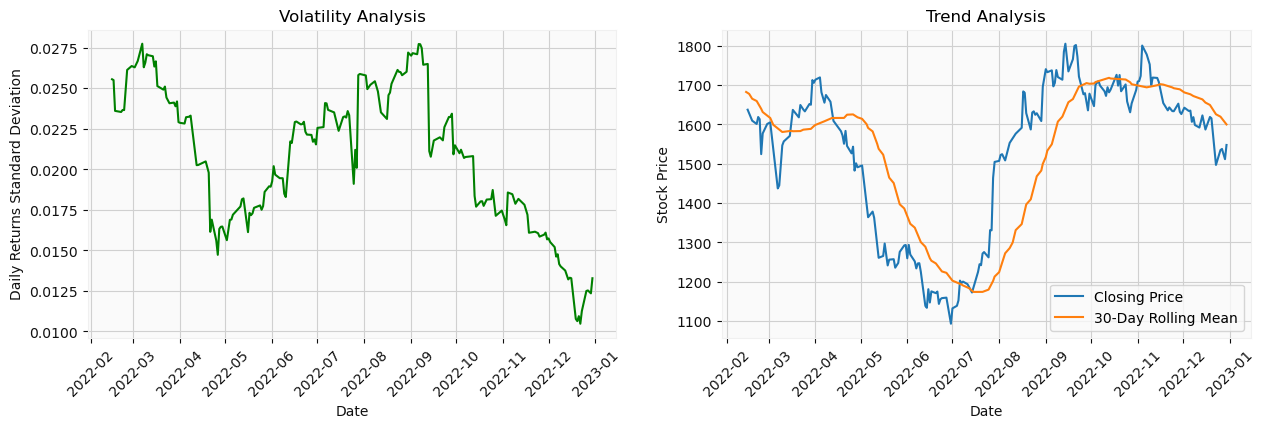



# Company Name -> Bharat Petroleum Corporation Ltd.	# Industry -> Oil Gas & Consumable Fuels	# Ticker -> BPCL

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:BPCL


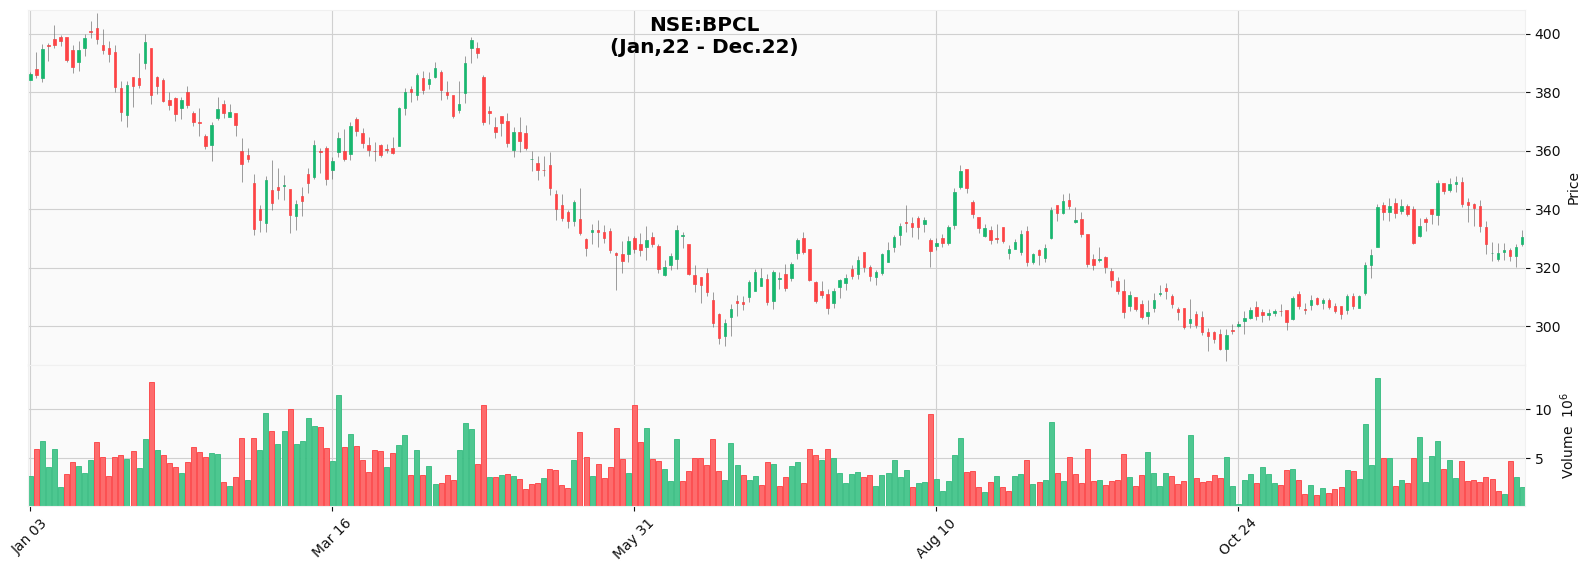

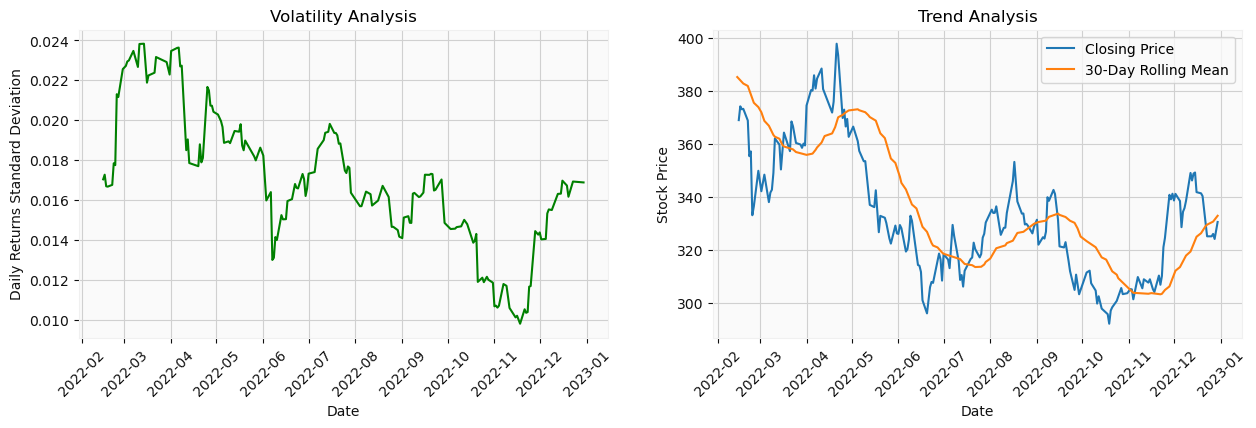



# Company Name -> Bharti Airtel Ltd.	# Industry -> Telecommunication	# Ticker -> BHARTIARTL

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:BHARTIARTL


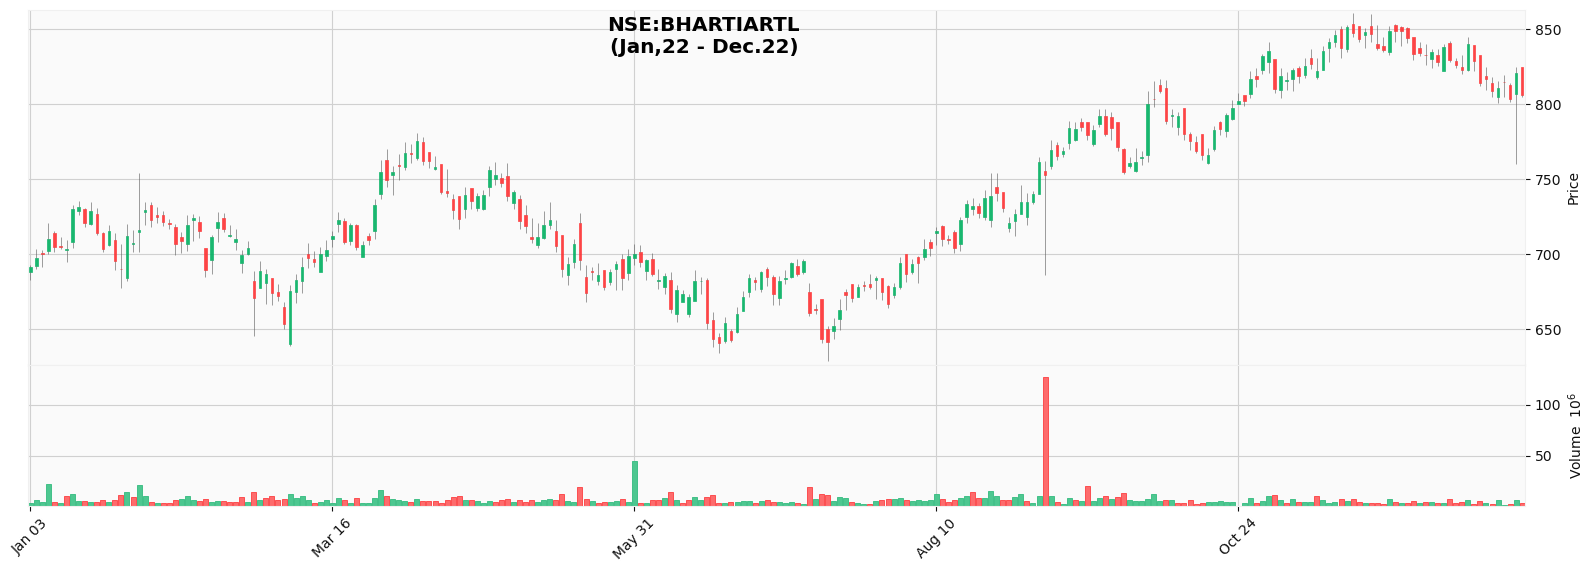

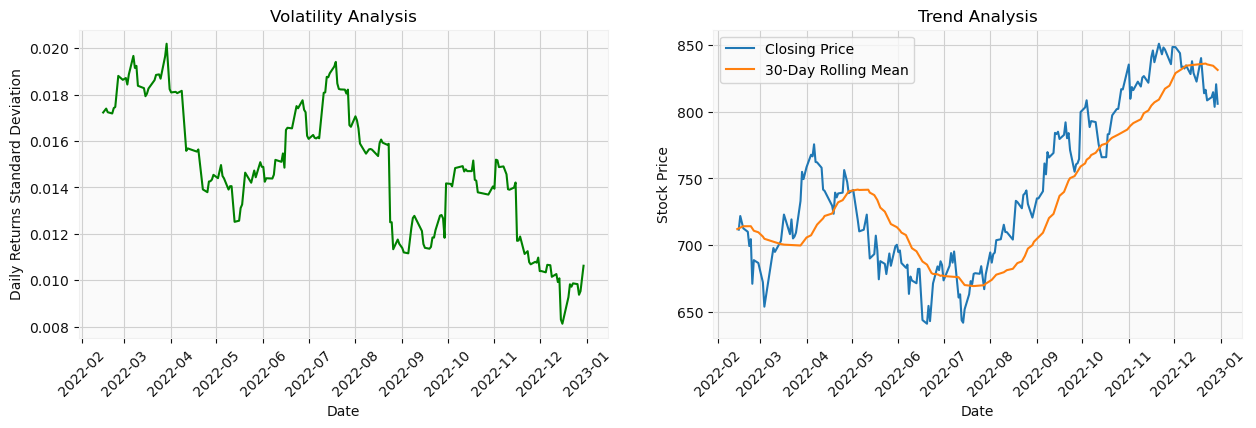



# Company Name -> Britannia Industries Ltd.	# Industry -> Fast Moving Consumer Goods	# Ticker -> BRITANNIA

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:BRITANNIA


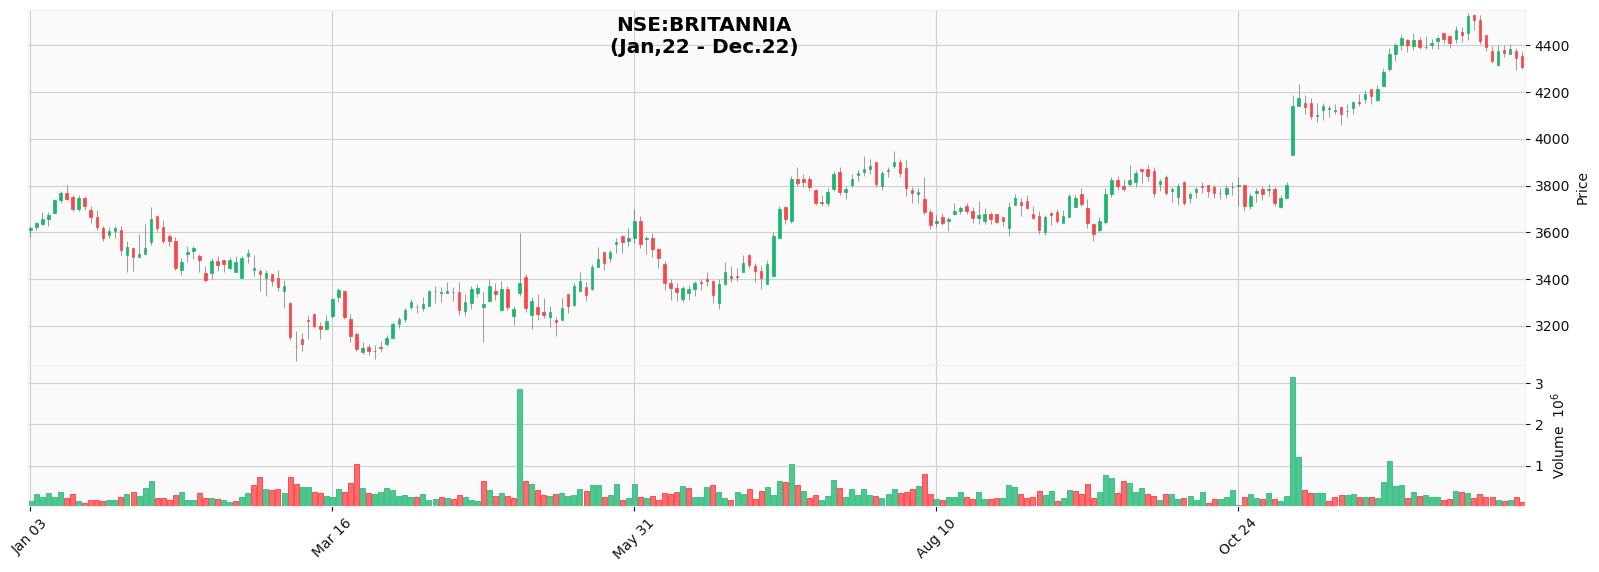

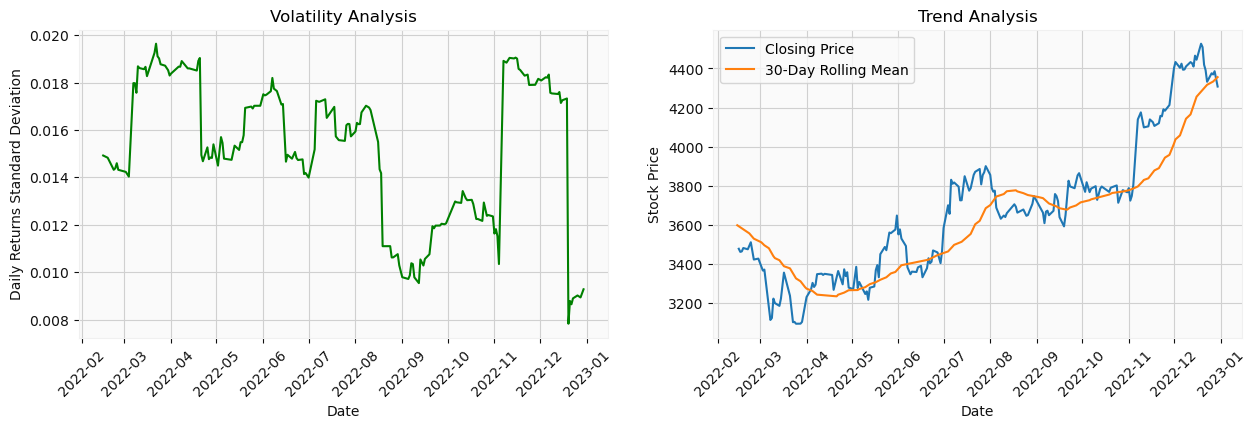



# Company Name -> Cipla Ltd.	# Industry -> Healthcare	# Ticker -> CIPLA

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:CIPLA


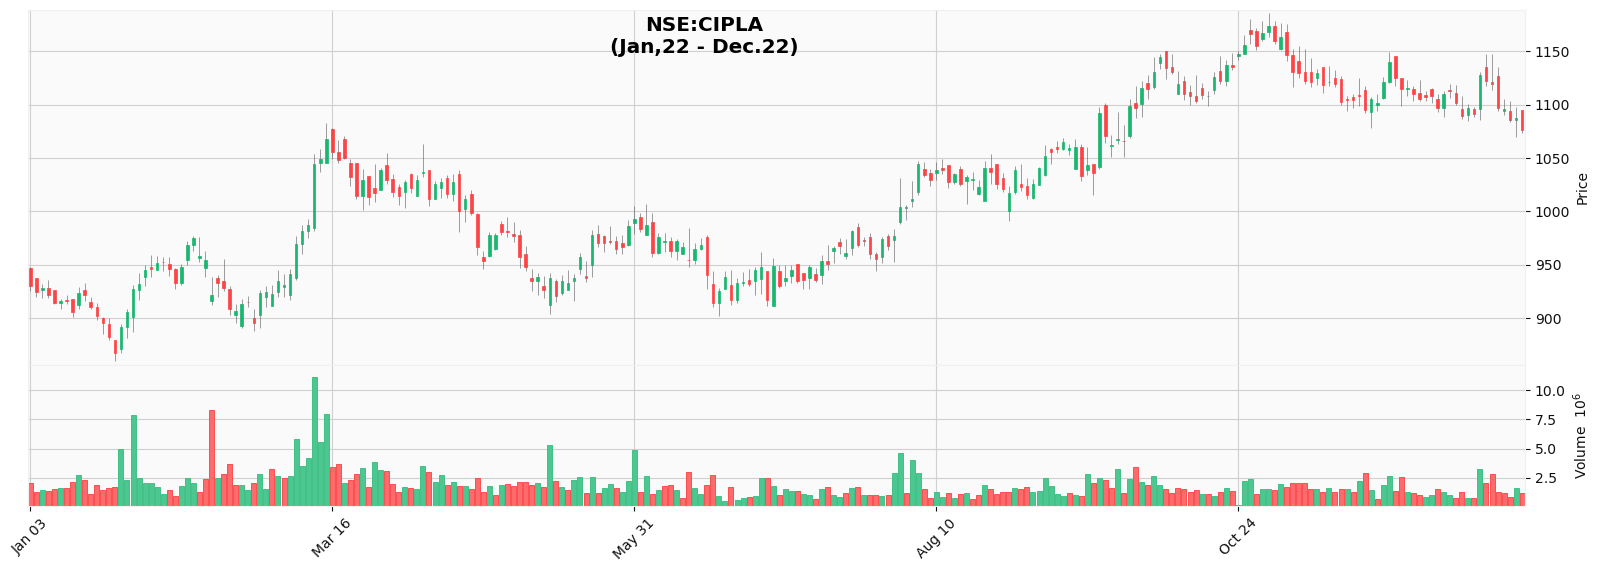

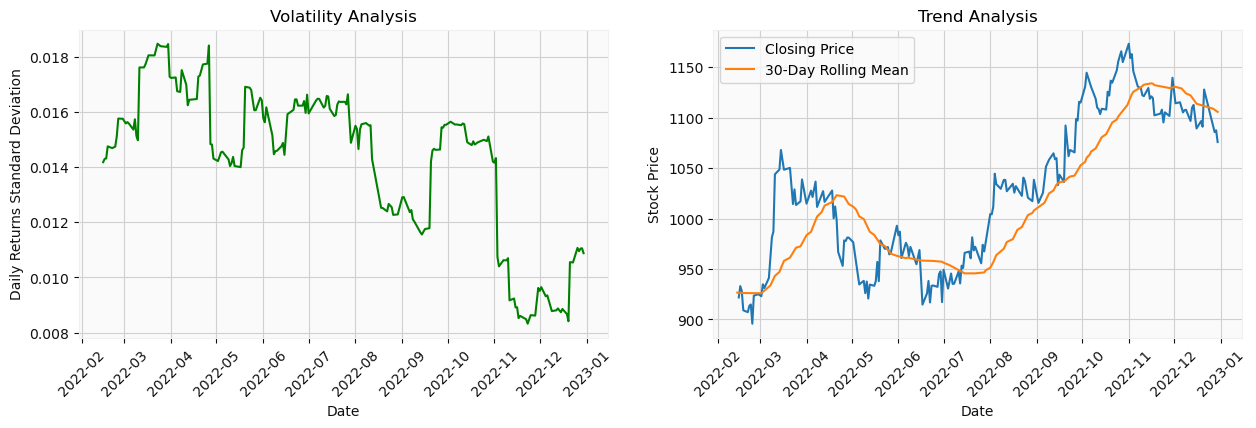



# Company Name -> Coal India Ltd.	# Industry -> Oil Gas & Consumable Fuels	# Ticker -> COALINDIA

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:COALINDIA


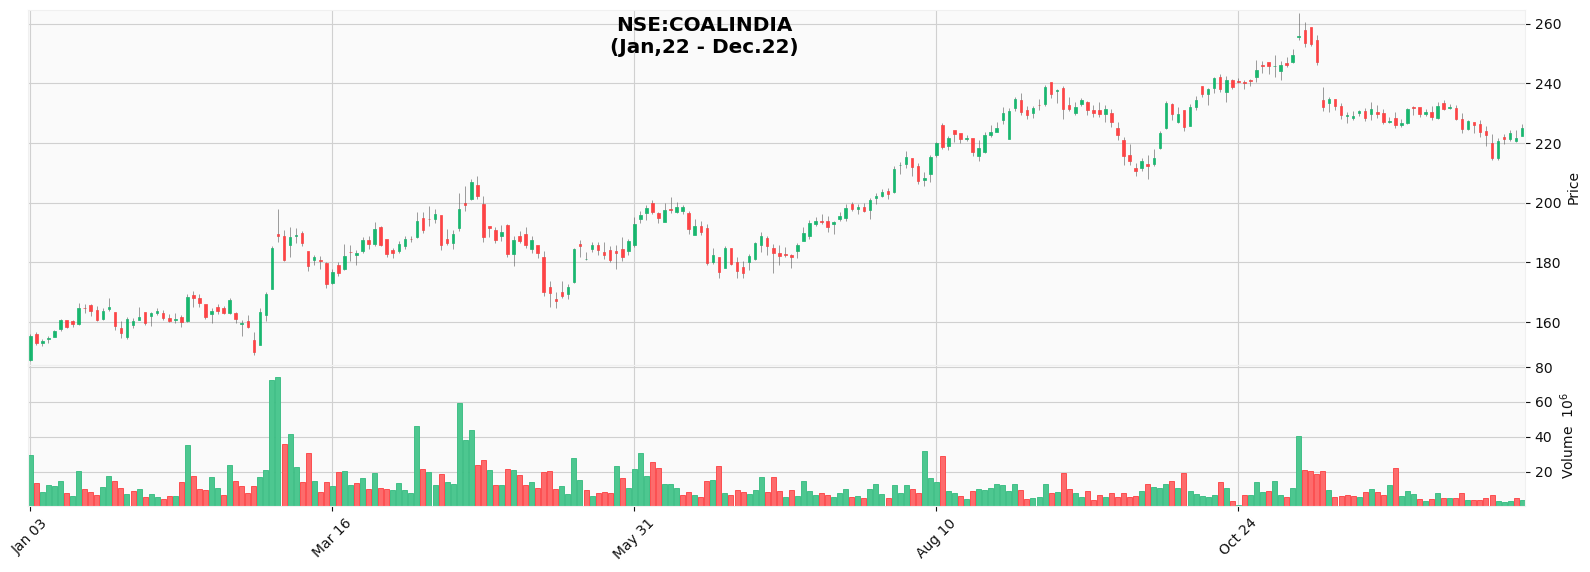

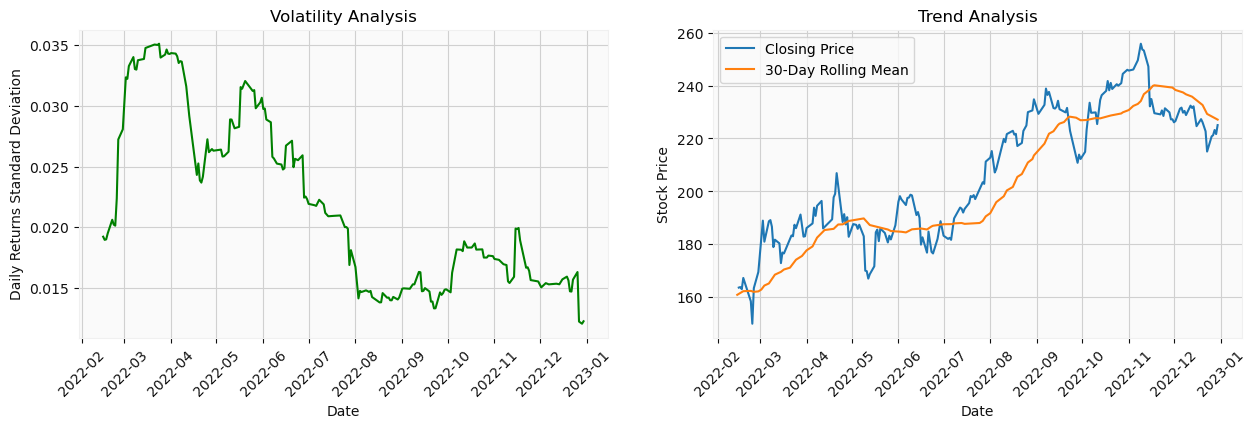



# Company Name -> Divi's Laboratories Ltd.	# Industry -> Healthcare	# Ticker -> DIVISLAB

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:DIVISLAB


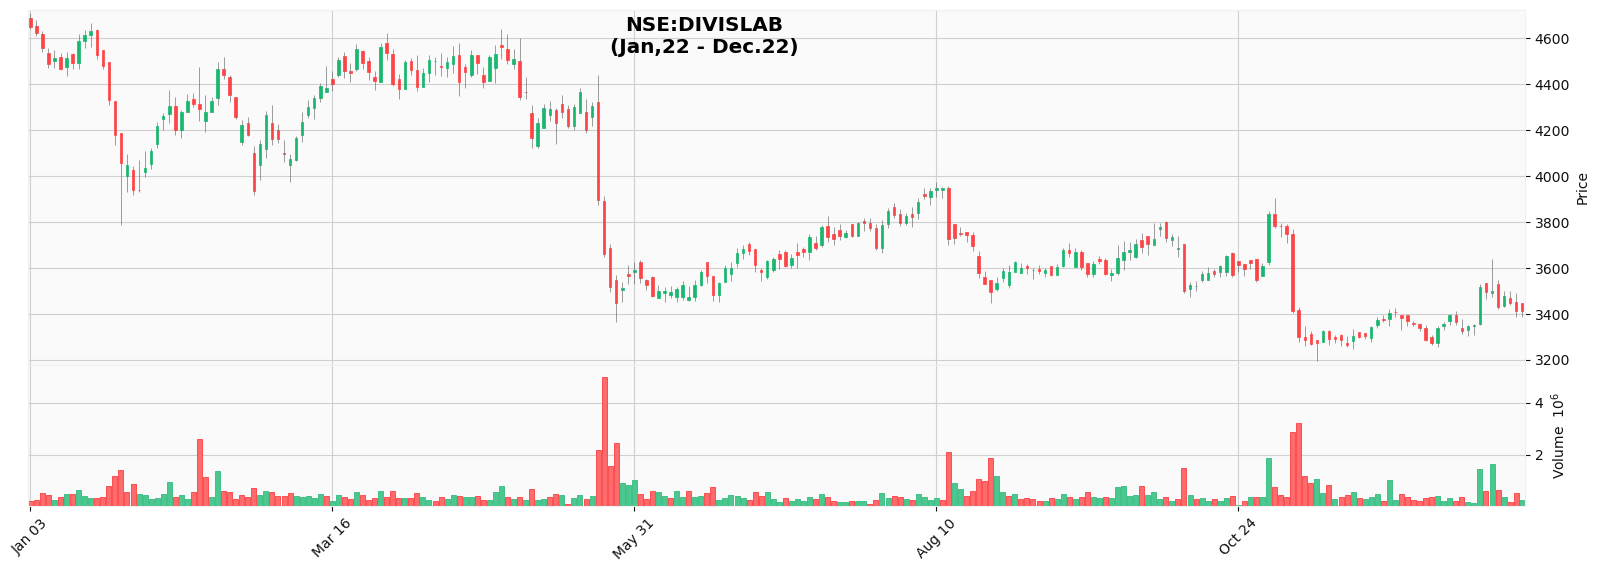

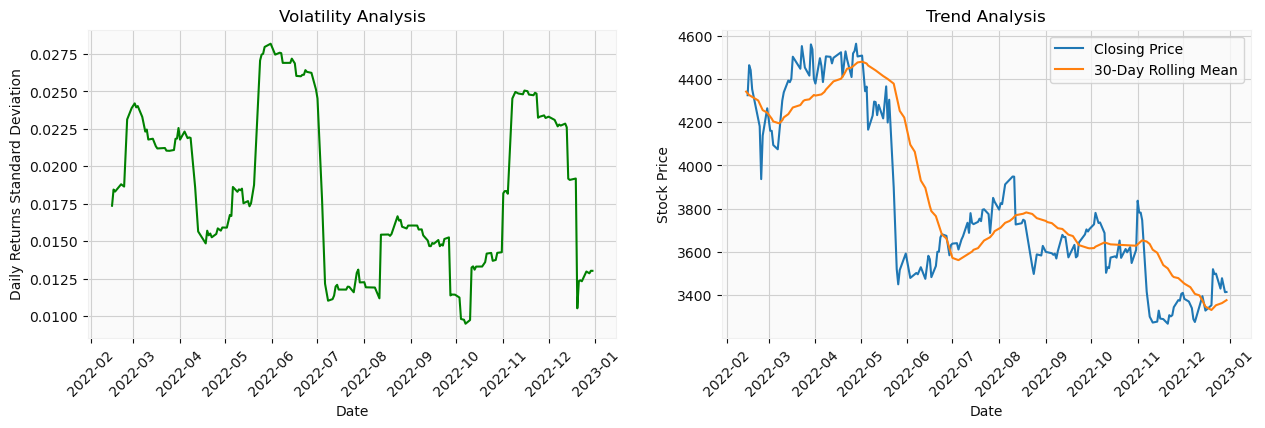



# Company Name -> Dr. Reddy's Laboratories Ltd.	# Industry -> Healthcare	# Ticker -> DRREDDY

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:DRREDDY


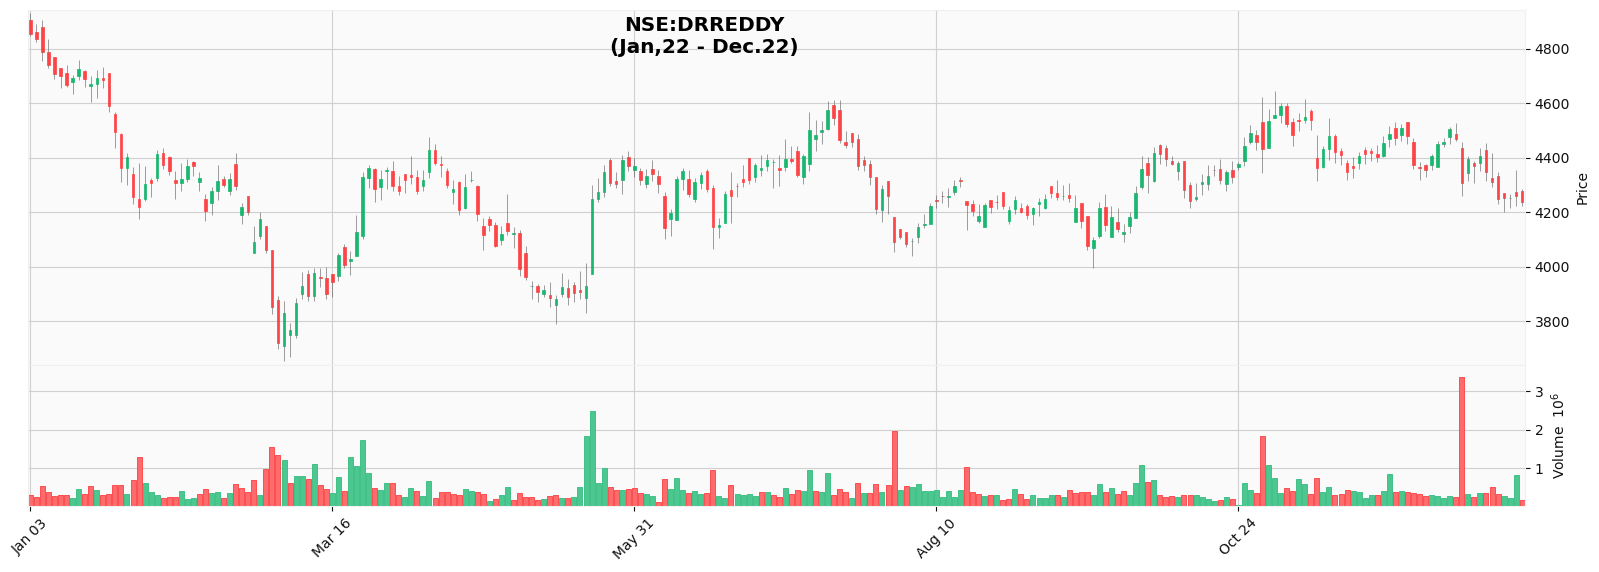

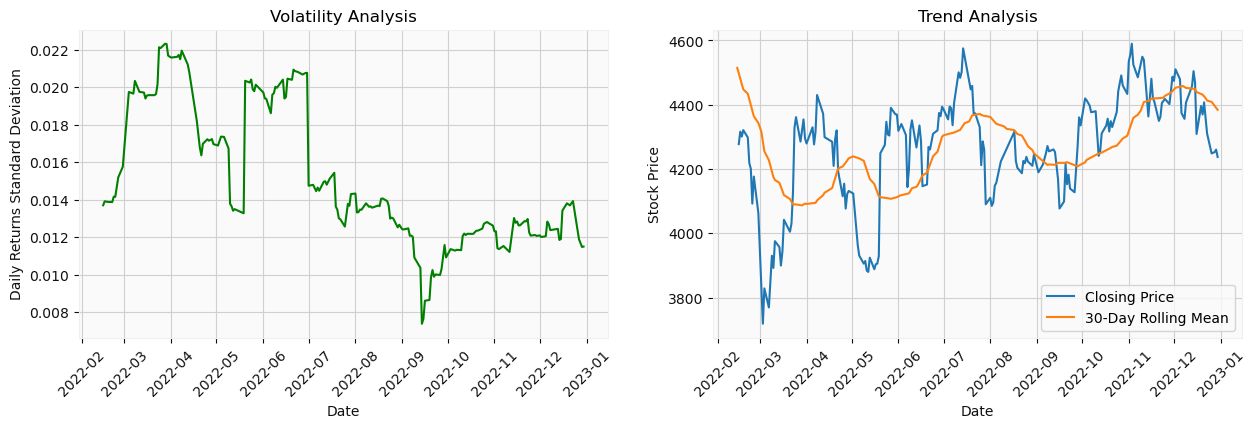



# Company Name -> Eicher Motors Ltd.	# Industry -> Automobile and Auto Components	# Ticker -> EICHERMOT

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:EICHERMOT


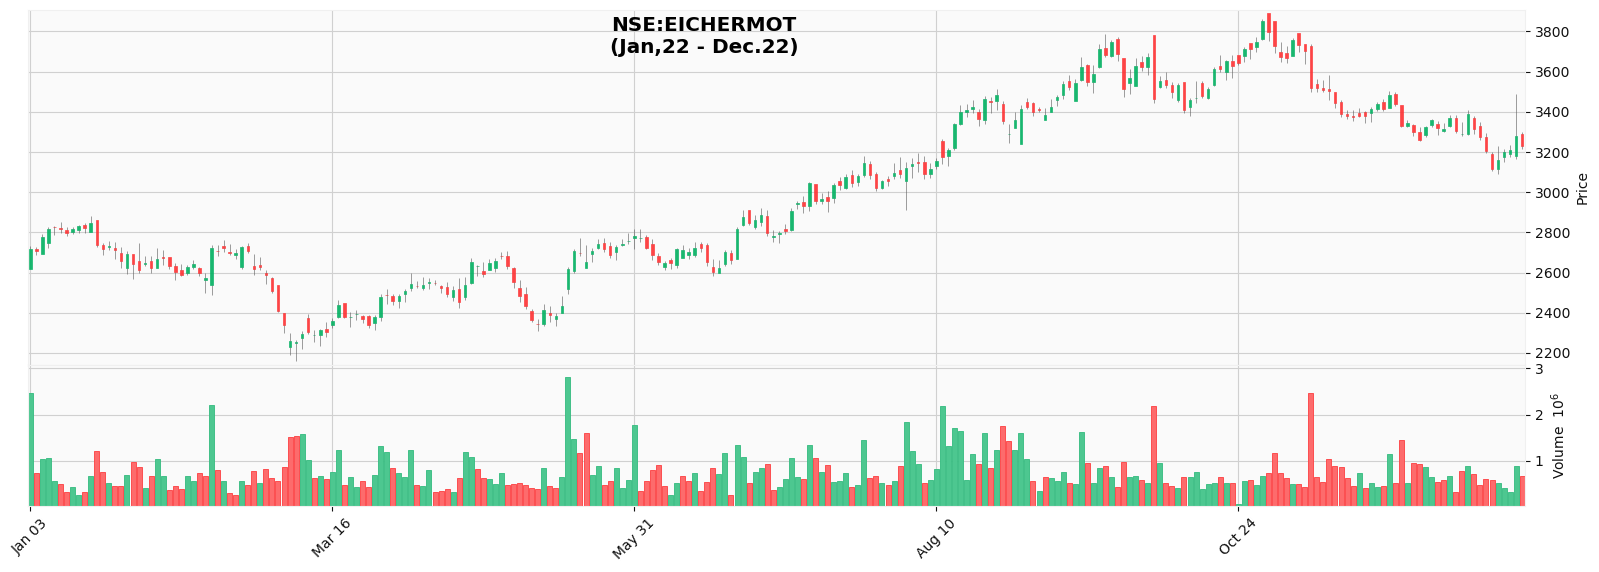

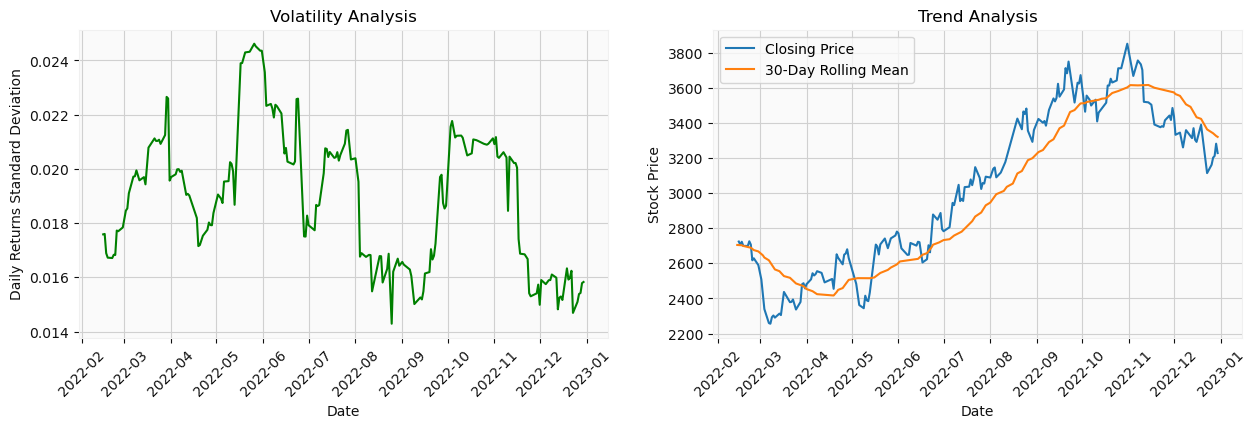



# Company Name -> Grasim Industries Ltd.	# Industry -> Construction Materials	# Ticker -> GRASIM

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:GRASIM


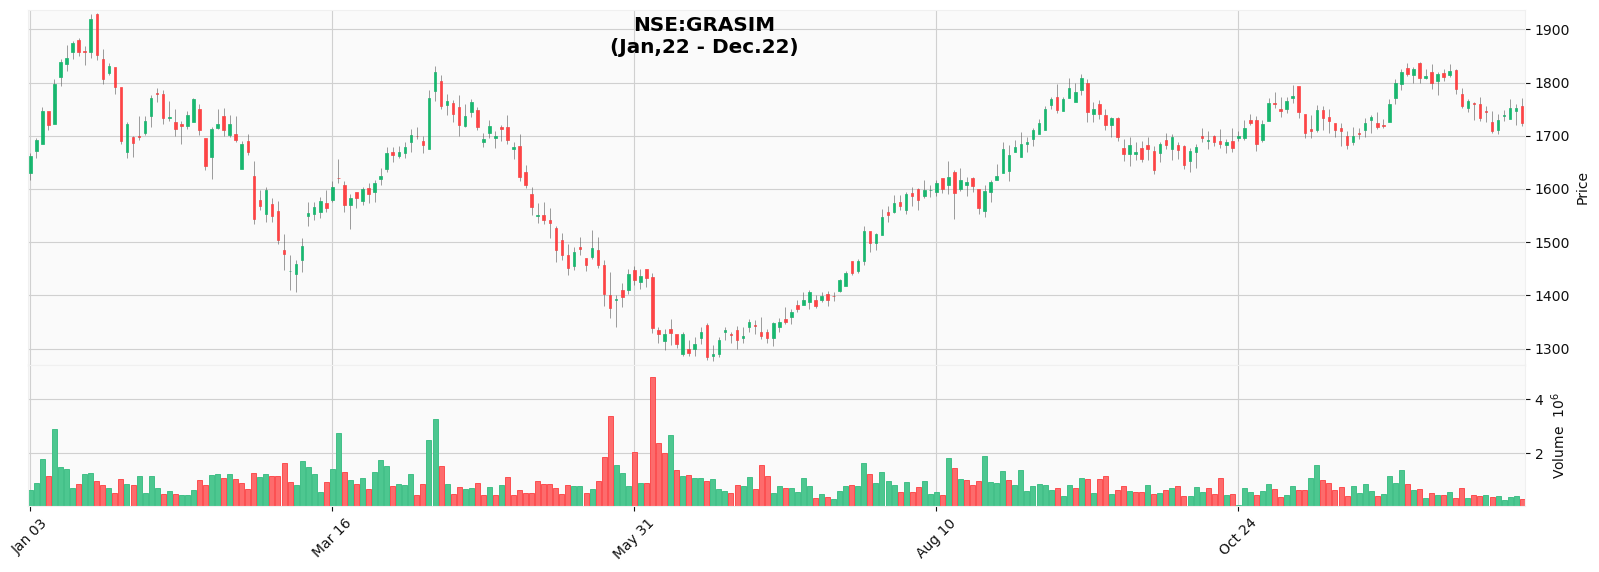

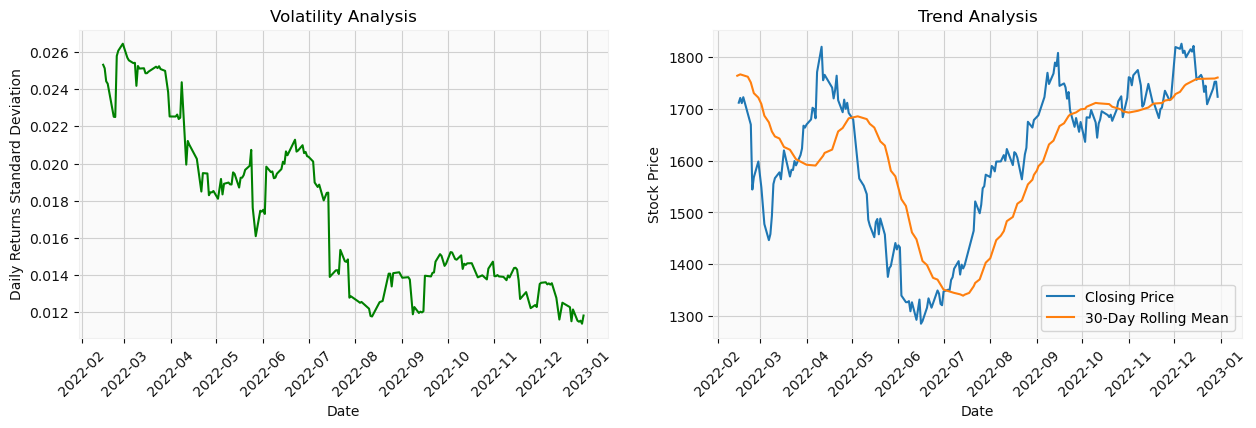



# Company Name -> HCL Technologies Ltd.	# Industry -> Information Technology	# Ticker -> HCLTECH

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:HCLTECH


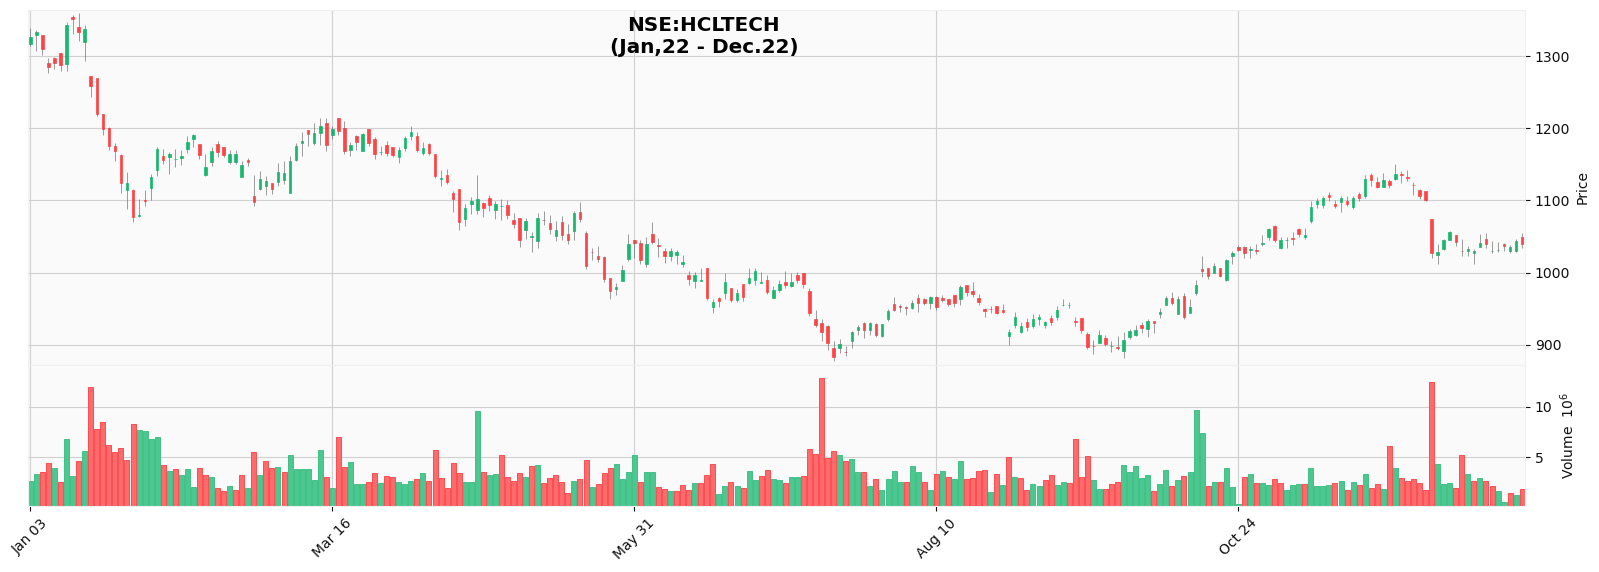

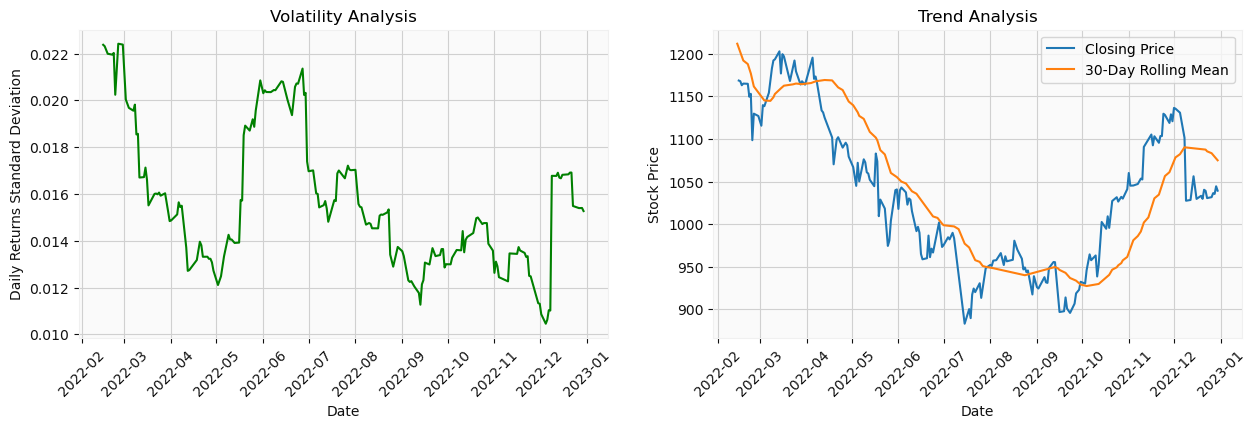



# Company Name -> HDFC Bank Ltd.	# Industry -> Financial Services	# Ticker -> HDFCBANK

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:HDFCBANK


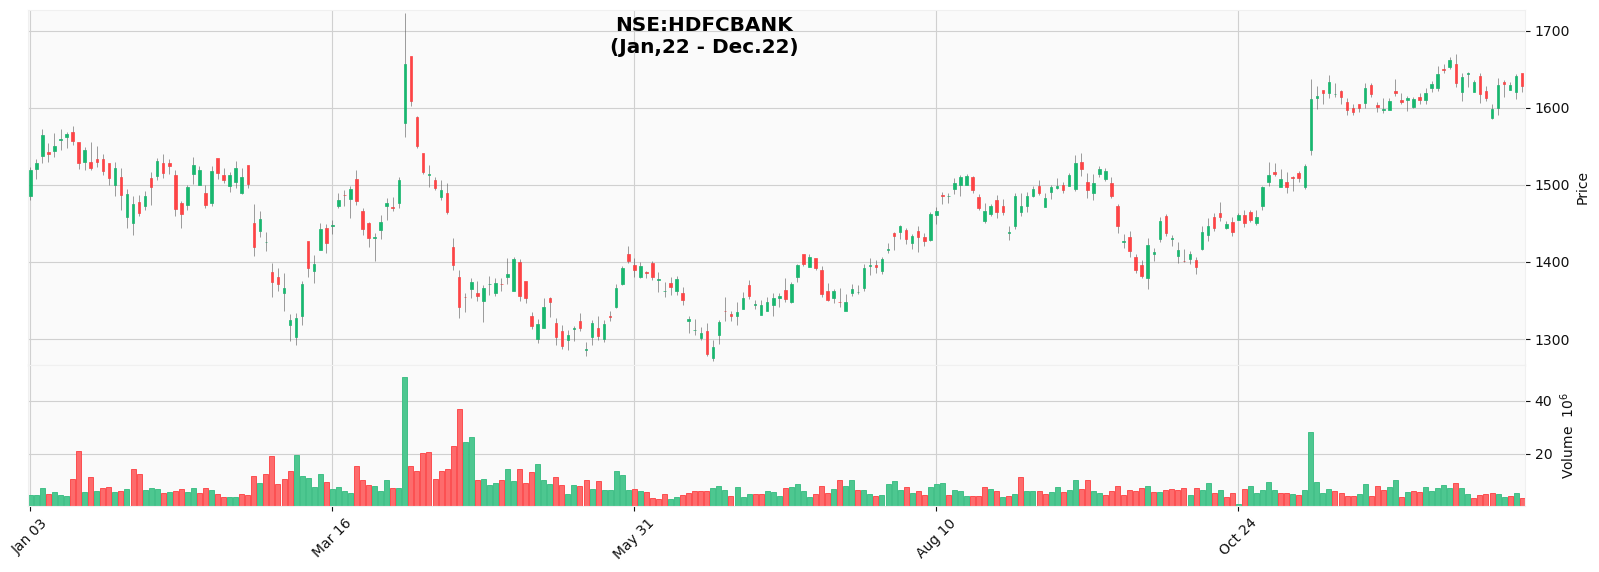

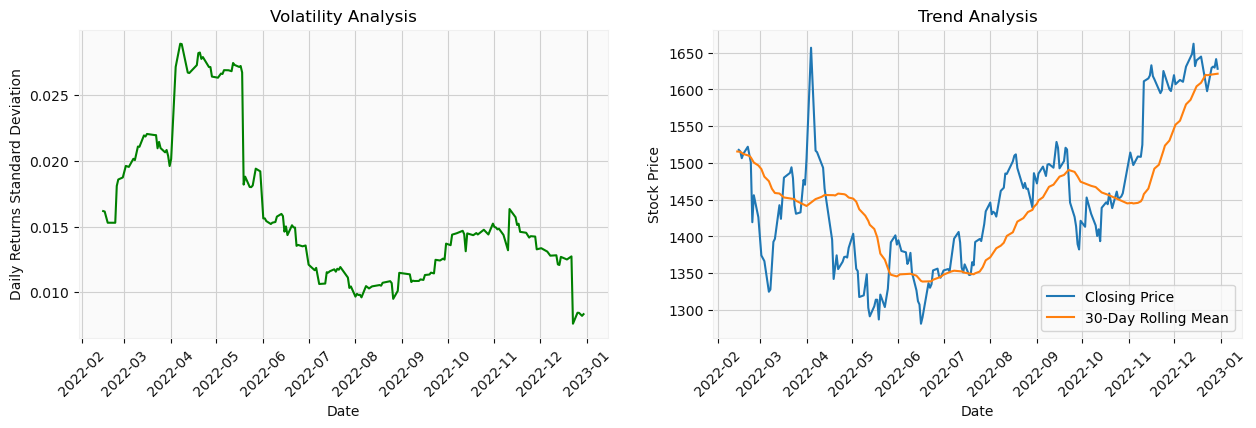



# Company Name -> HDFC Life Insurance Company Ltd.	# Industry -> Financial Services	# Ticker -> HDFCLIFE

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:HDFCLIFE


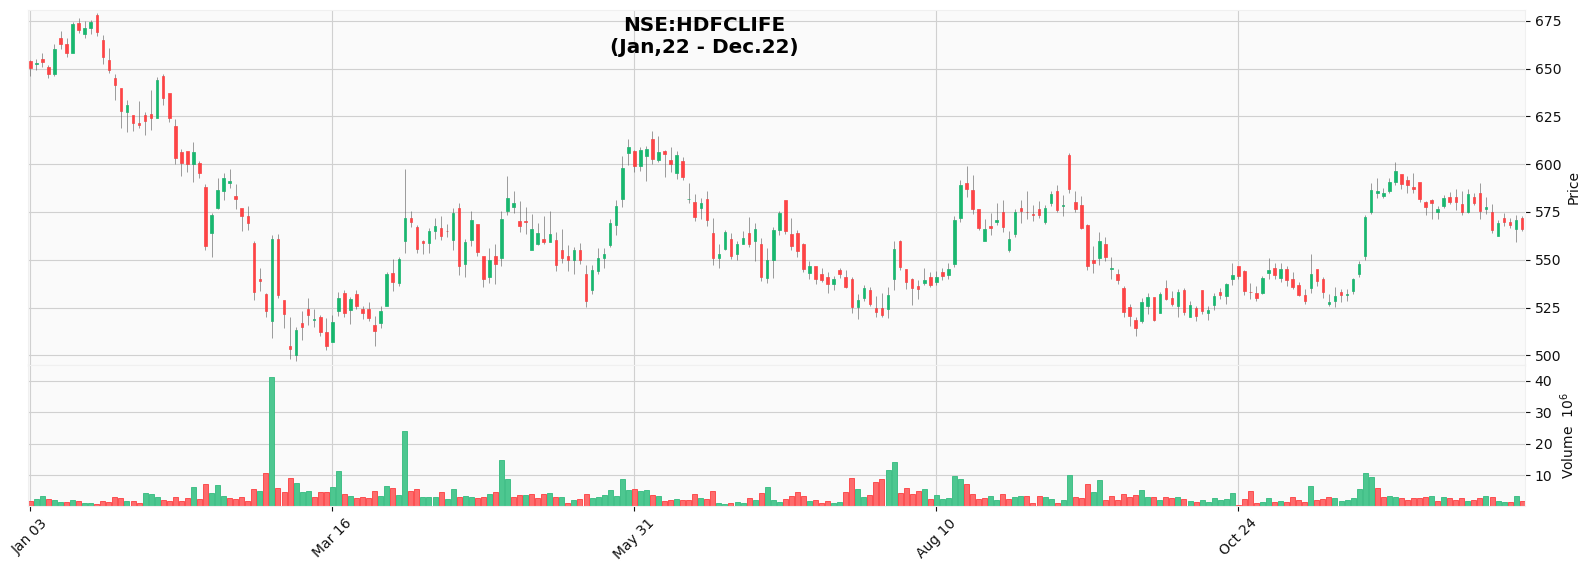

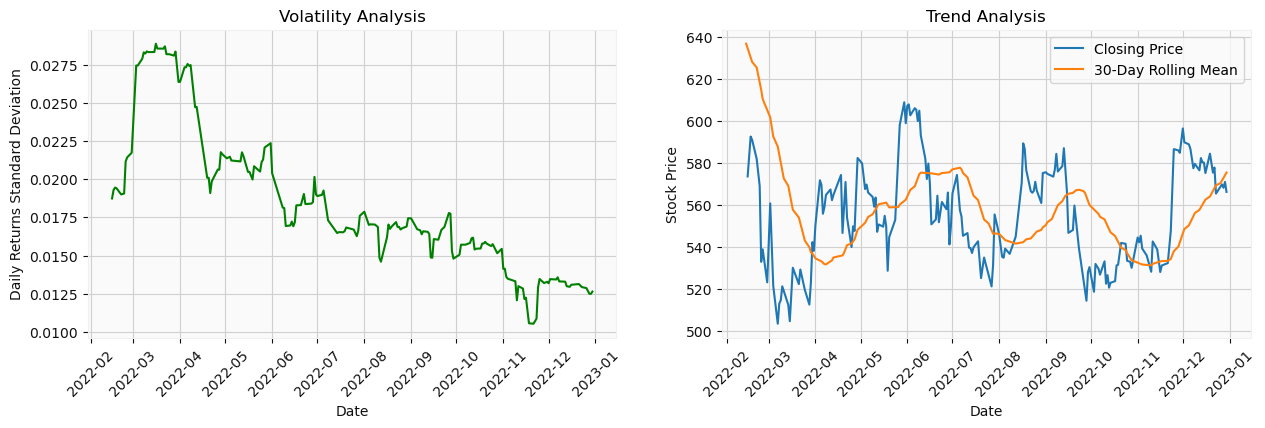



# Company Name -> Hero MotoCorp Ltd.	# Industry -> Automobile and Auto Components	# Ticker -> HEROMOTOCO

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:HEROMOTOCO


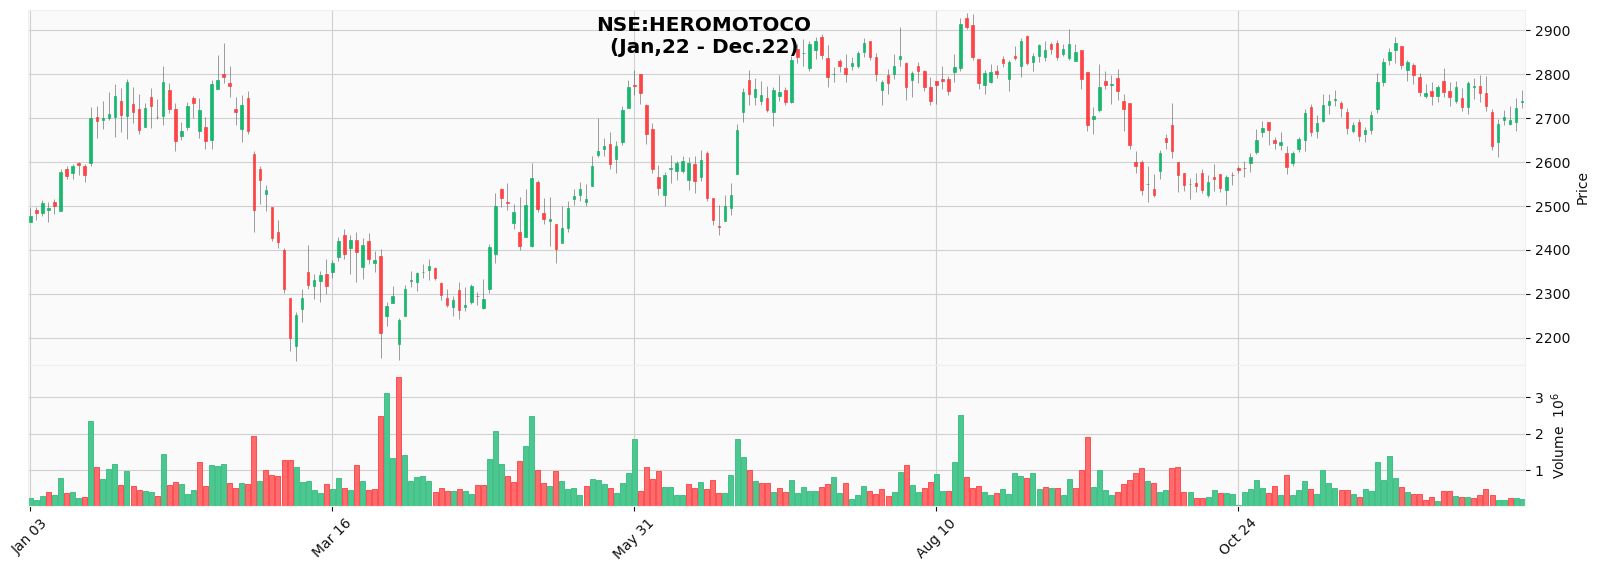

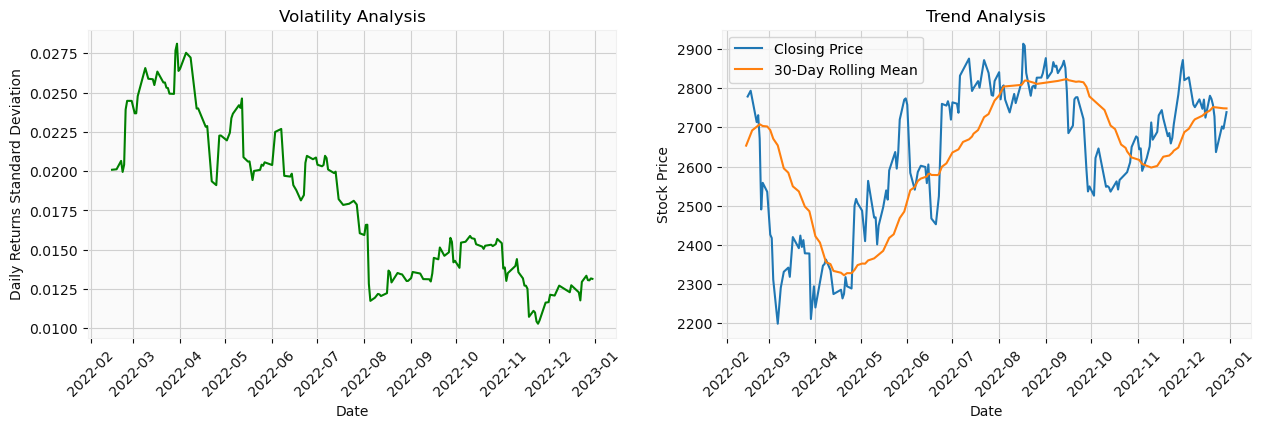



# Company Name -> Hindalco Industries Ltd.	# Industry -> Metals & Mining	# Ticker -> HINDALCO

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:HINDALCO


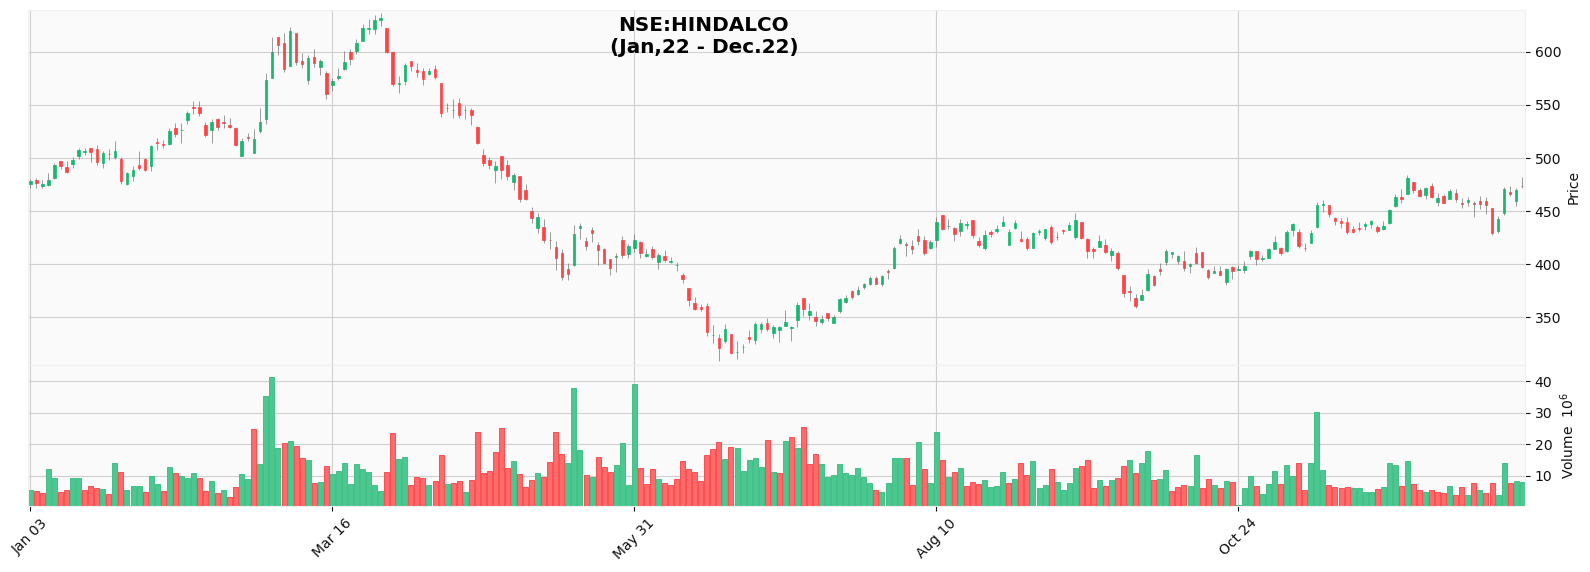

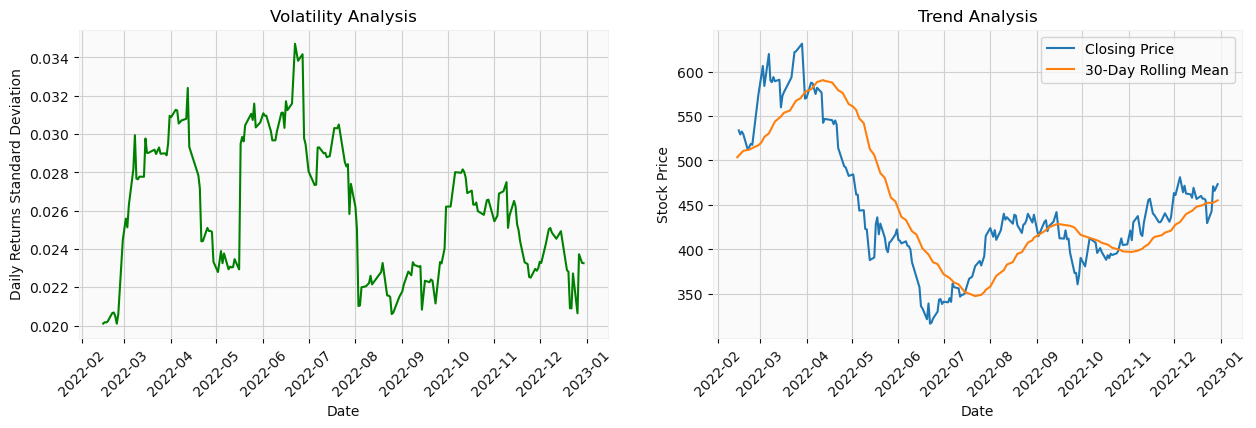



# Company Name -> Hindustan Unilever Ltd.	# Industry -> Fast Moving Consumer Goods	# Ticker -> HINDUNILVR

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:HINDUNILVR


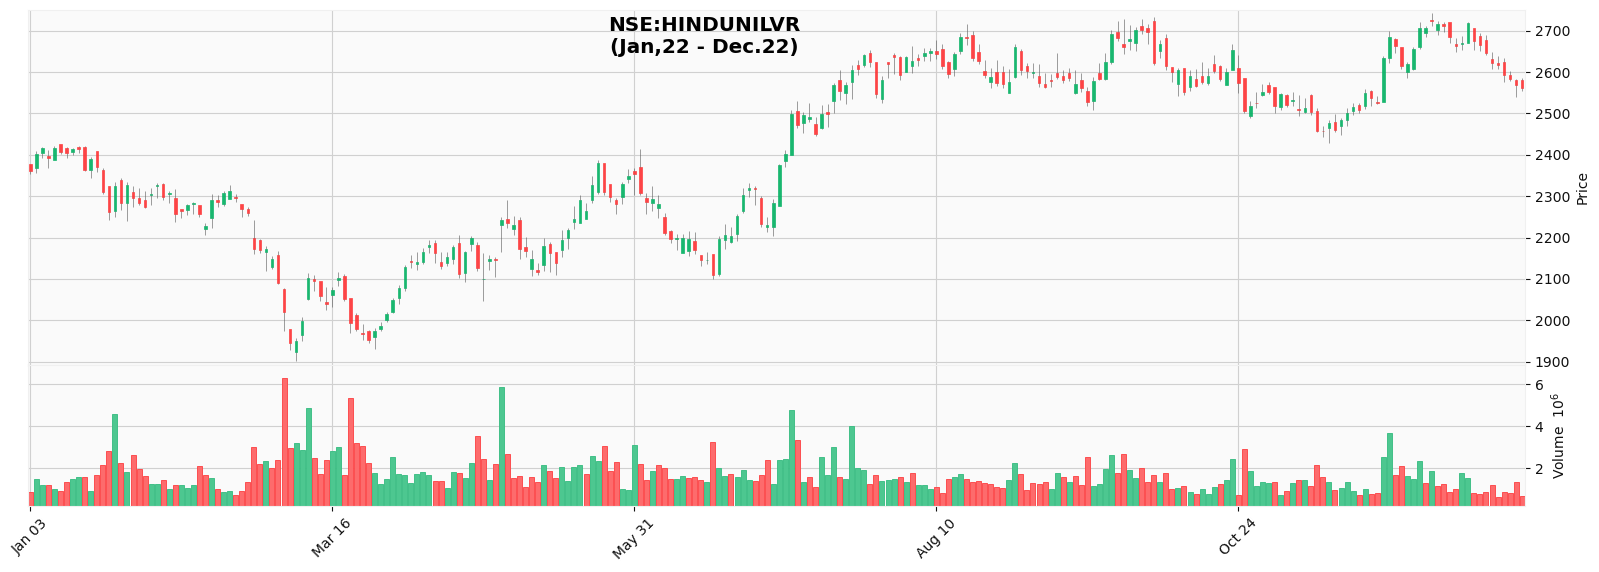

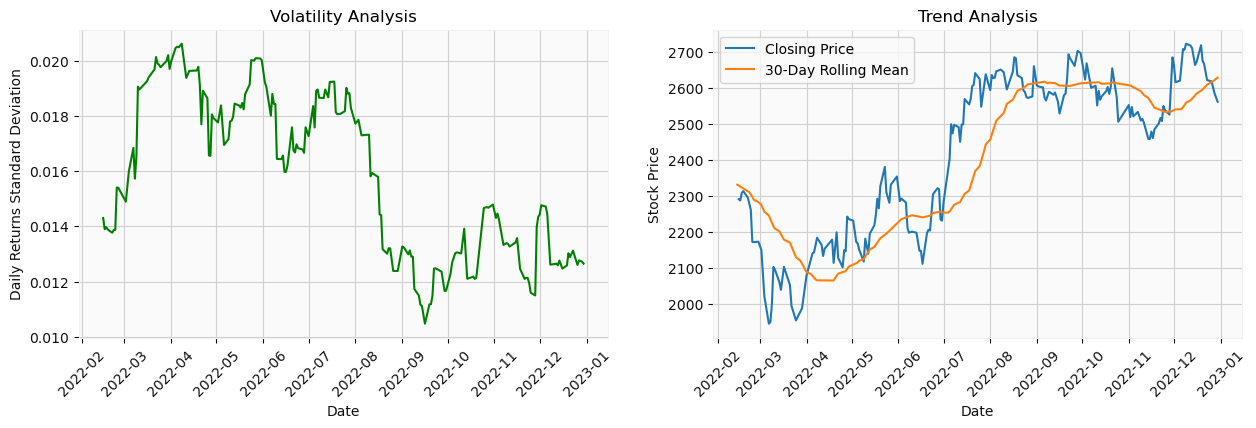



# Company Name -> Housing Development Finance Corporation Ltd.	# Industry -> Financial Services	# Ticker -> HDFC

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:HDFC


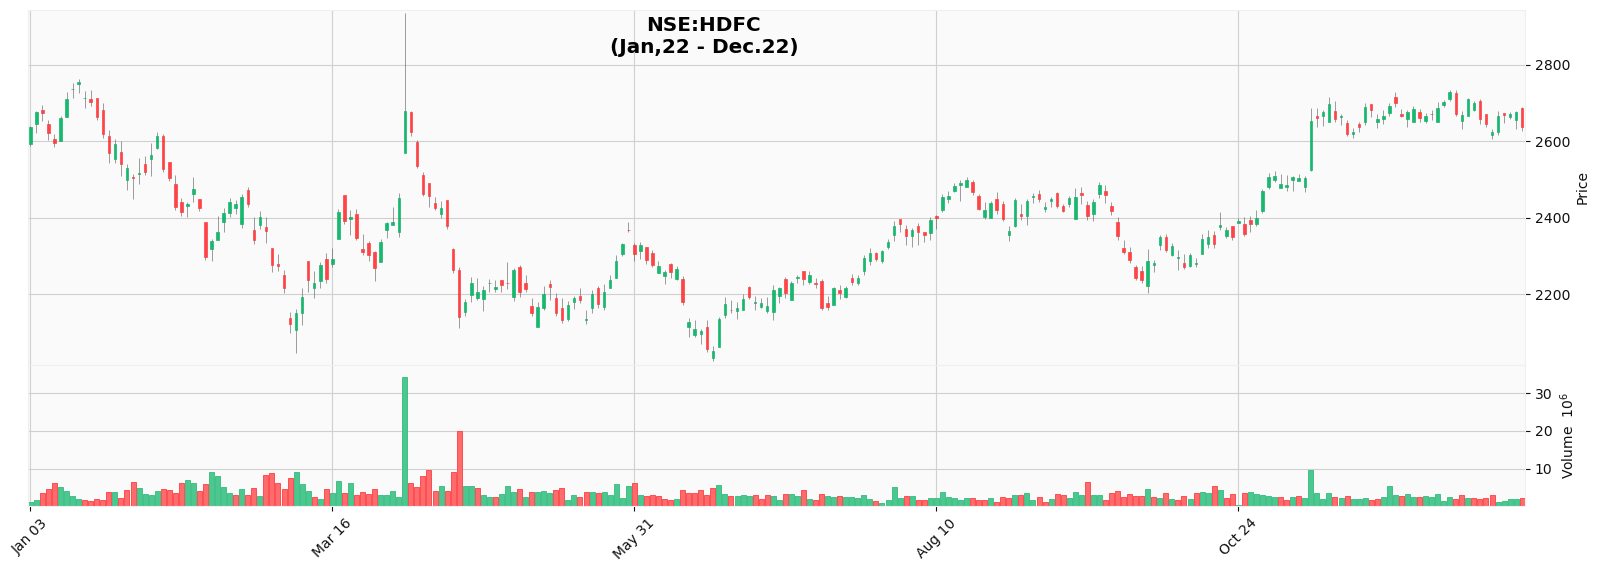

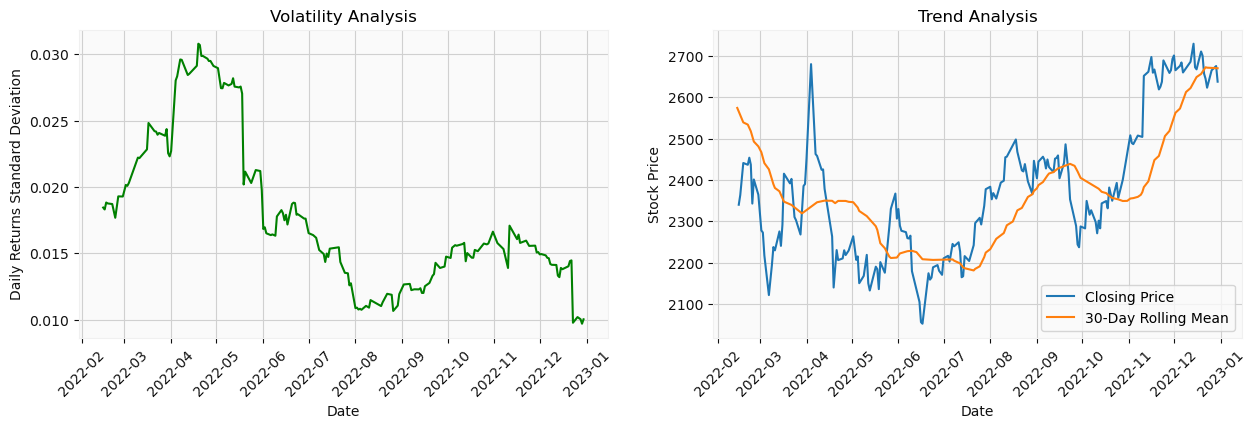



# Company Name -> ICICI Bank Ltd.	# Industry -> Financial Services	# Ticker -> ICICIBANK

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:ICICIBANK


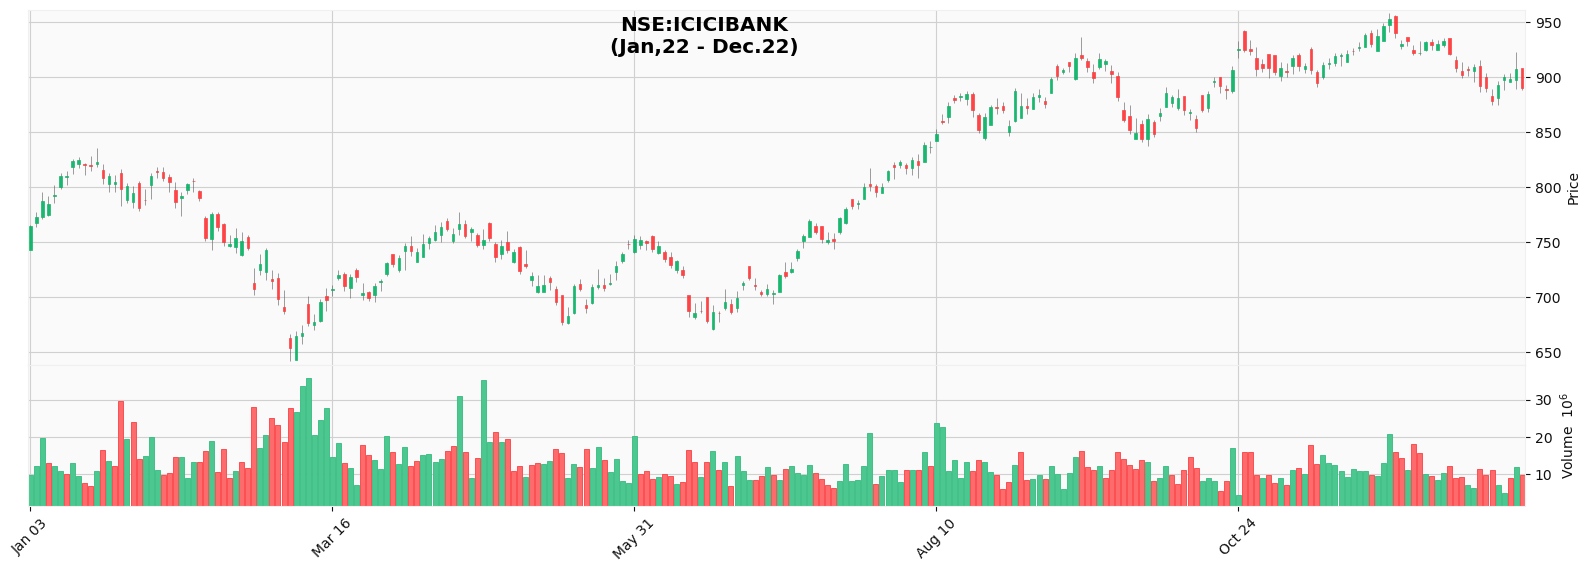

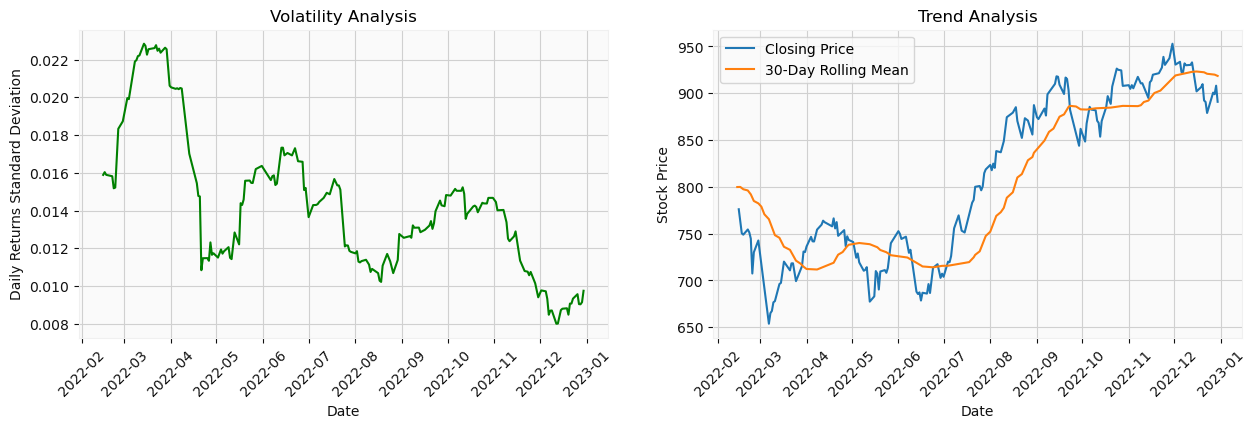



# Company Name -> ITC Ltd.	# Industry -> Fast Moving Consumer Goods	# Ticker -> ITC

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:ITC


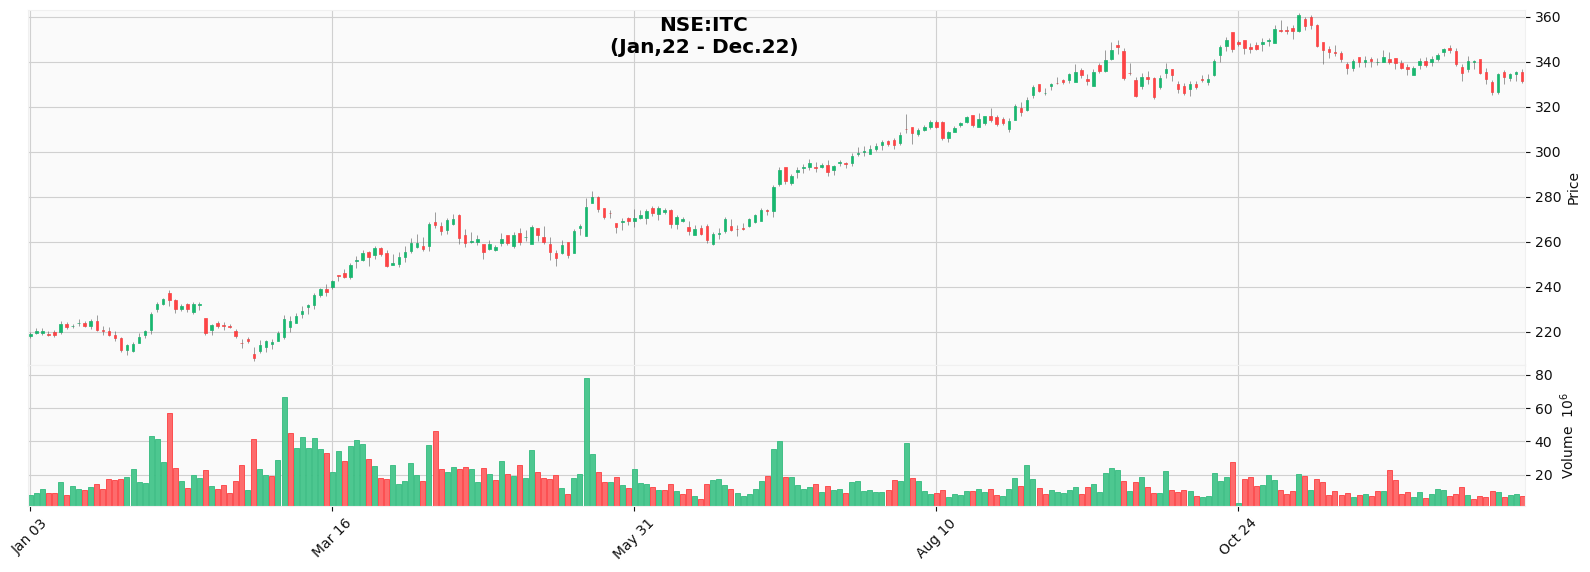

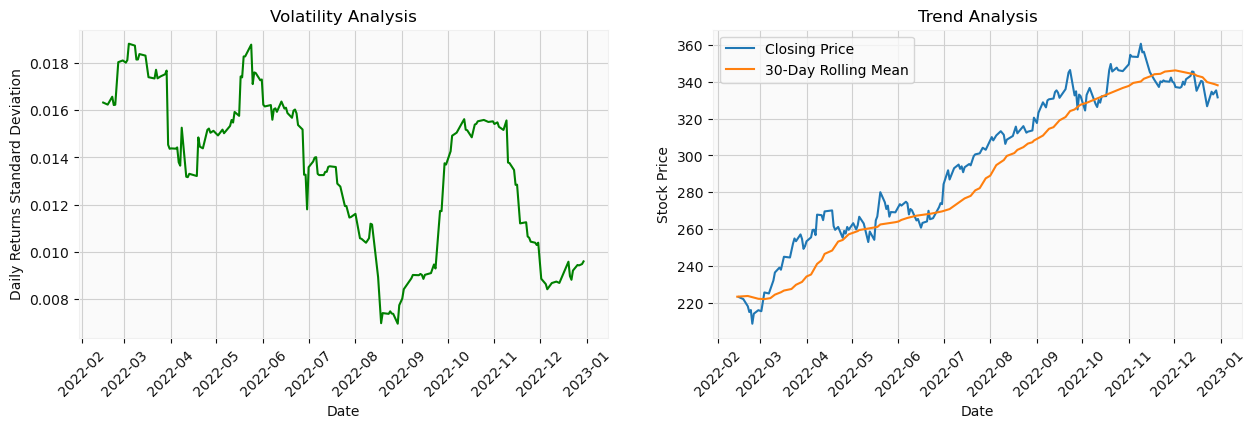



# Company Name -> IndusInd Bank Ltd.	# Industry -> Financial Services	# Ticker -> INDUSINDBK

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:INDUSINDBK


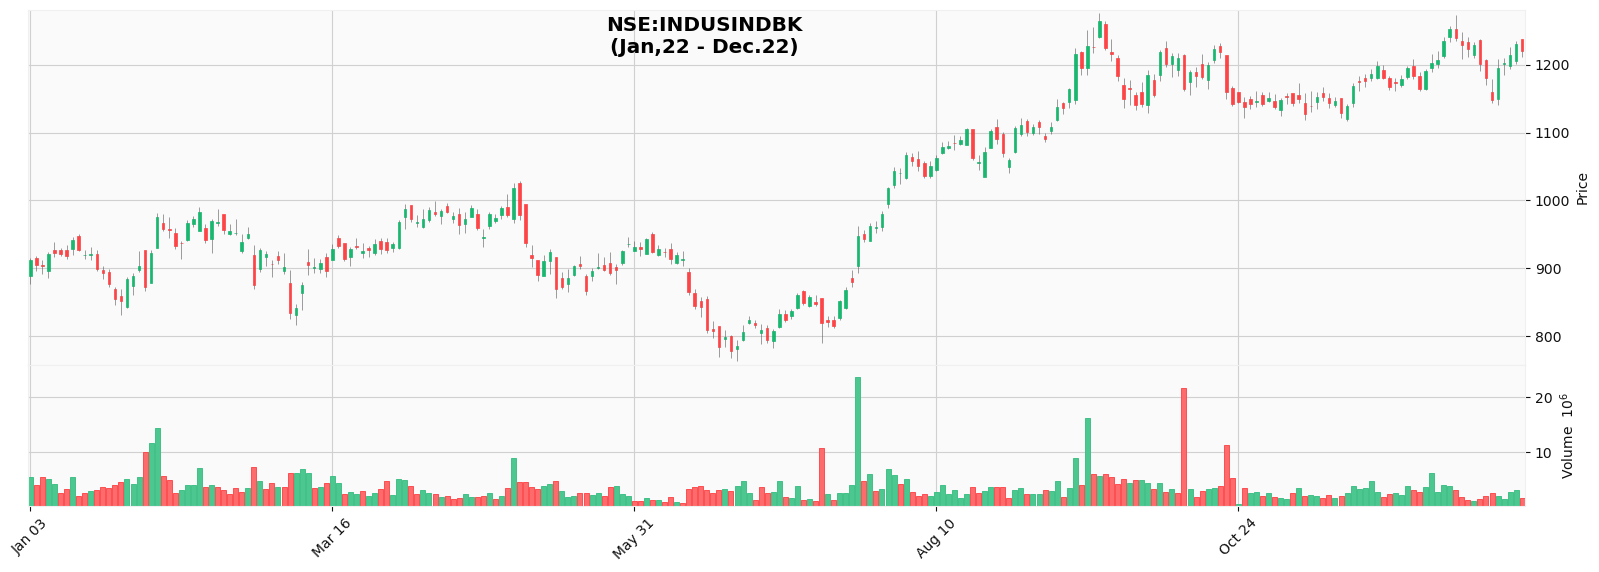

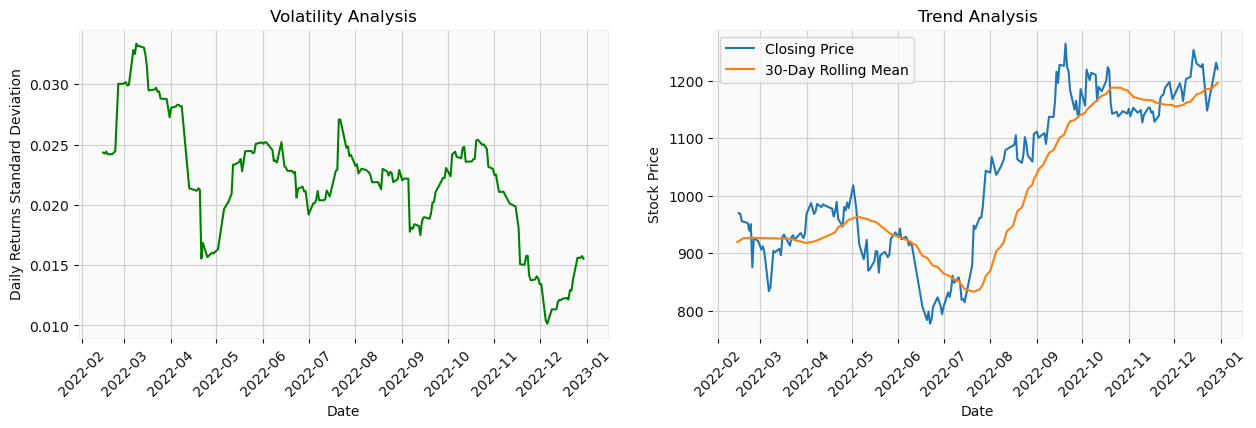



# Company Name -> Infosys Ltd.	# Industry -> Information Technology	# Ticker -> INFY

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:INFY


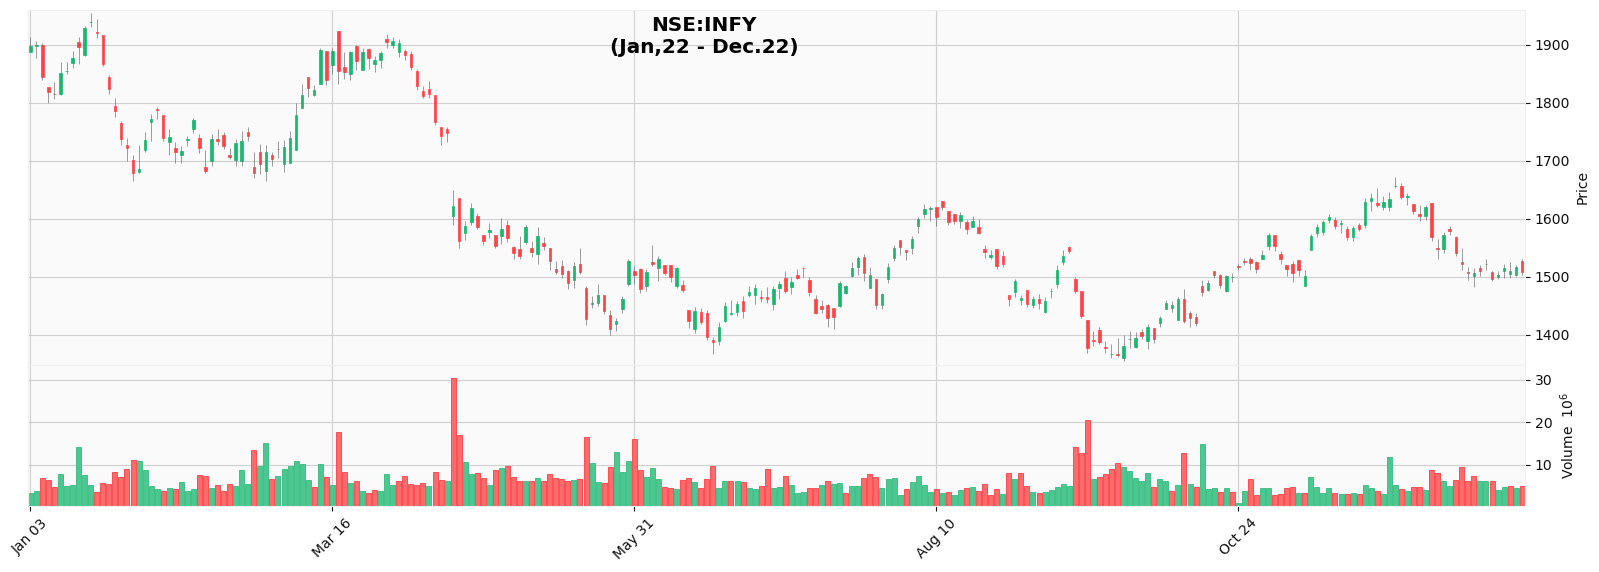

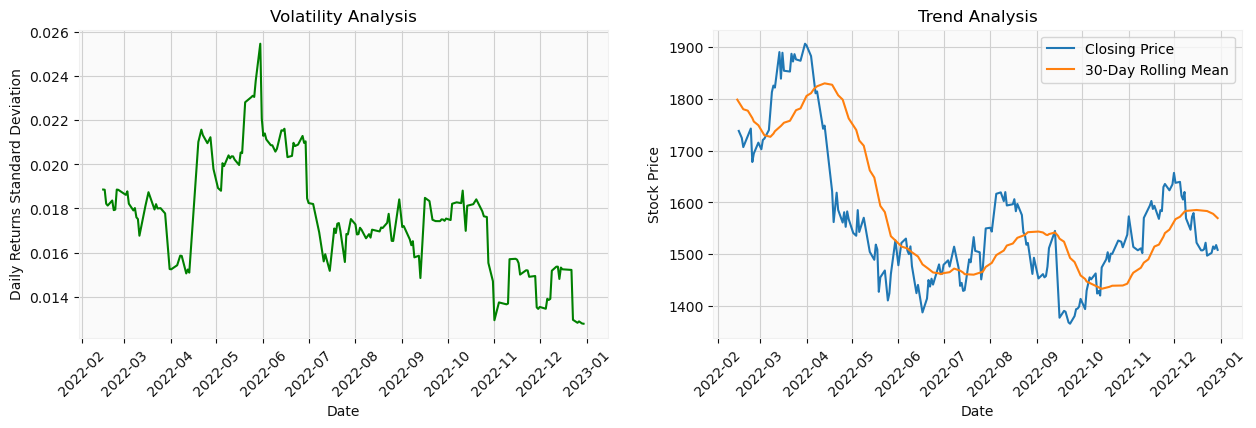



# Company Name -> JSW Steel Ltd.	# Industry -> Metals & Mining	# Ticker -> JSWSTEEL

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:JSWSTEEL


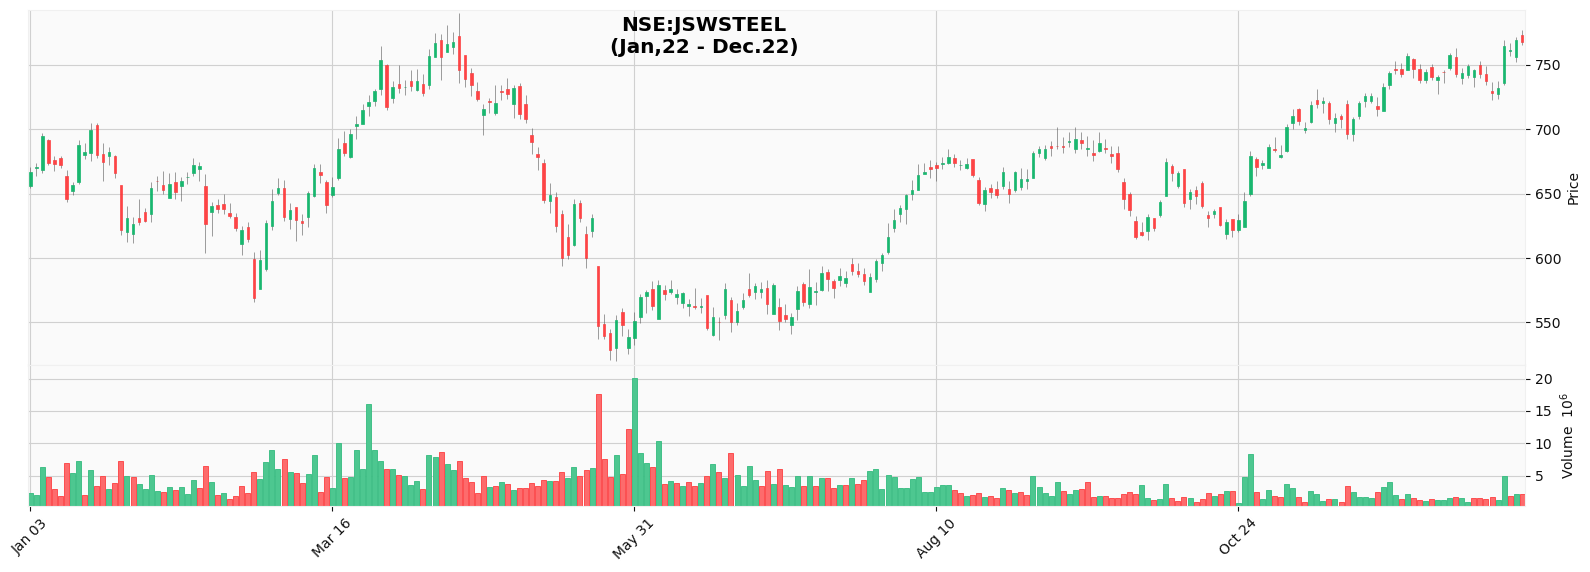

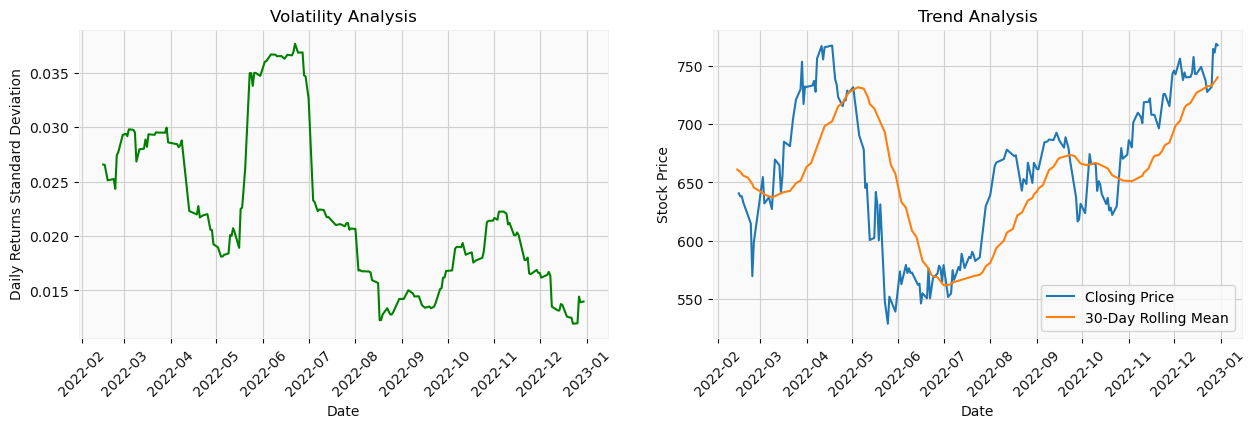



# Company Name -> Kotak Mahindra Bank Ltd.	# Industry -> Financial Services	# Ticker -> KOTAKBANK

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:KOTAKBANK


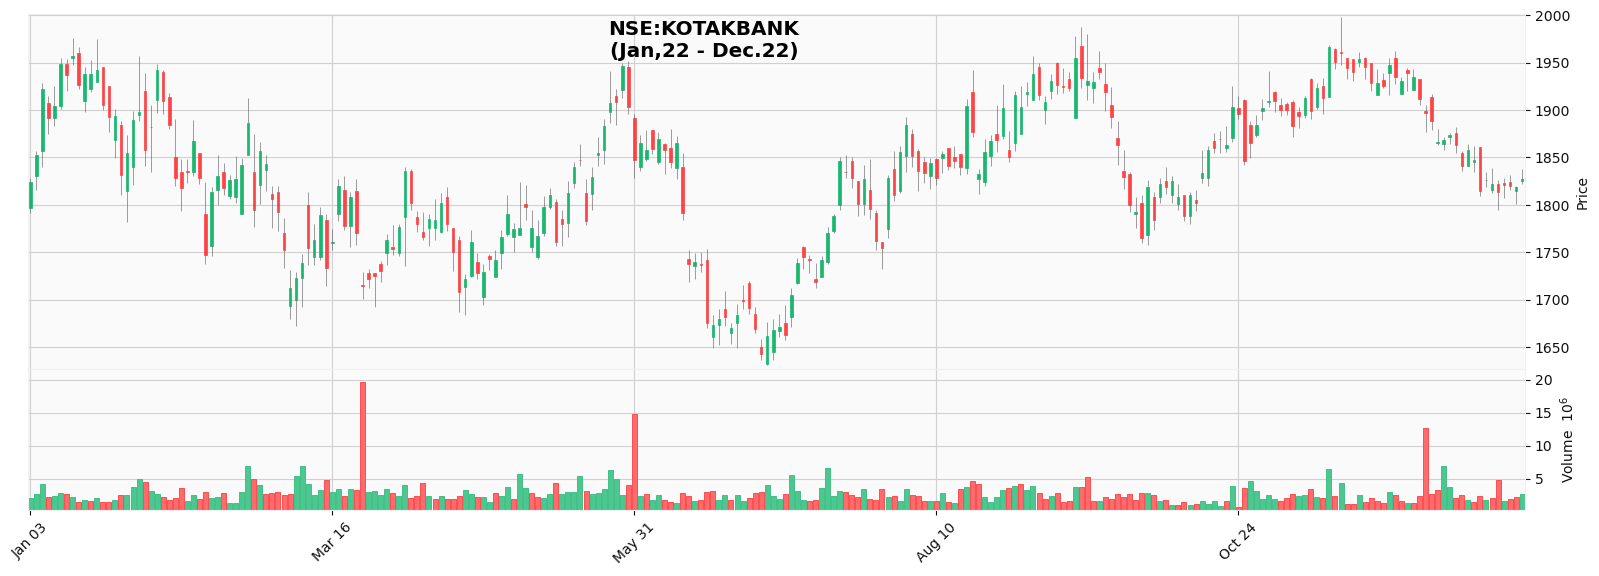

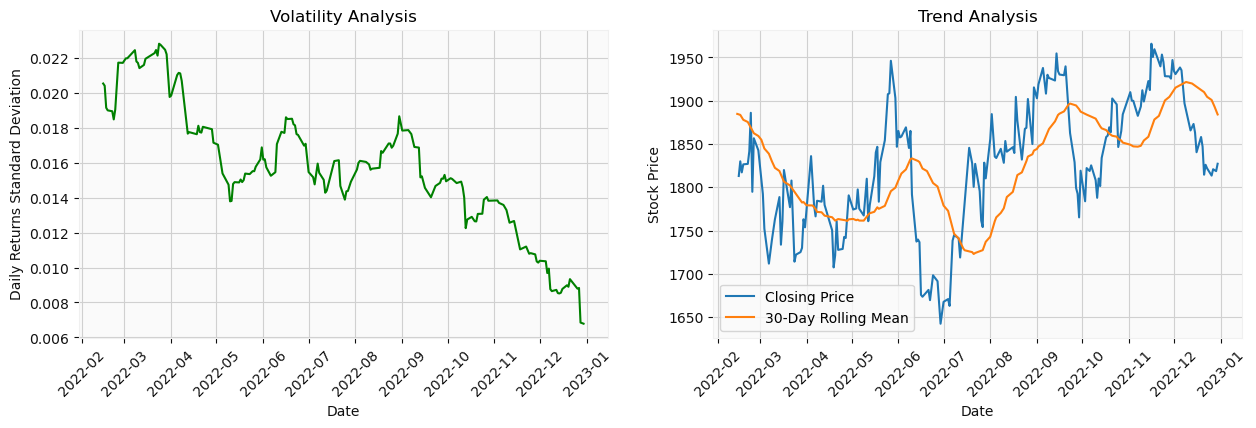



# Company Name -> Larsen & Toubro Ltd.	# Industry -> Construction	# Ticker -> LT

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:LT


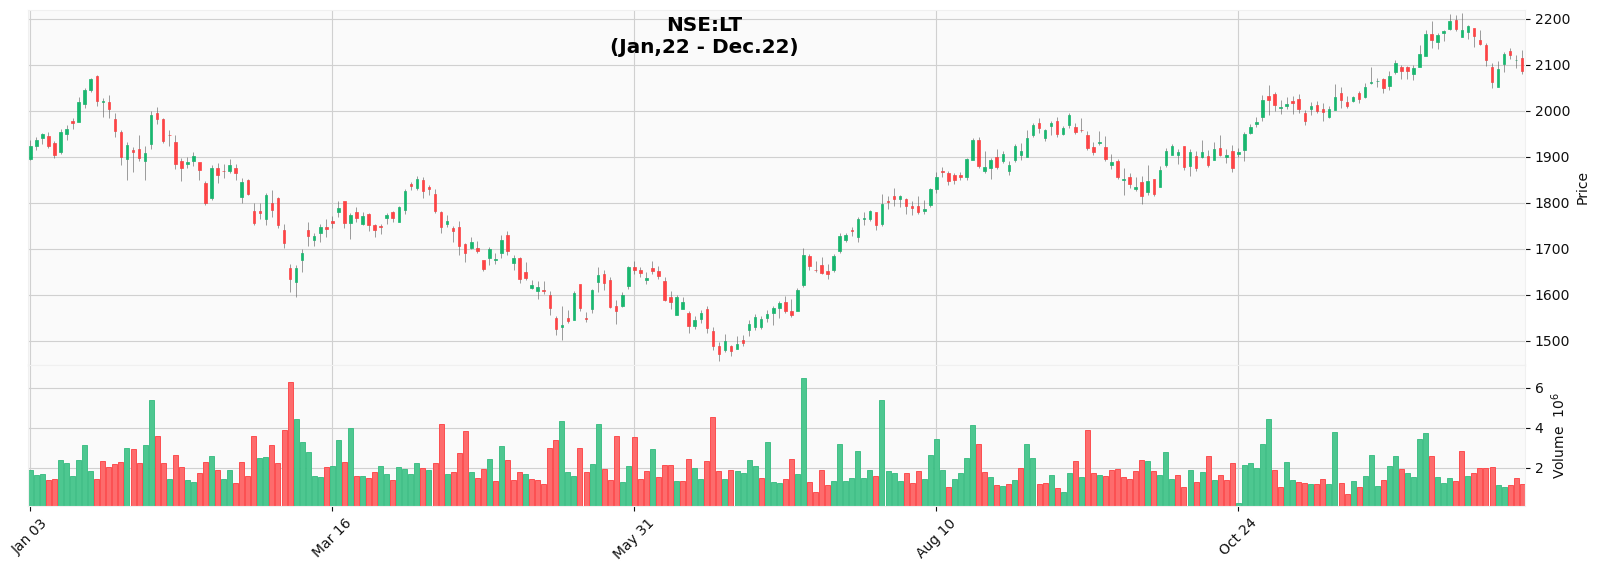

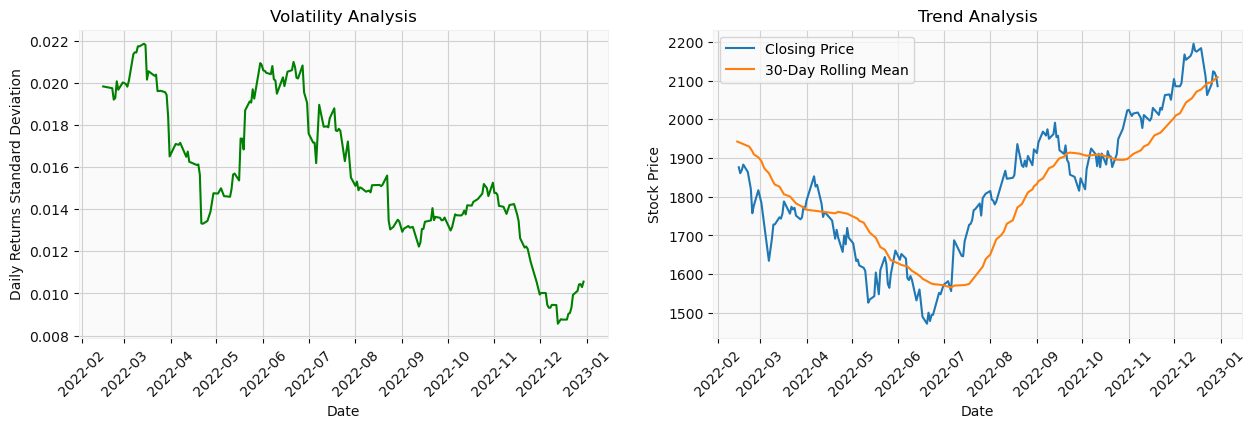



# Company Name -> Mahindra & Mahindra Ltd.	# Industry -> Automobile and Auto Components	# Ticker -> M&M

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:M&M


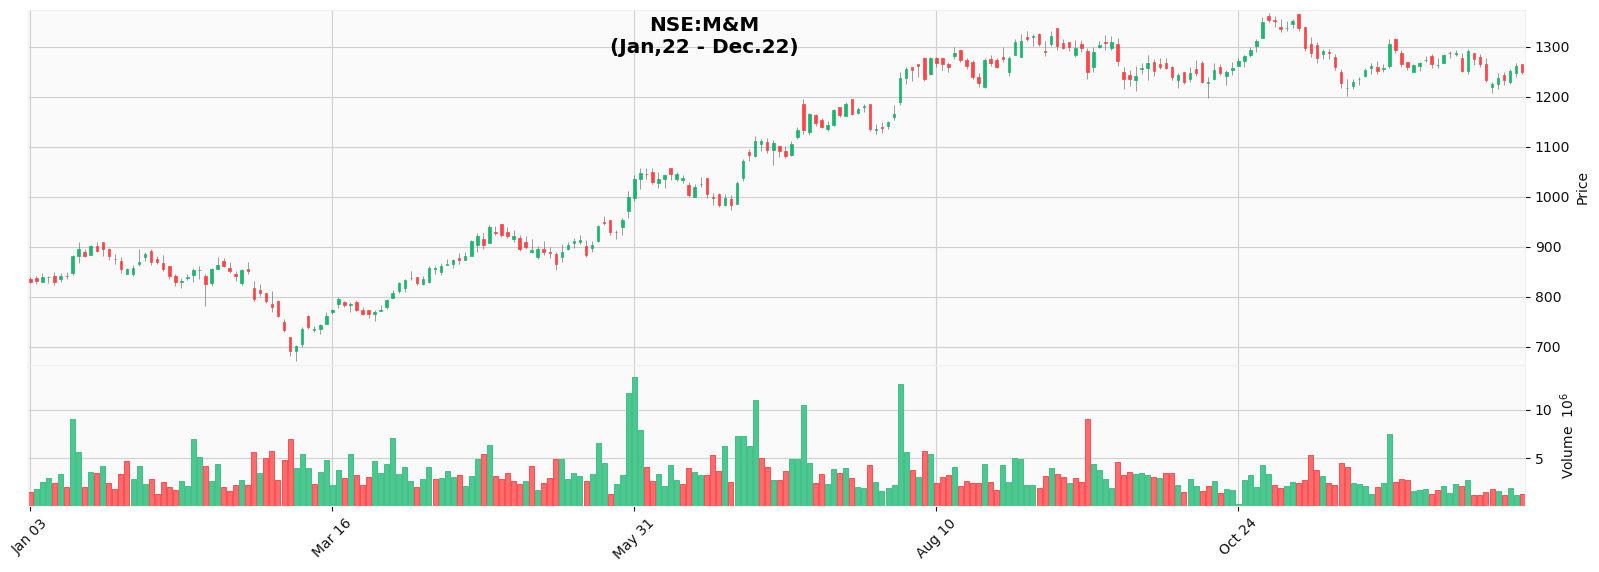

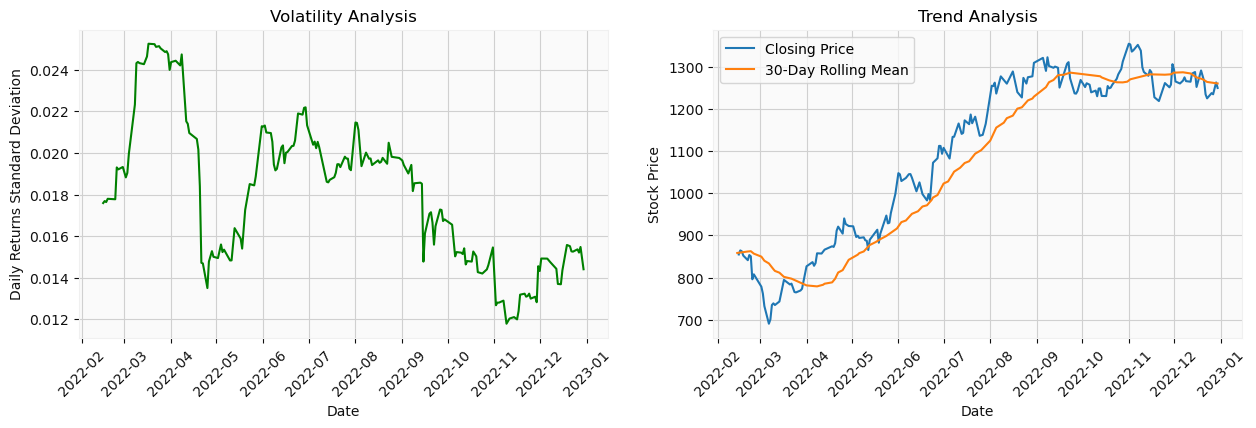



# Company Name -> Maruti Suzuki India Ltd.	# Industry -> Automobile and Auto Components	# Ticker -> MARUTI

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:MARUTI


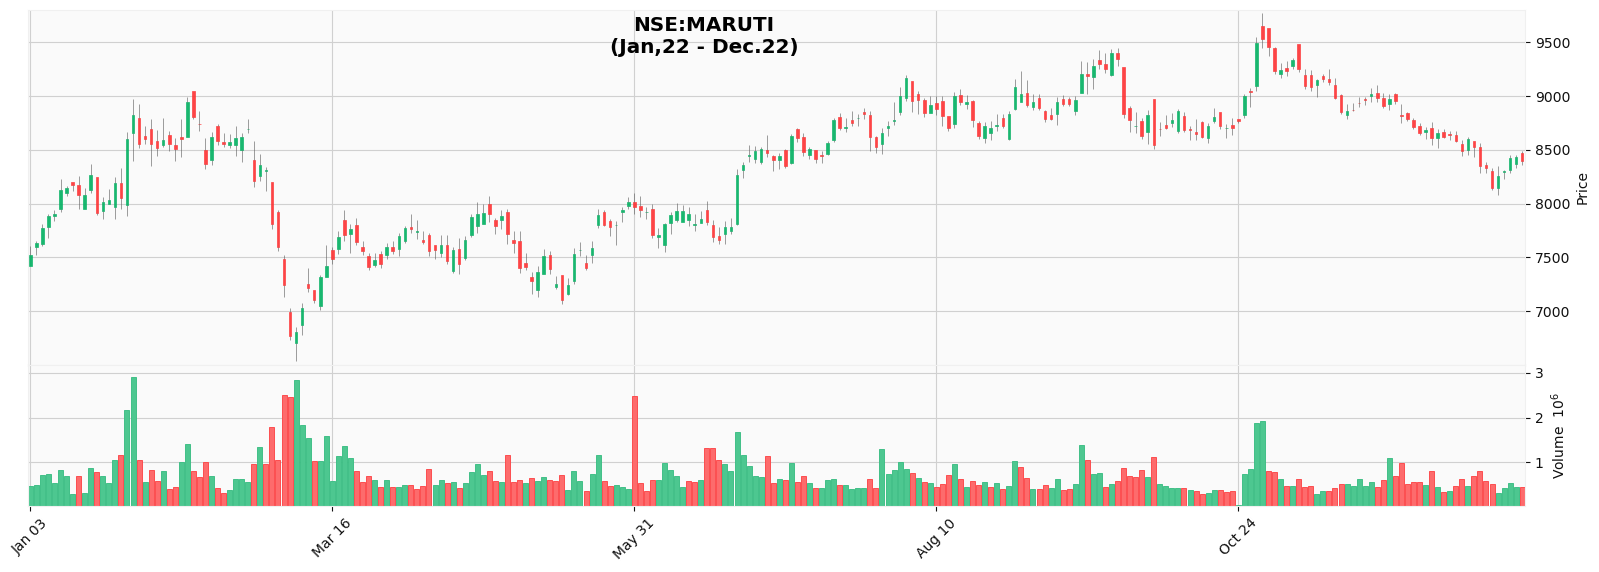

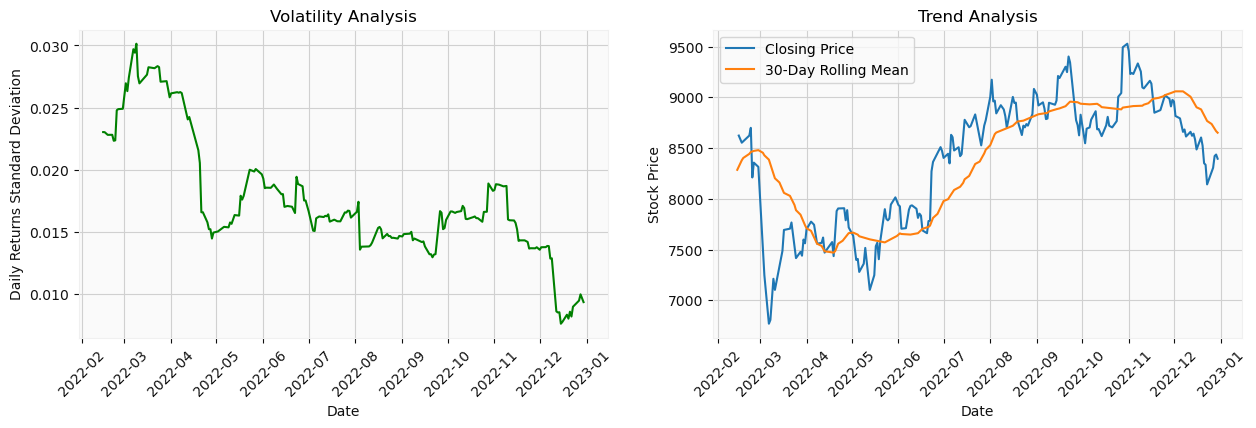



# Company Name -> NTPC Ltd.	# Industry -> Power	# Ticker -> NTPC

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:NTPC


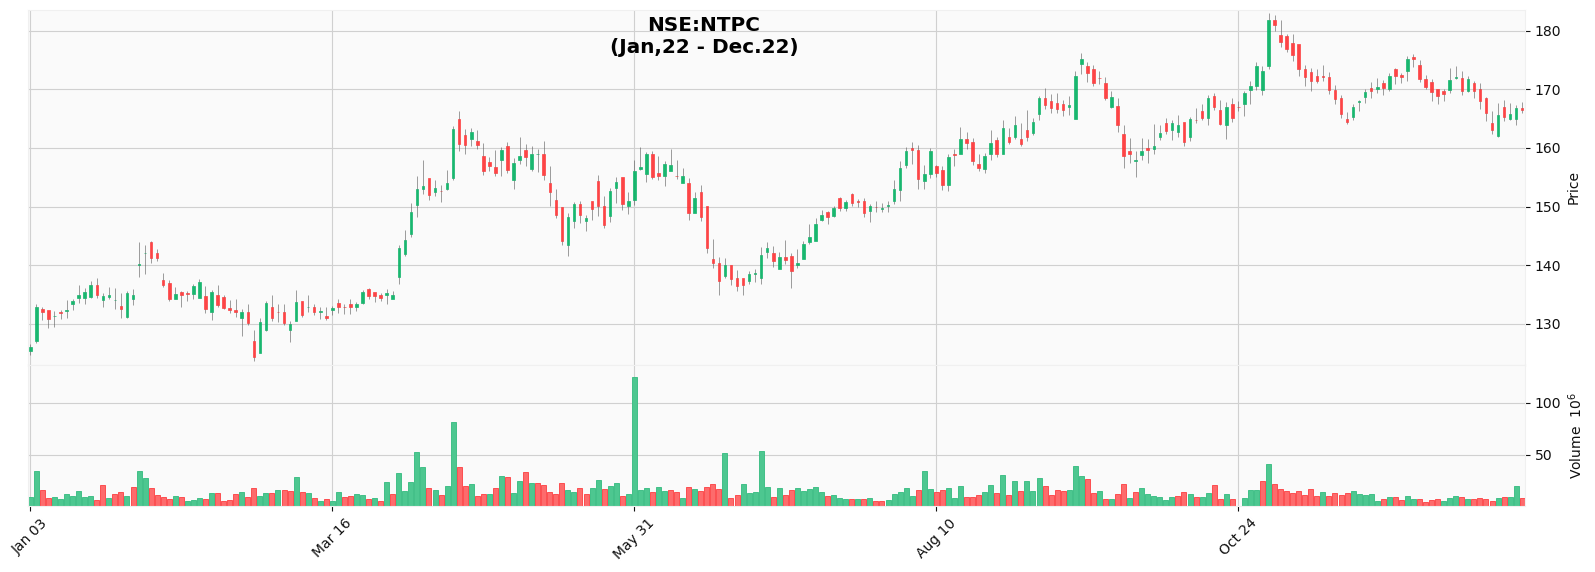

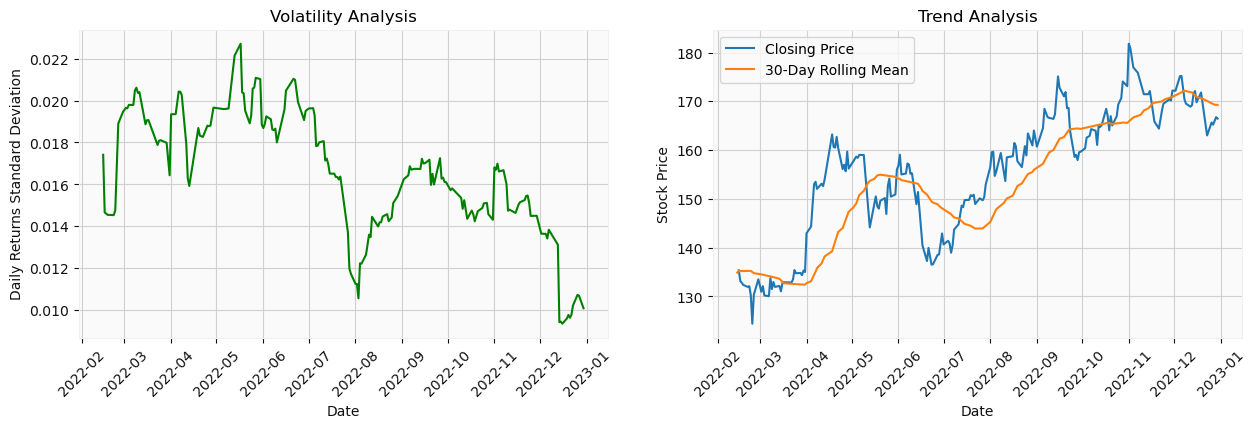



# Company Name -> Nestle India Ltd.	# Industry -> Fast Moving Consumer Goods	# Ticker -> NESTLEIND

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:NESTLEIND


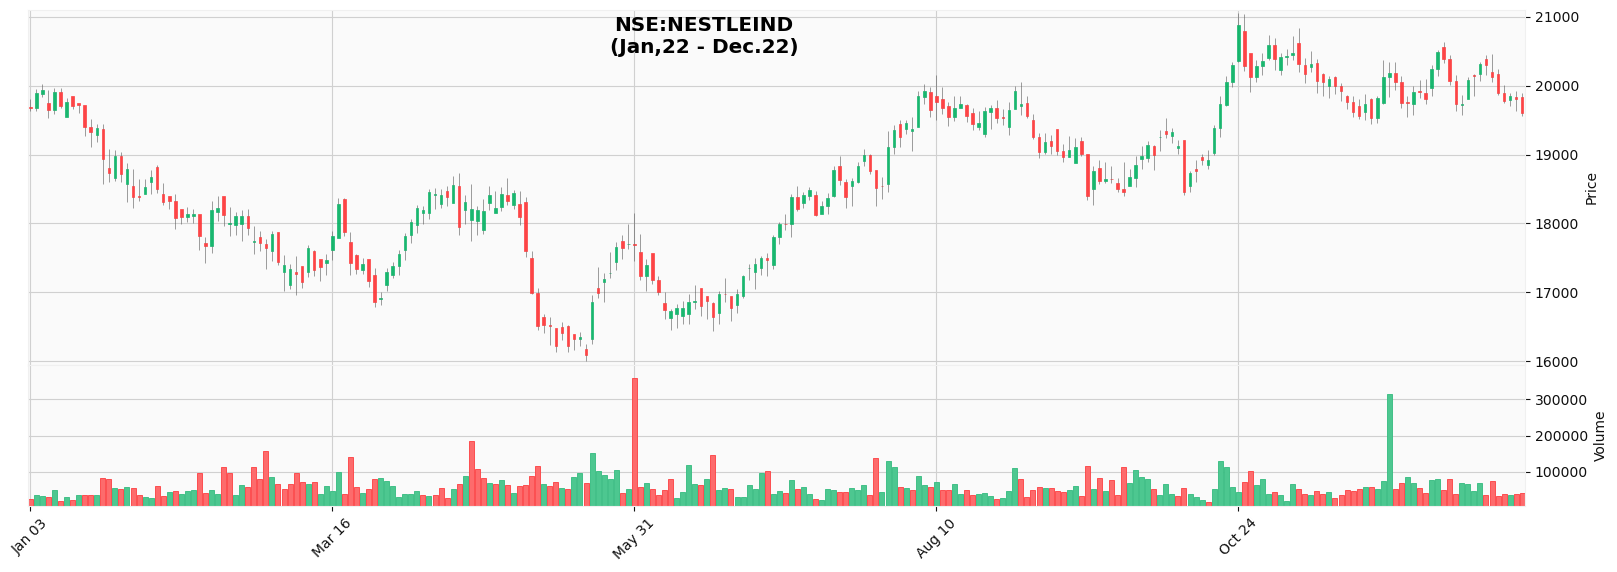

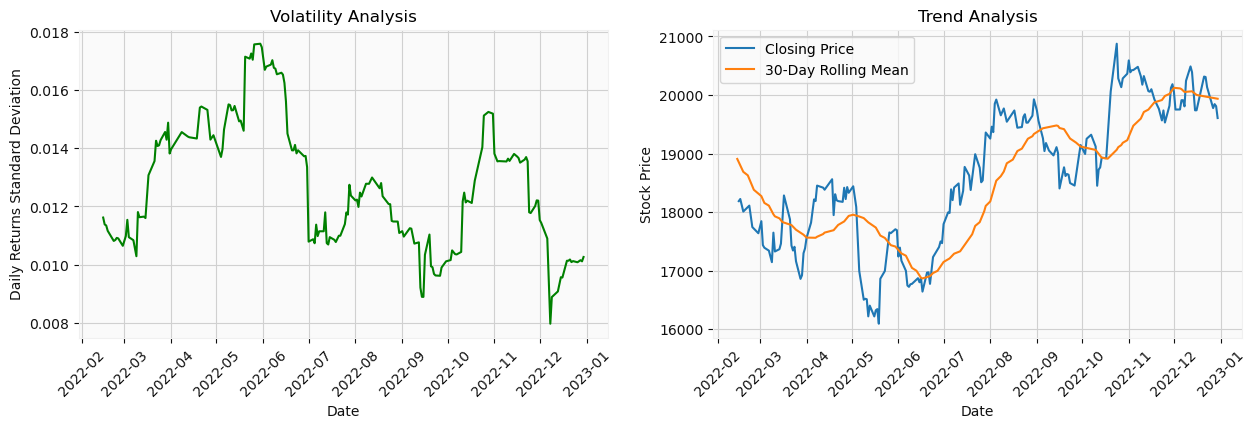



# Company Name -> Oil & Natural Gas Corporation Ltd.	# Industry -> Oil Gas & Consumable Fuels	# Ticker -> ONGC

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:ONGC


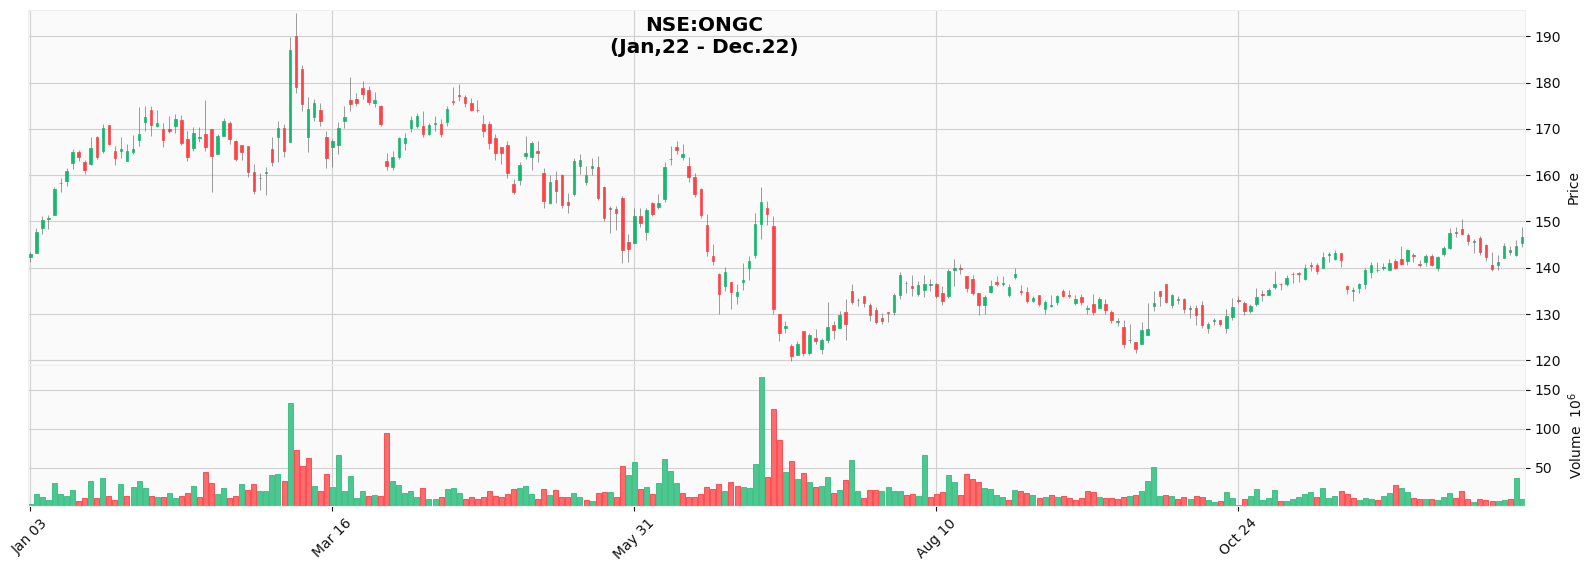

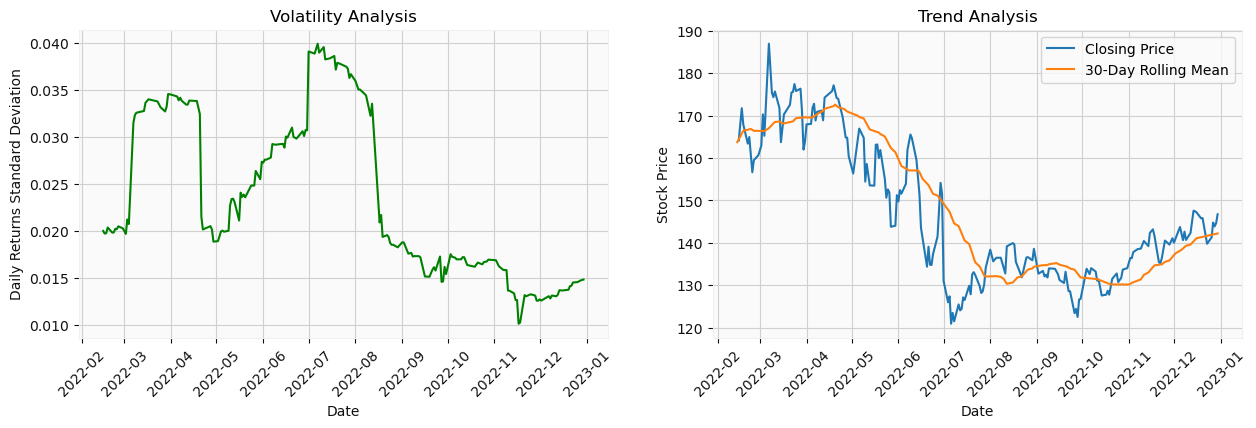



# Company Name -> Power Grid Corporation of India Ltd.	# Industry -> Power	# Ticker -> POWERGRID

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:POWERGRID


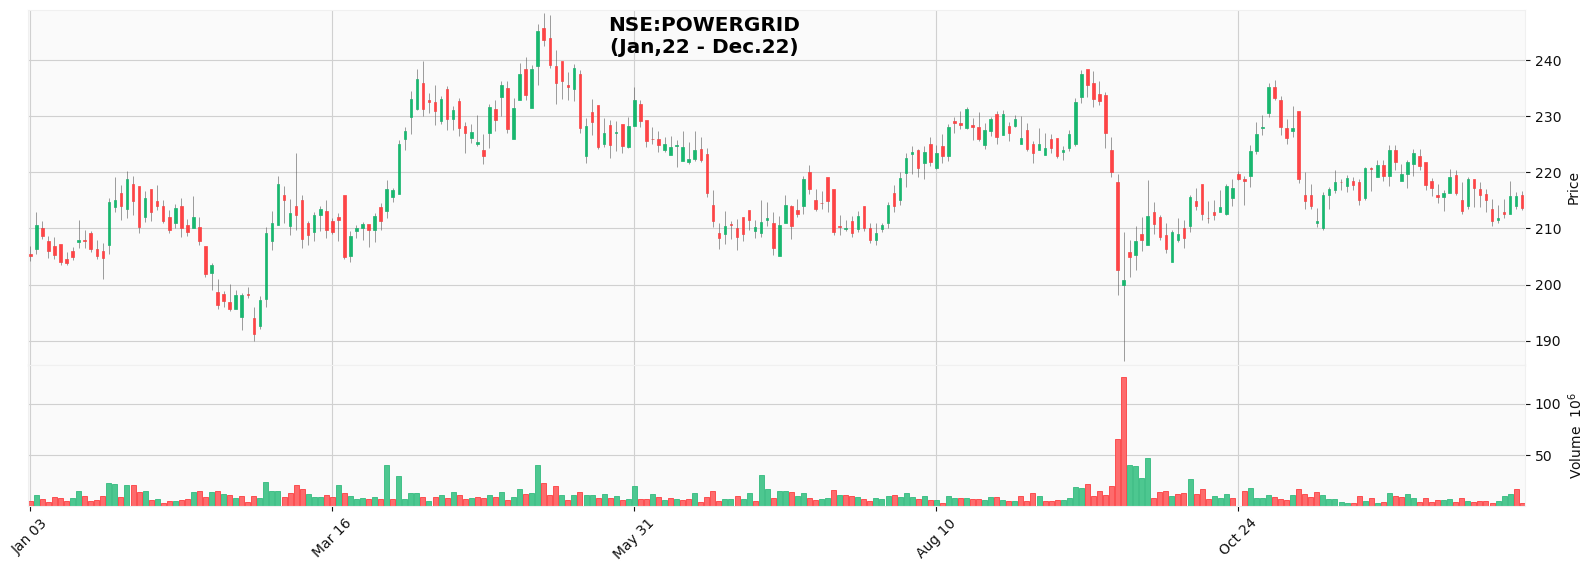

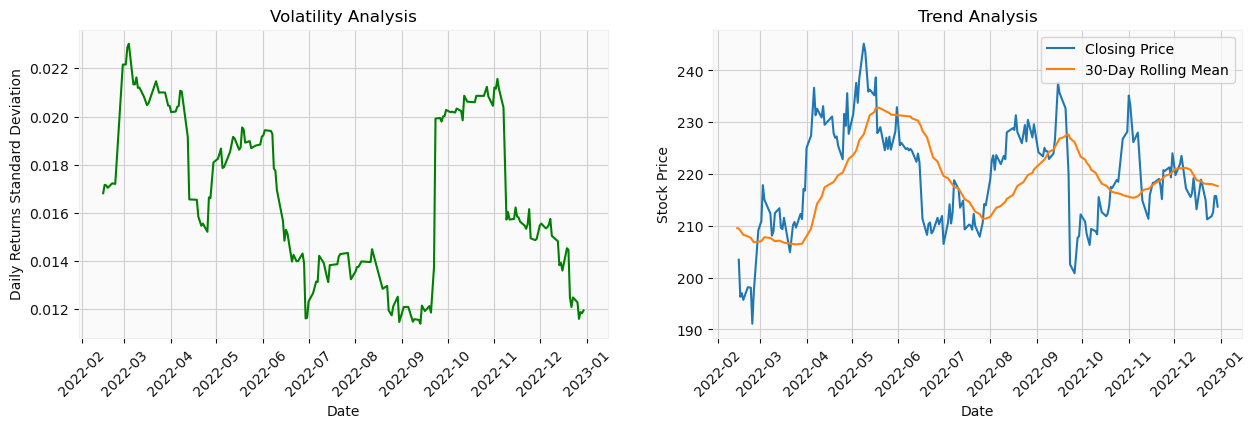



# Company Name -> Reliance Industries Ltd.	# Industry -> Oil Gas & Consumable Fuels	# Ticker -> RELIANCE

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:RELIANCE


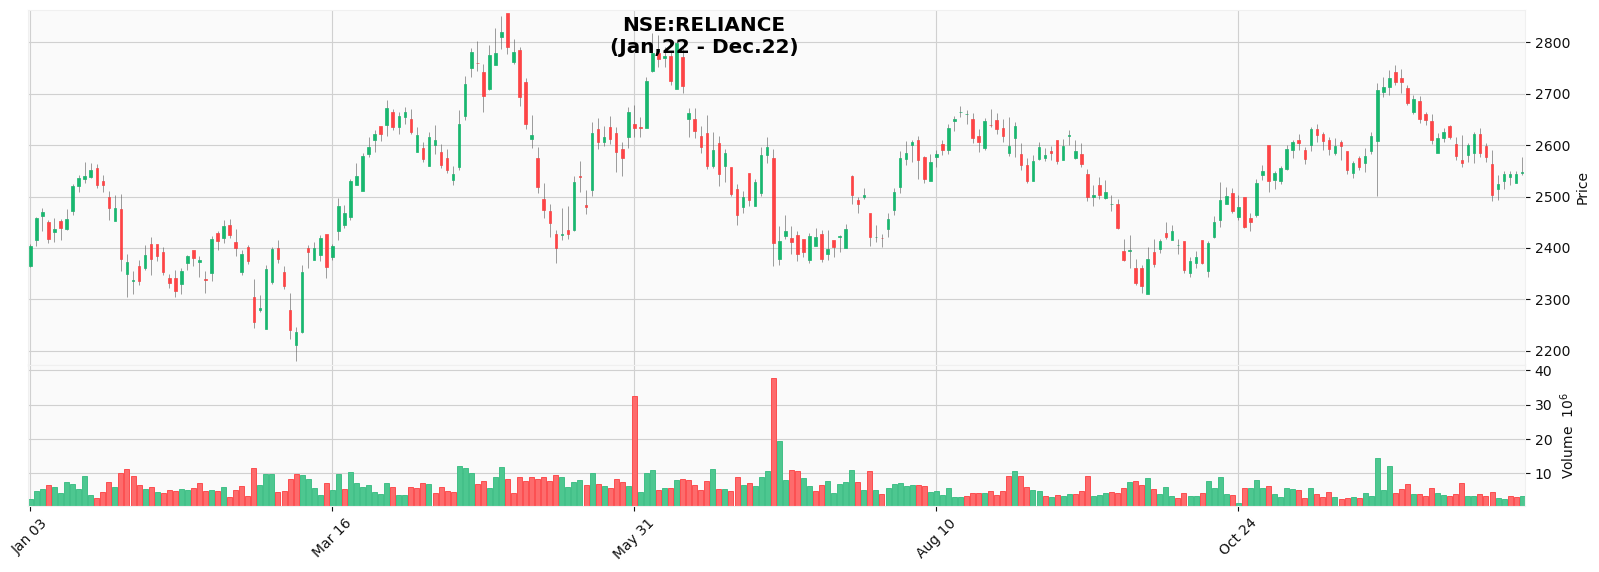

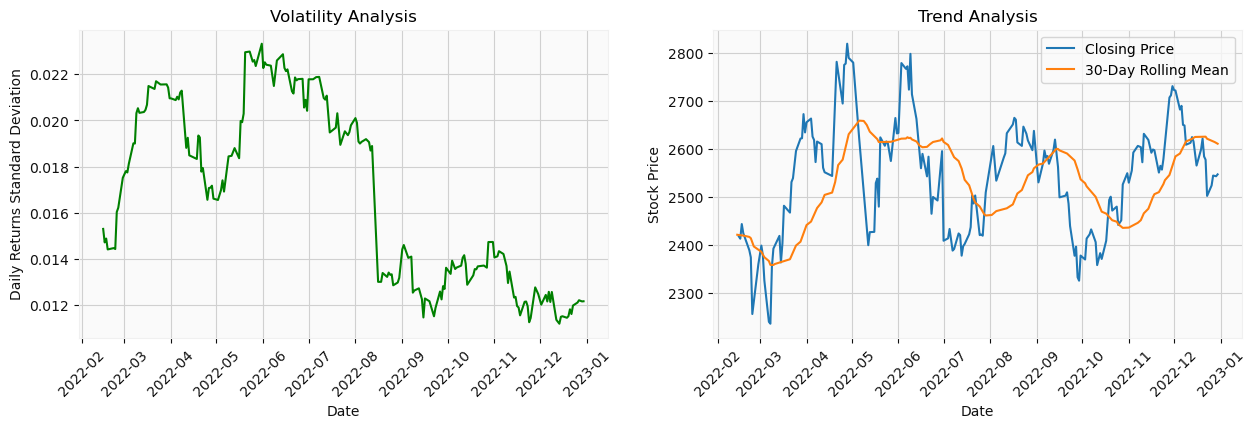



# Company Name -> SBI Life Insurance Company Ltd.	# Industry -> Financial Services	# Ticker -> SBILIFE

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:SBILIFE


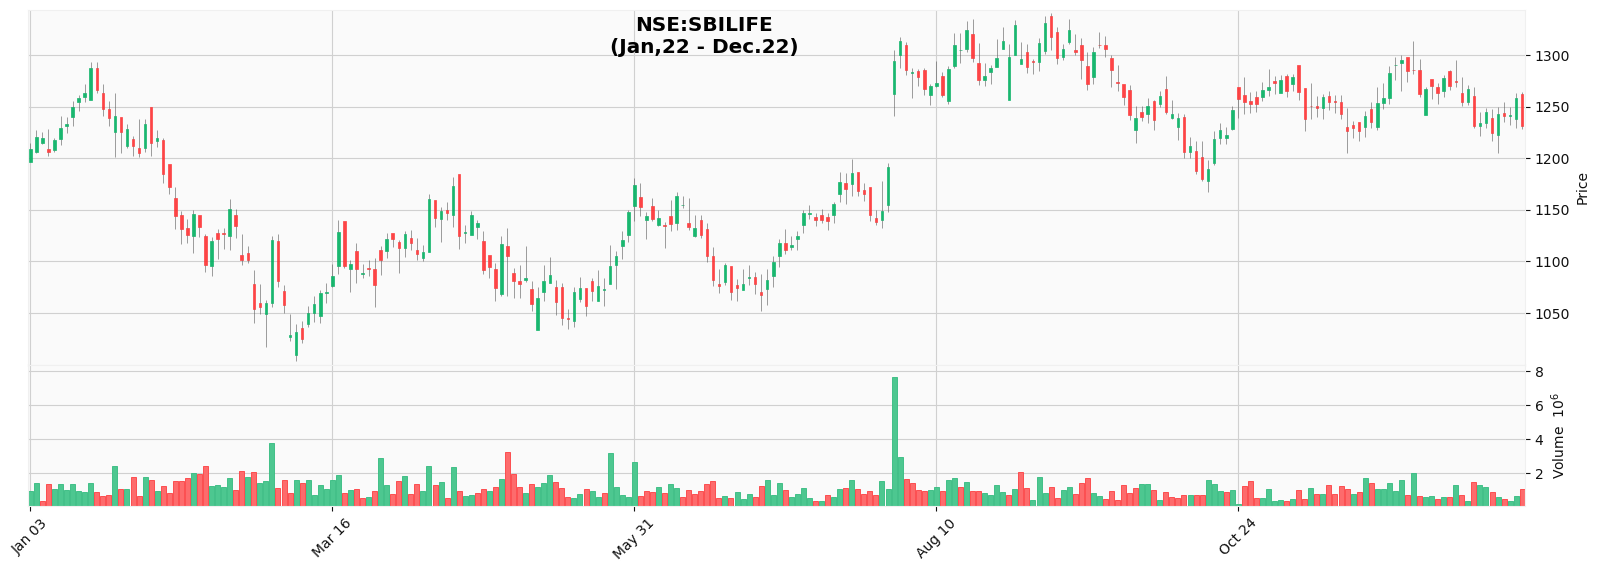

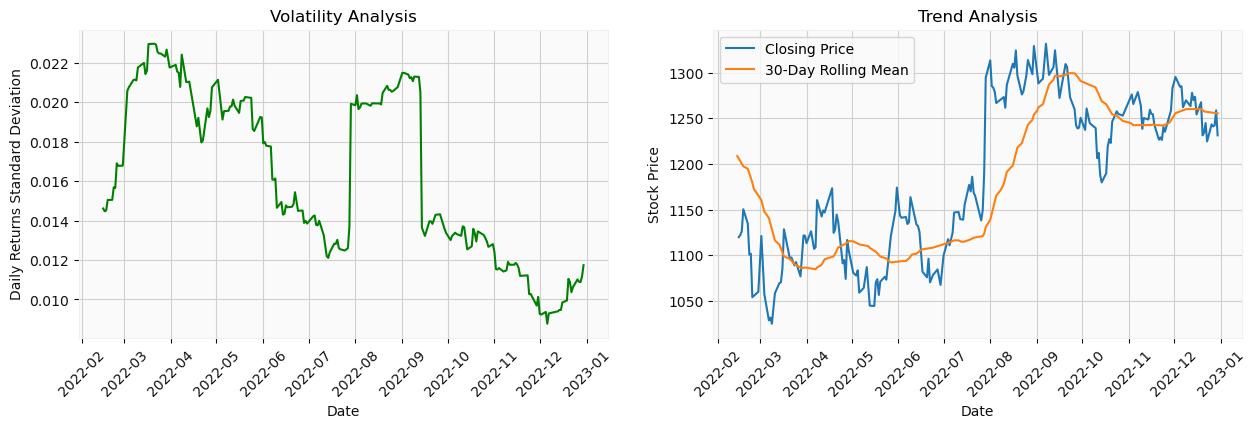



# Company Name -> State Bank of India	# Industry -> Financial Services	# Ticker -> SBIN

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:SBIN


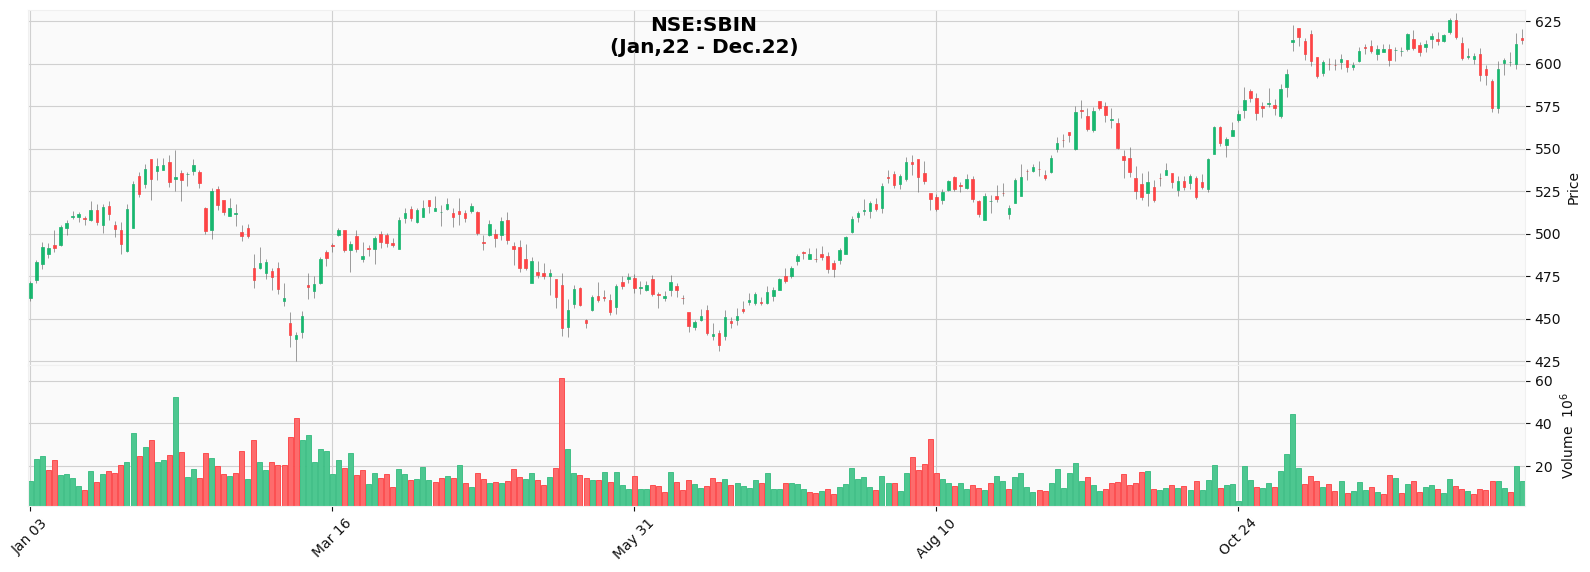

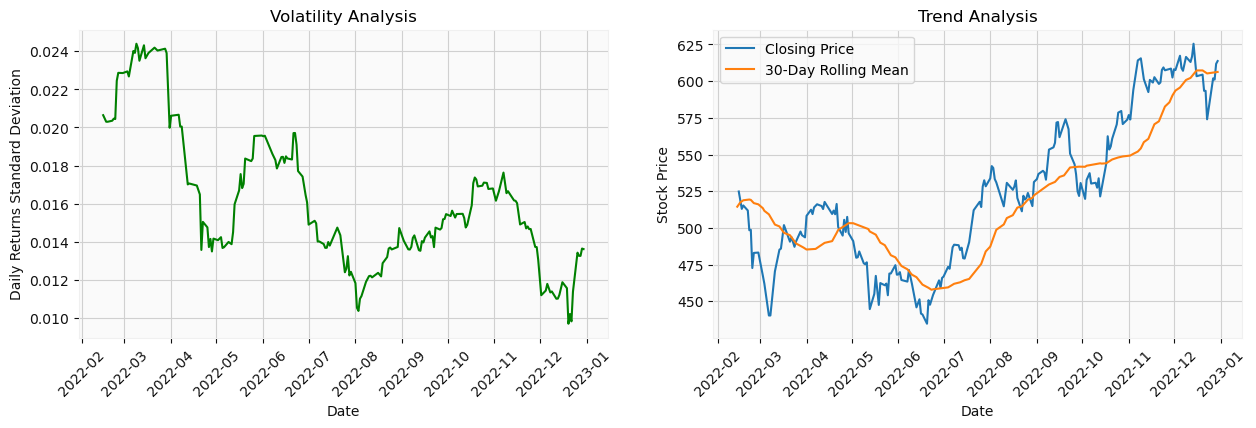



# Company Name -> Sun Pharmaceutical Industries Ltd.	# Industry -> Healthcare	# Ticker -> SUNPHARMA

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:SUNPHARMA


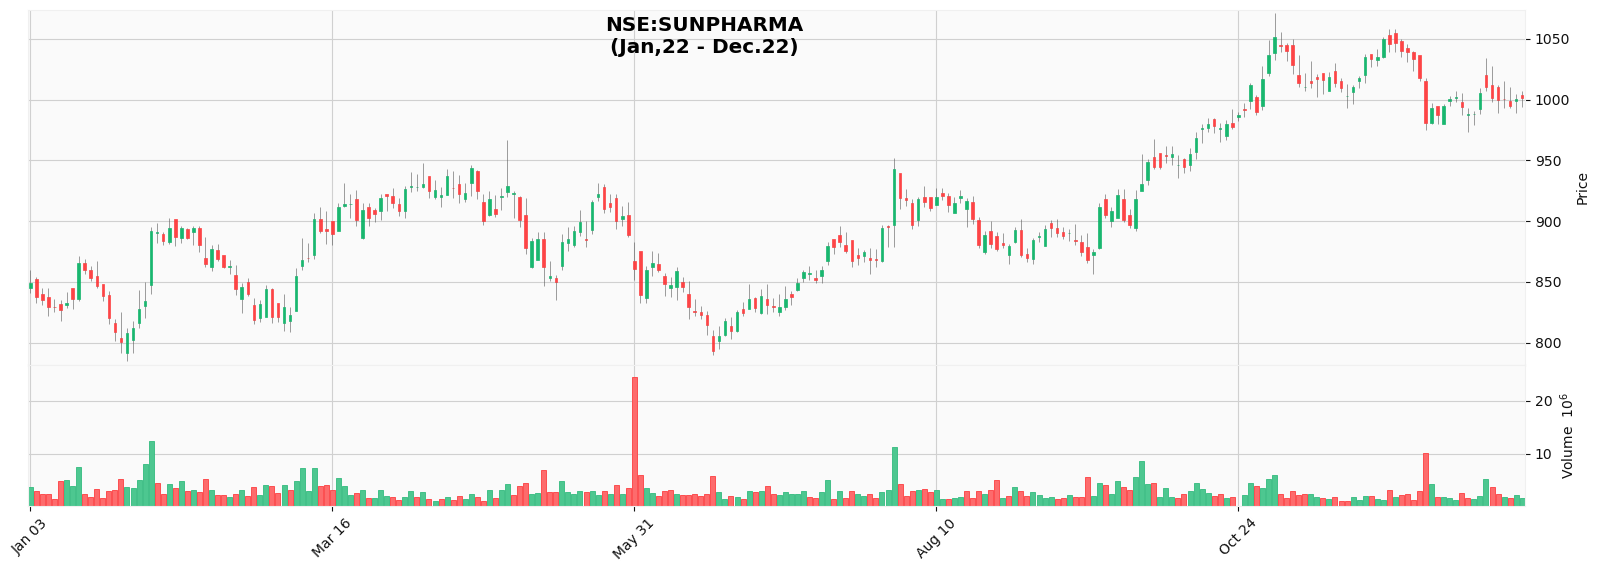

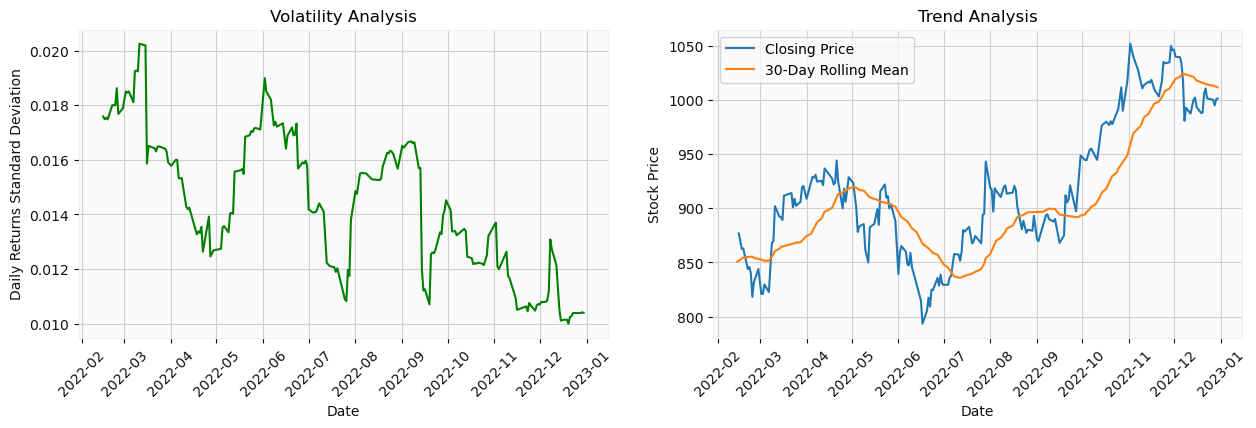



# Company Name -> Tata Consultancy Services Ltd.	# Industry -> Information Technology	# Ticker -> TCS

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:TCS


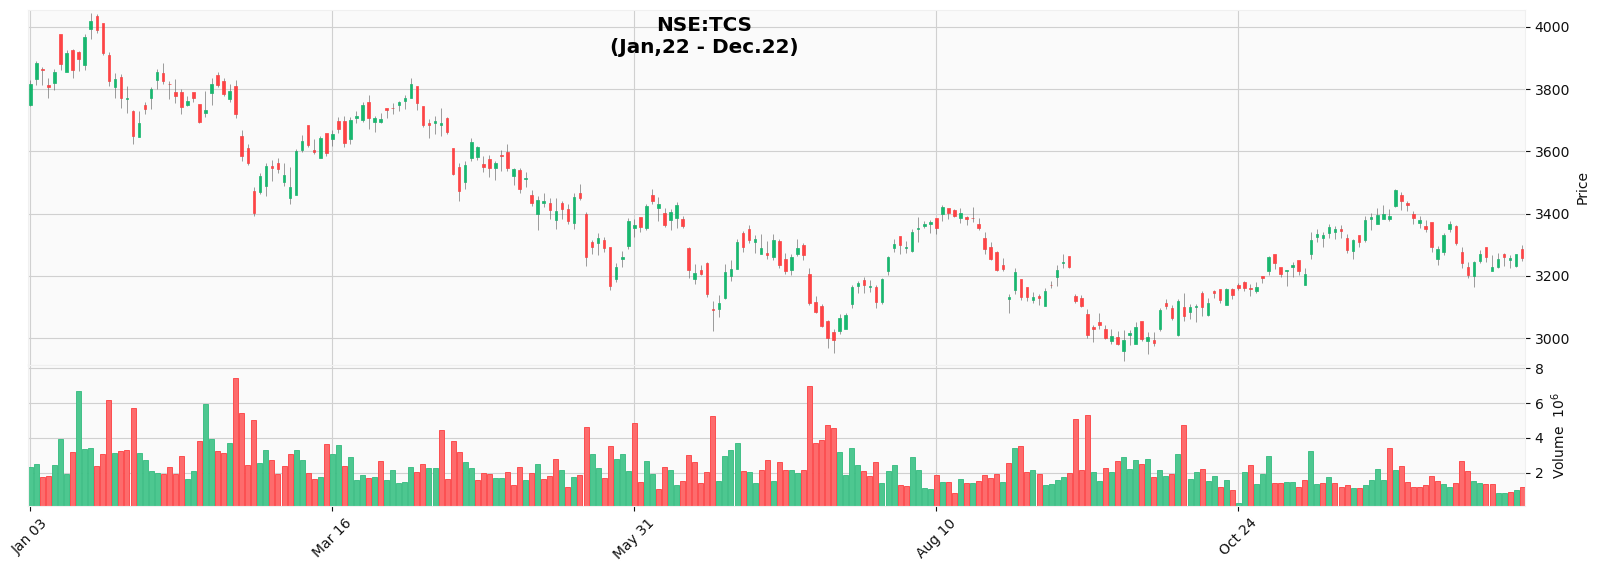

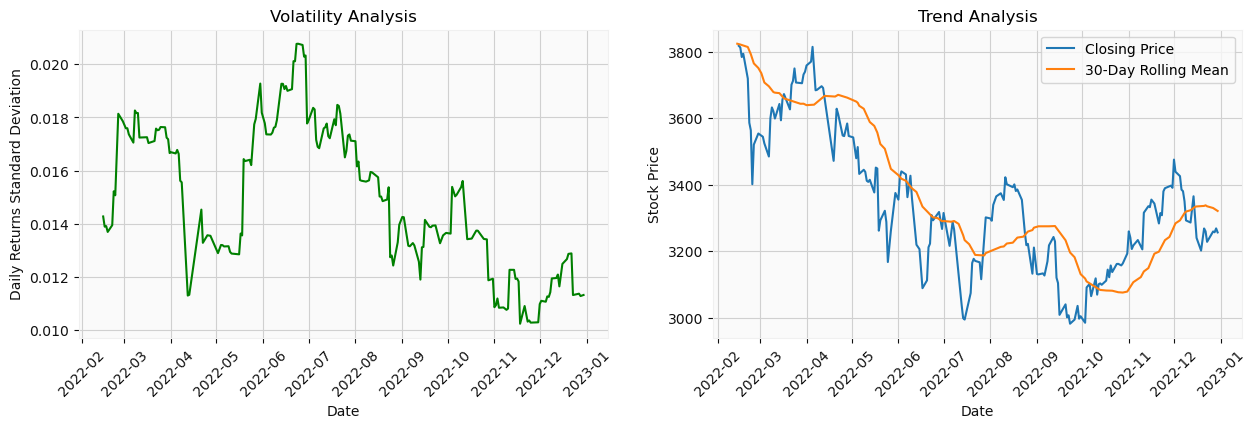



# Company Name -> Tata Consumer Products Ltd.	# Industry -> Fast Moving Consumer Goods	# Ticker -> TATACONSUM

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:TATACONSUM


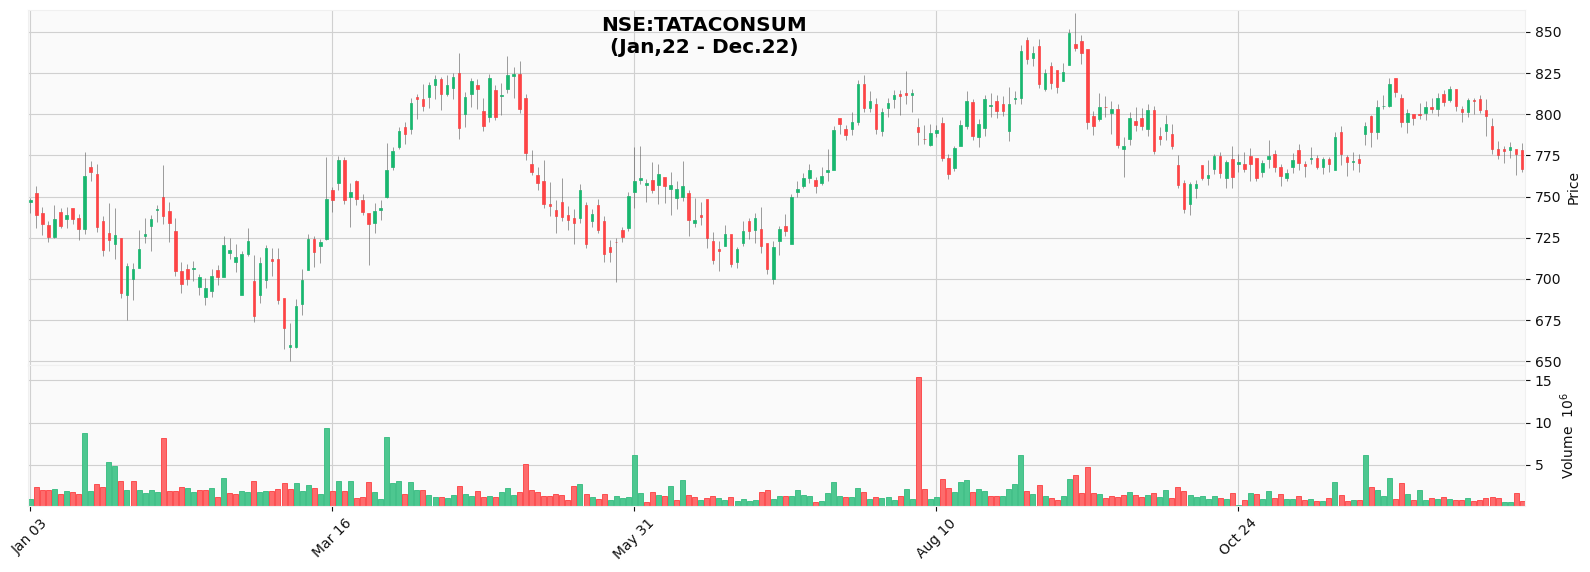

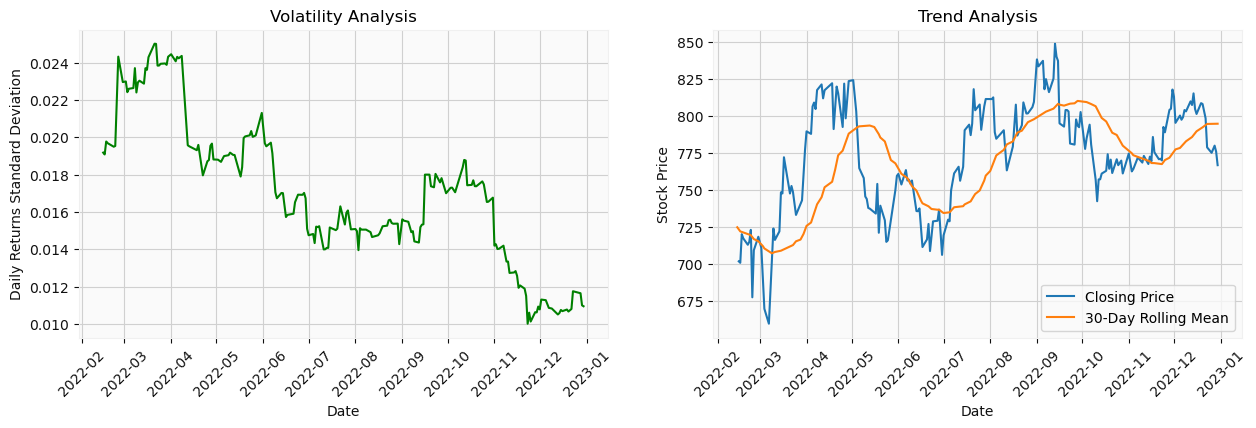



# Company Name -> Tata Motors Ltd.	# Industry -> Automobile and Auto Components	# Ticker -> TATAMOTORS

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:TATAMOTORS


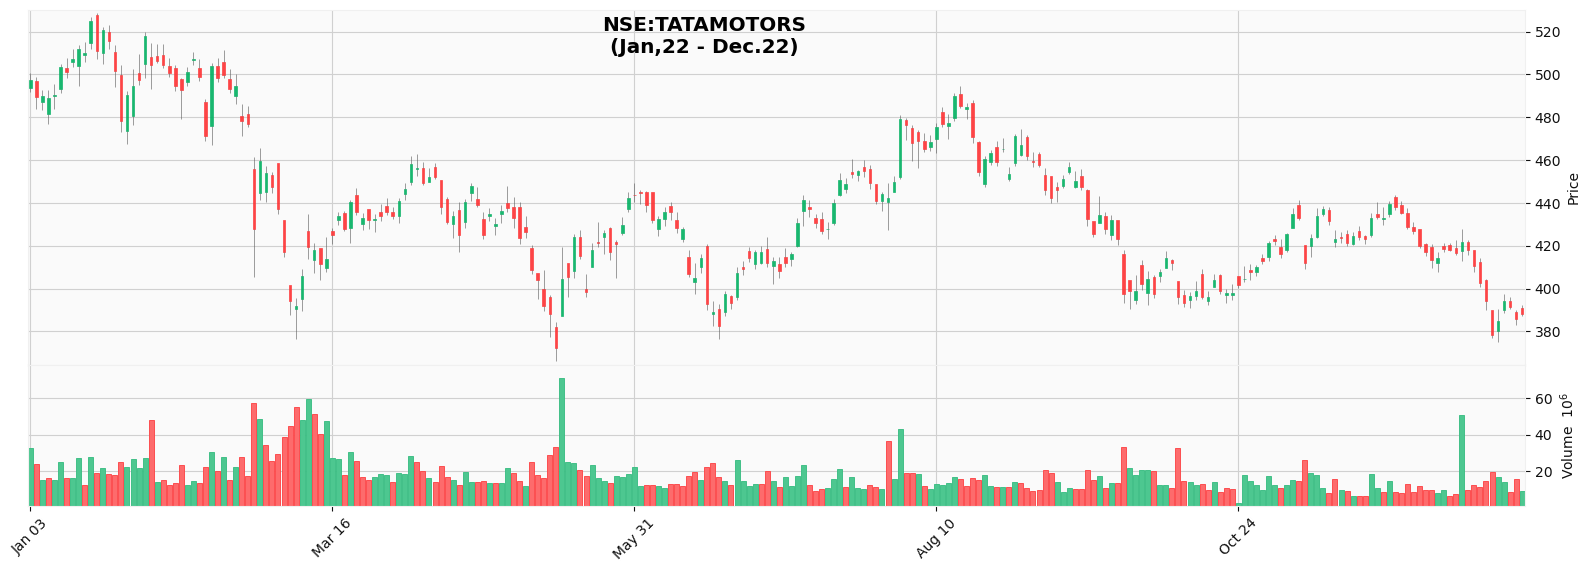

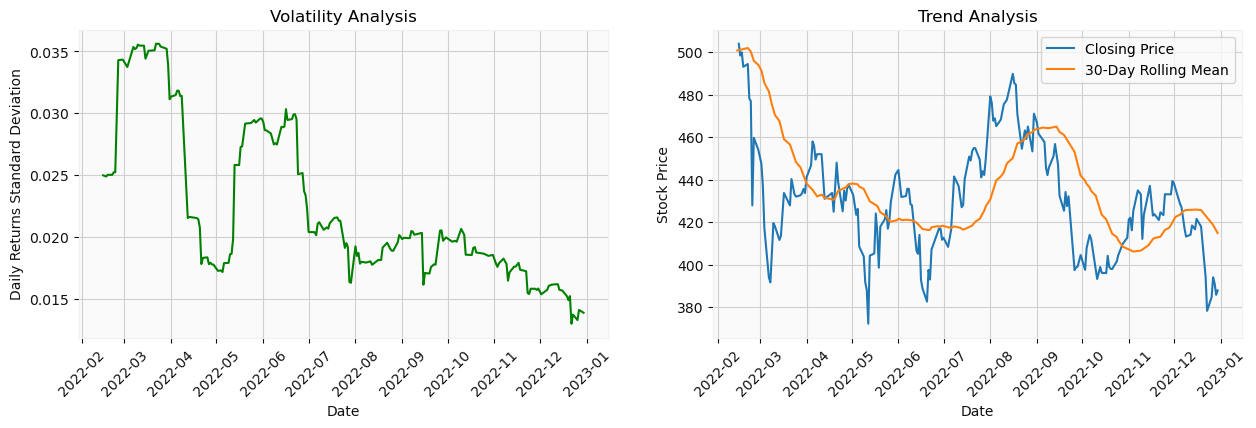



# Company Name -> Tata Steel Ltd.	# Industry -> Metals & Mining	# Ticker -> TATASTEEL

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:TATASTEEL


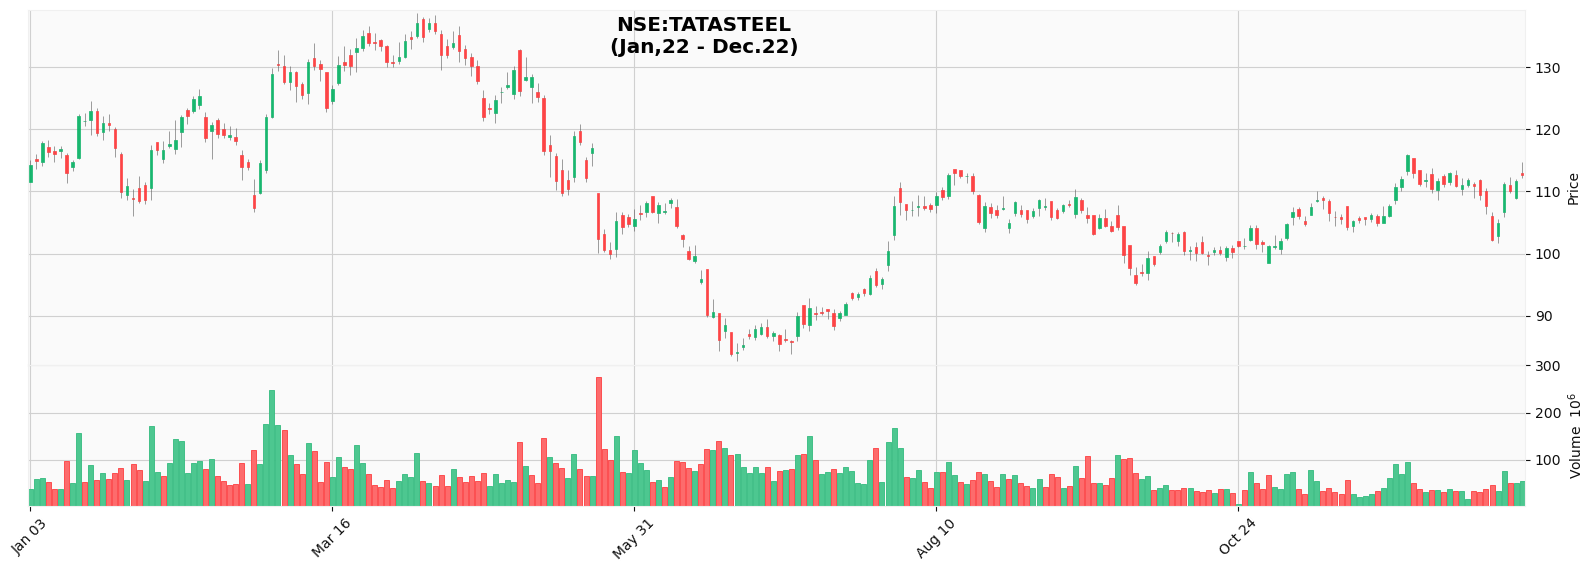

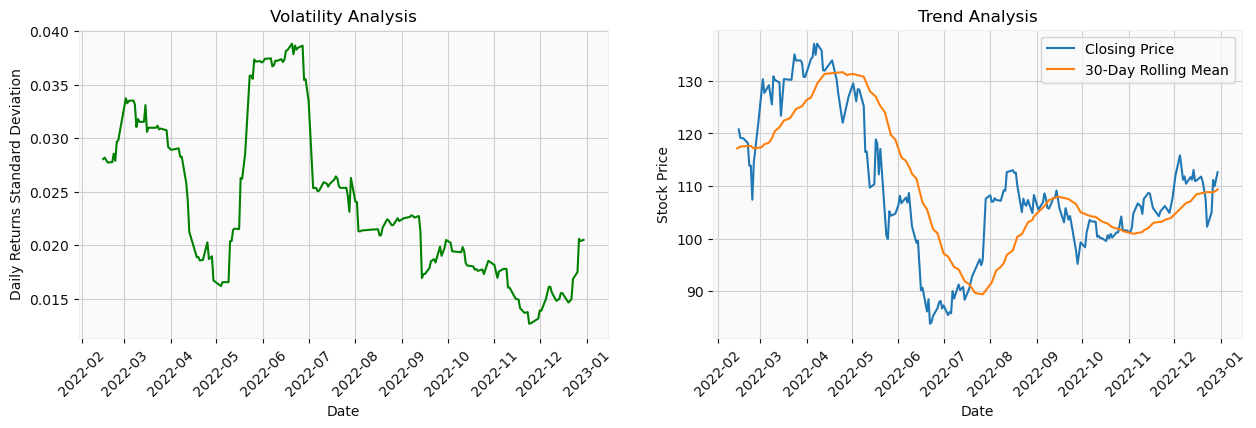



# Company Name -> Tech Mahindra Ltd.	# Industry -> Information Technology	# Ticker -> TECHM

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:TECHM


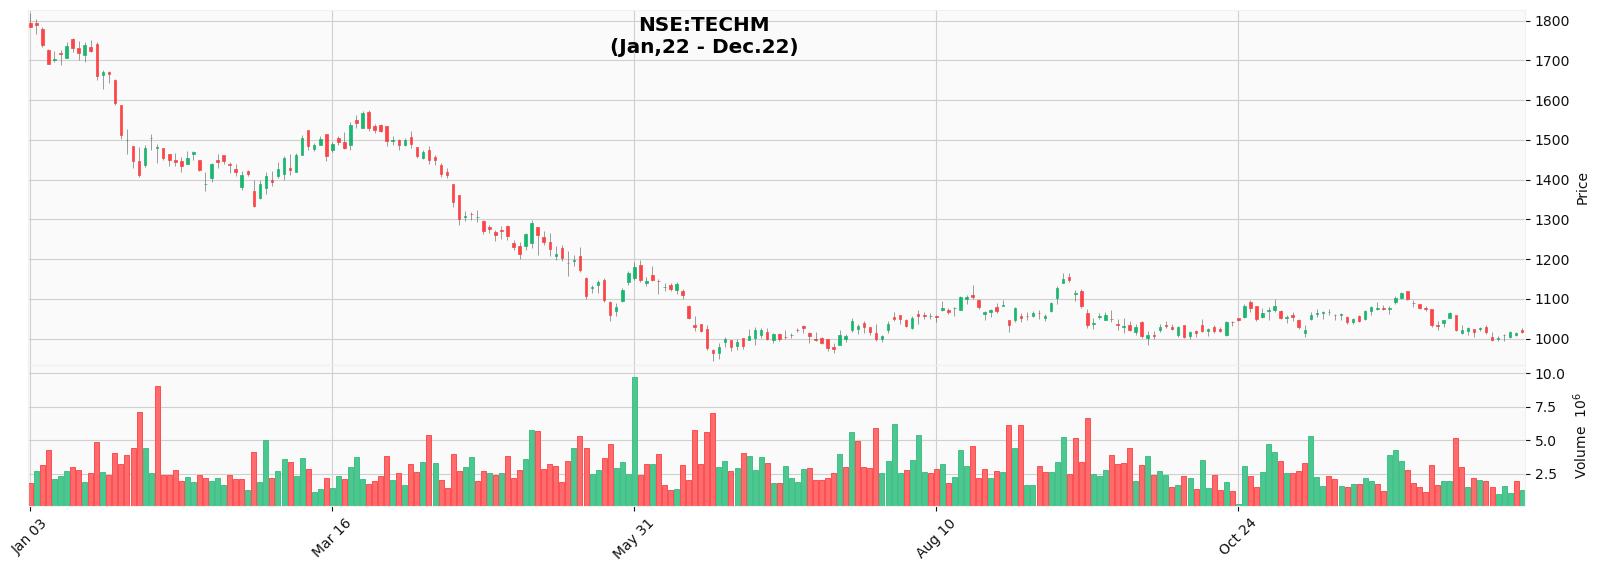

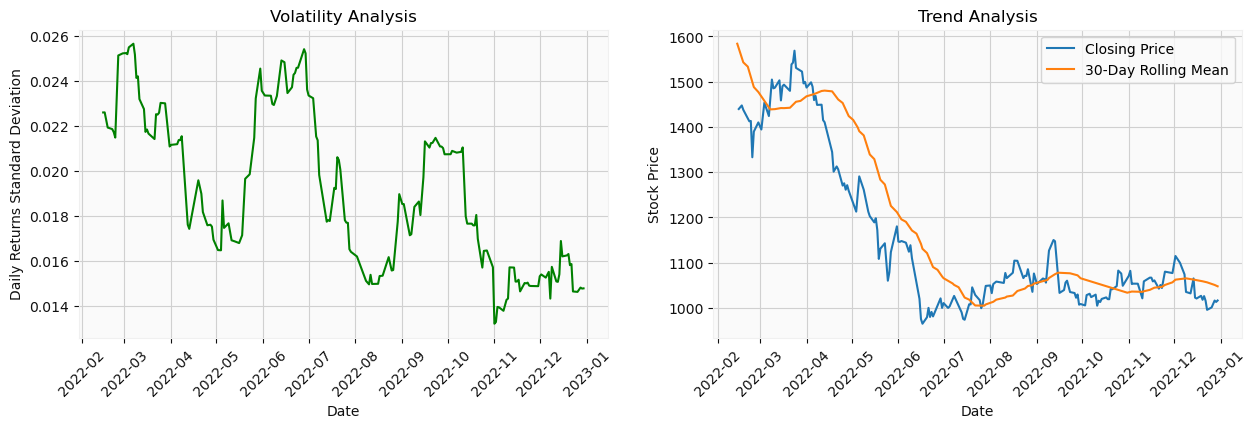



# Company Name -> Titan Company Ltd.	# Industry -> Consumer Durables	# Ticker -> TITAN

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:TITAN


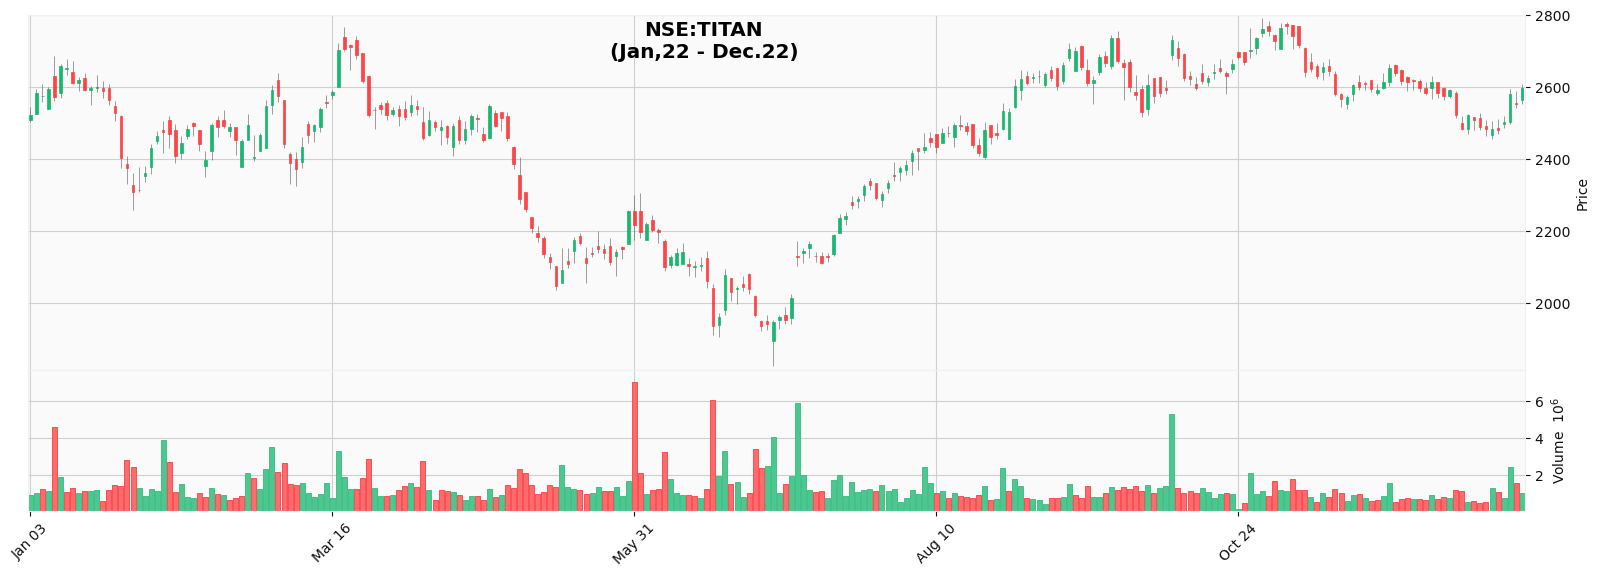

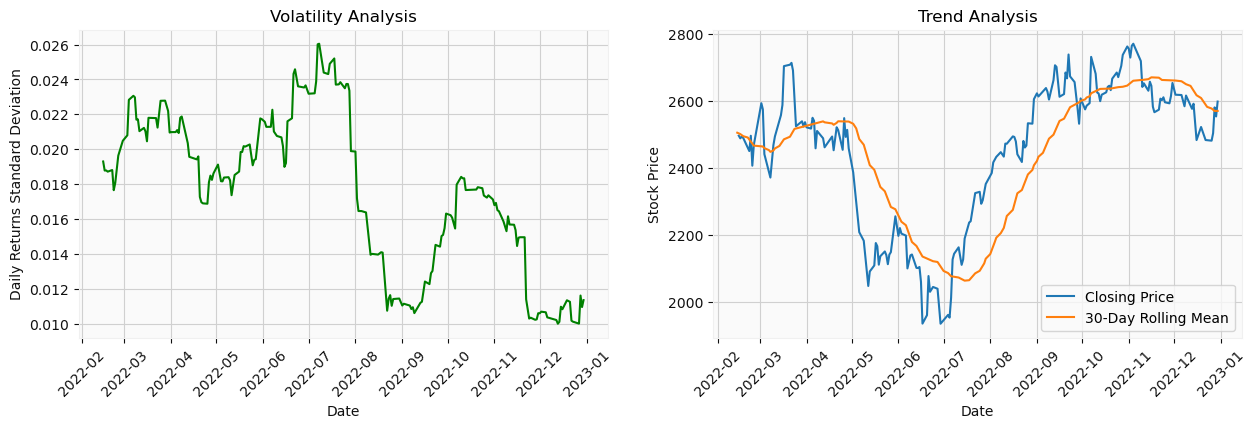



# Company Name -> UPL Ltd.	# Industry -> Chemicals	# Ticker -> UPL

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:UPL


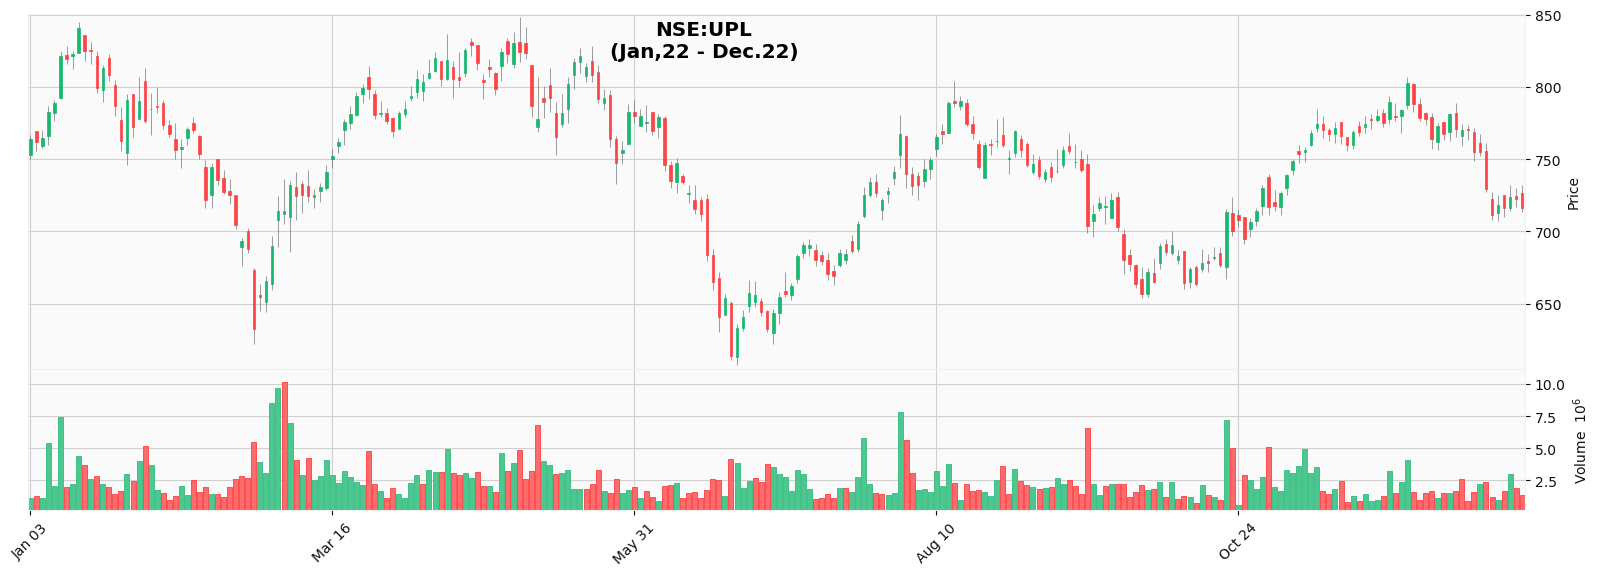

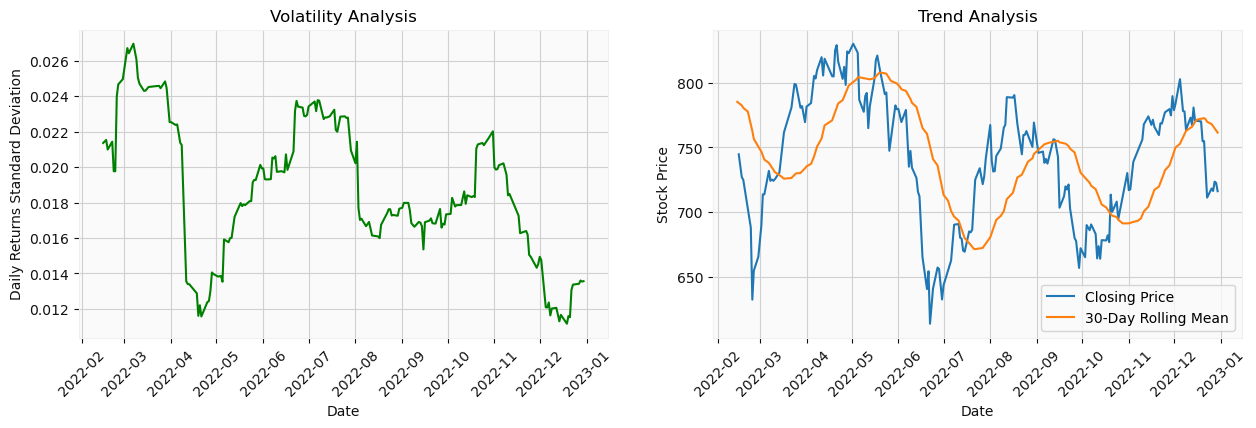



# Company Name -> UltraTech Cement Ltd.	# Industry -> Construction Materials	# Ticker -> ULTRACEMCO

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:ULTRACEMCO


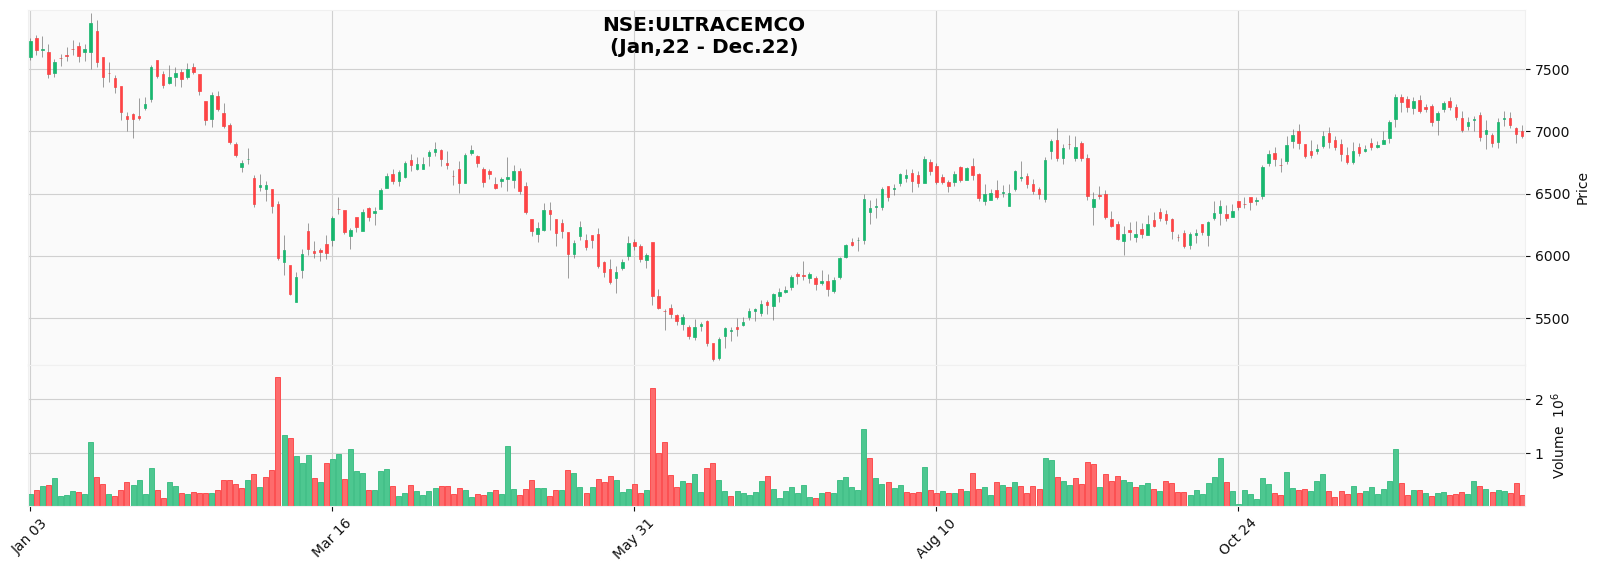

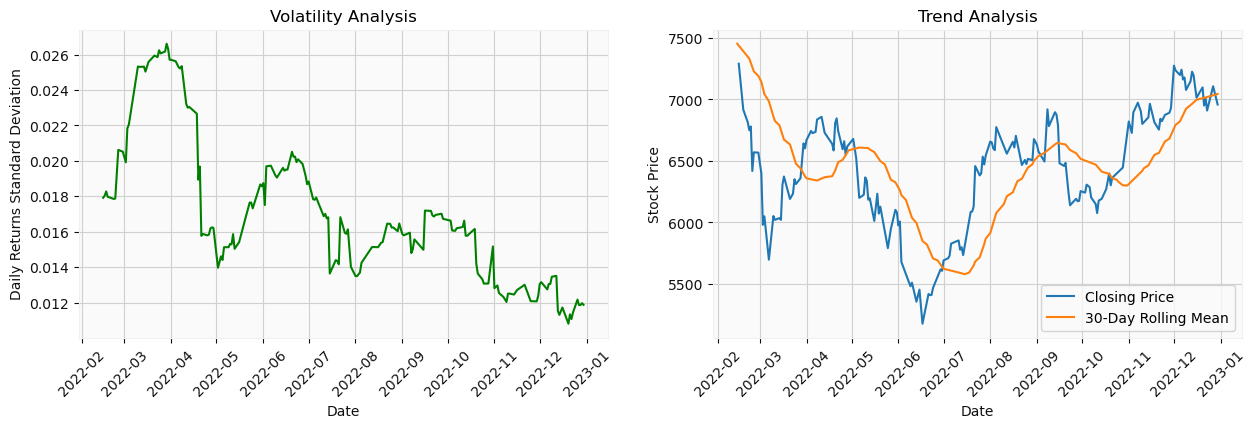



# Company Name -> Wipro Ltd.	# Industry -> Information Technology	# Ticker -> WIPRO

>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:WIPRO


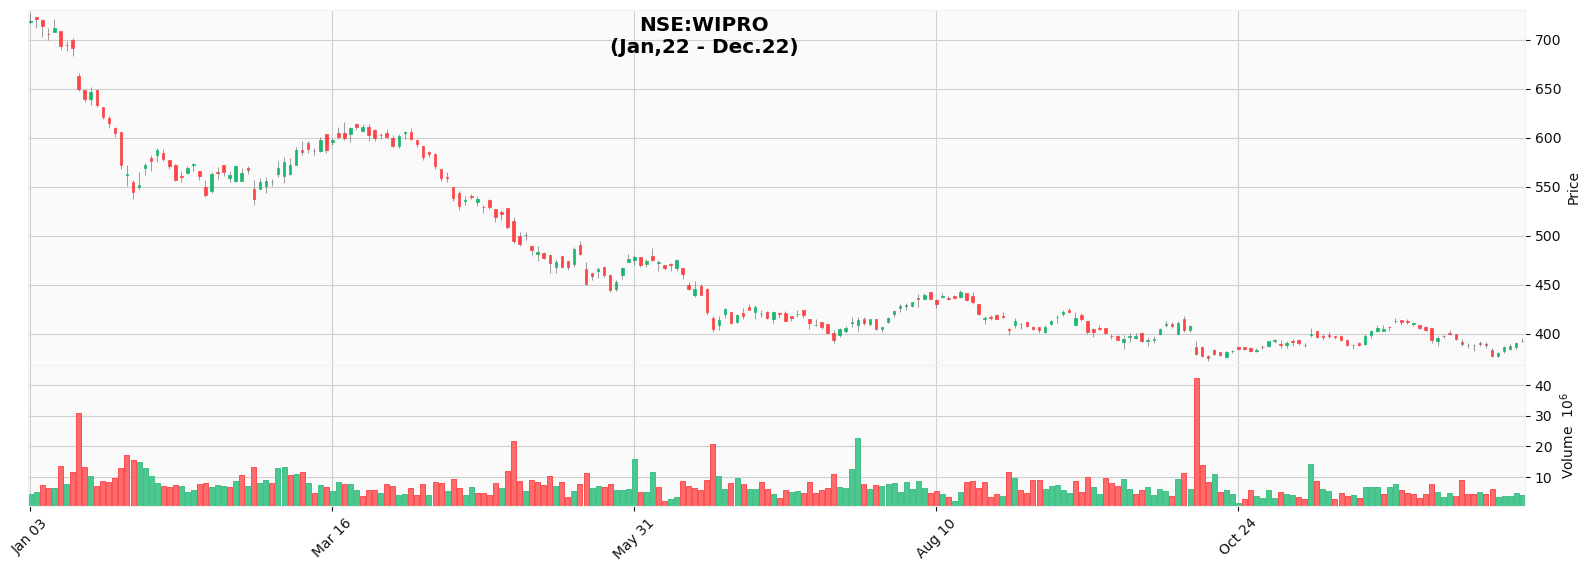

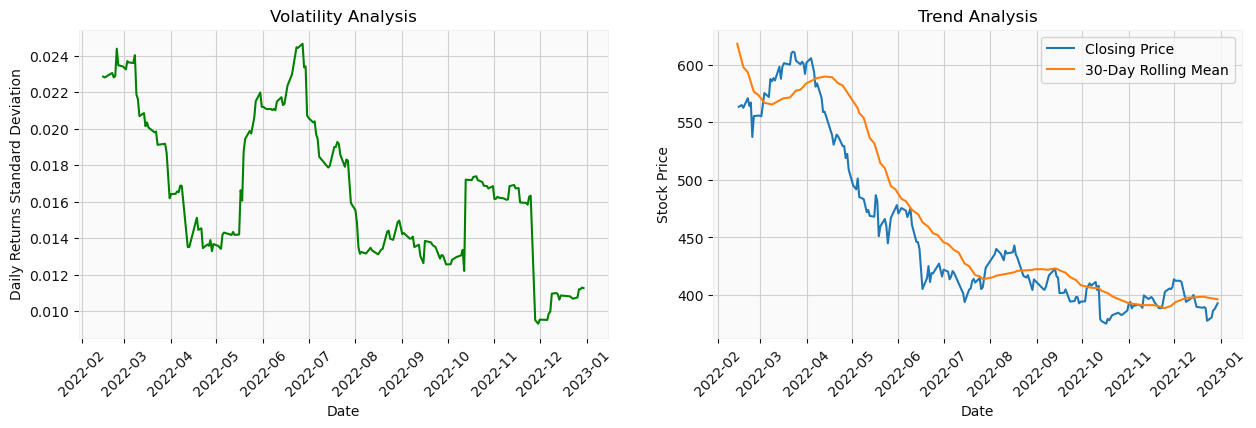

In [9]:
# Generating the analysis report visualizations of each NIFTY50 stock
for company, industry, ticker in zip(nifty50['Company Name'],nifty50['Industry'],nifty50['Symbol']):
    stock_df_path = data_map[ticker]['Orignal Data']
    print(f'\n\n# Company Name -> {company}\t# Industry -> {industry}\t# Ticker -> {ticker}\n')
    print(f'>>> Annual Candlestick Chart, Volatility and Trend Analysis of NSE:{ticker}')
    plot_stock_analysis(stock_df_path, f'NSE:{ticker}\n(Jan,22 - Dec.22)')